# Computational Linear Algebra: PCA Homework

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Lauro, Fabio (318121);
2. Martellone, Lorenzo (317331).

In [1]:
StudentID1 = 318121
StudentID2 = 317331

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Phobias
Music
Interests
*************************************
*** THESE ARE THE SELECTED FEATURES:
Charity
Giving
Assertiveness
Dreams
Getting up
Workaholism
Happiness in life
Loneliness
Finding lost valuables
Friends versus money
Questionnaires or polls
Socializing
Mood swings
Punctuality
Public speaking
Compassion to animals
Eating to survive
Criminal damage
Borrowed stuff
Elections
Children
Final judgement
Loss of interest
Cheating in school
Health
Number of friends
Responding to a serious letter
Unpopularity
Getting angry
Small - big dogs
New environment
Internet usage
Reliability
Self-criticism
Keeping promises
Hypochondria
Knowing the right people
Achievements
Smoking
Alcohol
Healthy eating
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swi

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [3]:
# DO NOT IMPORT NUMPY
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import yaml
from IPython.display import display  # to display variables in a "nice" way

try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

plt.ion()

## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

### Section 1.1 Loading the dataset

In [4]:

url = "https://raw.githubusercontent.com/fabiolauro/PCA_CLA_Project/refs/heads/main/responses_hw.csv"

responses_df = pd.read_csv(url)
rows = responses_df.shape[0]
responses_df_rows = responses_df.sample(round(2*rows/3), replace = False, random_state= random_seed)
responses_df_rows = responses_df_rows.sort_index()

#now let's take only the columns we are interested in

X_df_raw = responses_df_rows[these_features]

display(X_df_raw)


Charity  Giving  Assertiveness  Dreams  Getting up  Workaholism  \
0         2.0     4.0            1.0       4         2.0          4.0   
1         1.0     2.0            2.0       3         5.0          5.0   
2         3.0     5.0            3.0       1         4.0          3.0   
3         3.0     1.0            5.0       3         1.0          5.0   
4         3.0     3.0            4.0       3         4.0          3.0   
...       ...     ...            ...     ...         ...          ...   
1005      2.0     3.0            2.0       3         5.0          4.0   
1006      3.0     4.0            4.0       3         1.0          5.0   
1007      1.0     1.0            1.0       3         5.0          1.0   
1008      3.0     3.0            5.0       3         5.0          1.0   
1009      1.0     1.0            2.0       3         2.0          5.0   

      Happiness in life  Loneliness  Finding lost valuables  \
0                   4.0         3.0                     3.0   
1                   4.0         2.0                     4.0   
2                   4.0         5.0                     3.0   
3                   2.0         5.0                     1.0   
4                   3.0         3.0                     2.0   
...                 ...         ...                     ...   
1005                4.0         4.0                     4.0   
1006                4.0         1.0                     3.0   
1007                3.0         4.0                     3.0   
1008                3.0         3.0                     1.0   
1009                4.0         3.0                     1.0   

      Friends versus money  ...  Passive sport  Active sport  Gardening  \
0                      3.0  ...            1.0           5.0        5.0   
1                      4.0  ...            1.0           1.0        1.0   
2                      5.0  ...            5.0           2.0        1.0   
3                      2.0  ...            1.0           1.0        1.0   
4                      3.0  ...            3.0           1.0        4.0   
...                    ...  ...            ...           ...        ...   
1005                   4.0  ...            4.0           4.0        2.0   
1006                   2.0  ...            1.0           5.0        5.0   
1007                   4.0  ...            2.0           2.0        1.0   
1008                   3.0  ...            2.0           4.0        1.0   
1009                   4.0  ...            5.0           4.0        5.0   

     Celebrities  Shopping  Science and technology  Theatre  Fun with friends  \
0            1.0       4.0                     4.0      2.0               5.0   
1            2.0       3.0                     3.0      2.0               4.0   
2            1.0       4.0                     2.0      5.0               5.0   
3            2.0       4.0                     3.0      1.0               2.0   
4            3.0       3.0                     3.0      2.0               4.0   
...          ...       ...                     ...      ...               ...   
1005         4.0       5.0                     3.0      5.0               5.0   
1006         1.0       2.0                     5.0      1.0               5.0   
1007         1.0       2.0                     3.0      2.0               3.0   
1008         3.0       5.0                     5.0      5.0               5.0   
1009         3.0       3.0                     3.0      1.0               5.0   

      Adrenaline sports  Pets  
0                   4.0   4.0  
1                   2.0   5.0  
2                   5.0   5.0  
3                   1.0   1.0  
4                   2.0   1.0  
...                 ...   ...  
1005                4.0   4.0  
1006                1.0   5.0  
1007                1.0   5.0  
1008                1.0   4.0  
1009                2.0   5.0  

[673 rows x 102 columns]

### Section 1.2 Handling categorical variables

In [5]:
#we use dictionaries to map categorical variables into numerical values


cat_variables = X_df_raw.select_dtypes(include=['object', 'category']).columns
print(cat_variables)

smoking = {
    "never smoked": 1,
    "tried smoking": 2,
    "former smoker": 3,
    "current smoker":4
}

drinking = {
    "never": 1,
    "social drinker": 2,
    "drink a lot": 3
}
#Puntualità andrebbe chiamata Ritardatarietà affinche abbia senso nelle PC Main features in quanto è alta, ma un valore alto significa alto ritardo, perciò la scala è invertita per coerenza.
punctuality = {
    'early': 3,
    "on time": 2,
    "late": 1
}

internet = {
    'no time at all': 1,
    'less than an hour a day': 2,
    'few hours a day': 3,
    'most of the day': 4
}

X_df = X_df_raw.copy()

X_df['Internet usage'] = X_df['Internet usage'].map(internet)
X_df['Punctuality'] = X_df['Punctuality'].map(punctuality)
X_df['Smoking'] = X_df['Smoking'].map(smoking)
X_df['Alcohol'] = X_df['Alcohol'].map(drinking)

#let's show that this works

print(X_df_raw["Alcohol"], X_df["Alcohol"])

Index(['Punctuality', 'Internet usage', 'Smoking', 'Alcohol'], dtype='object')
0          drink a lot
1          drink a lot
2          drink a lot
3          drink a lot
4       social drinker
             ...      
1005       drink a lot
1006    social drinker
1007    social drinker
1008    social drinker
1009    social drinker
Name: Alcohol, Length: 673, dtype: object 0       3.0
1       3.0
2       3.0
3       3.0
4       2.0
       ... 
1005    3.0
1006    2.0
1007    2.0
1008    2.0
1009    2.0
Name: Alcohol, Length: 673, dtype: float64


### Section 1.3 Handling Missing Values

We looked for **missing values** in the sampled DF

In [6]:
#looking for missing values, cleaning operations

missing_values = X_df.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)


Passive sport               10
Smoking                      7
Classical music              7
Punk                         7
Compassion to animals        6
                            ..
Slow songs or fast songs     0
Storm                        0
Snakes                       0
Fear of public speaking      0
Politics                     0
Length: 102, dtype: int64


Dropping all the Rows with missing values means discarding 1/3 of the rows, so we looked for some pattern in the missingness of the data plotting the dataset as a Heatmap, highlighting the missing values:

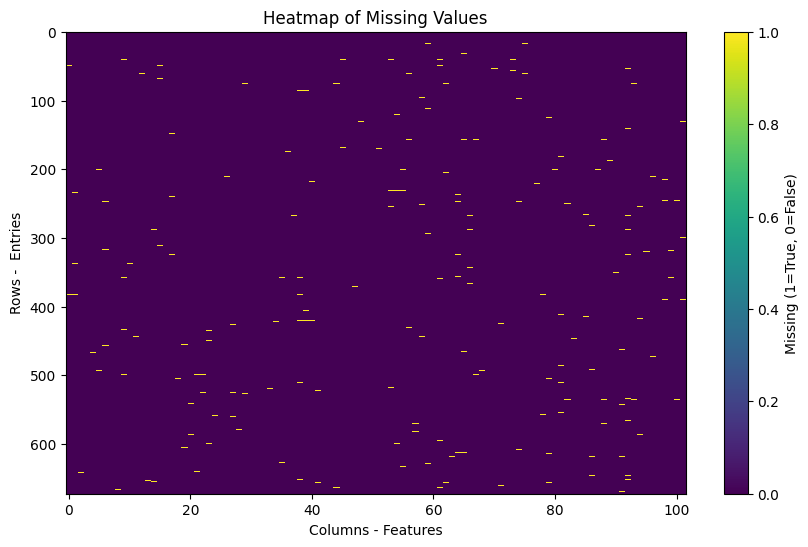

In [7]:

plt.figure(figsize=(10, 6))
plt.imshow(X_df.isnull(), aspect='auto', cmap='viridis', interpolation='none')
plt.colorbar(label='Missing (1=True, 0=False)')
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns - Features")
plt.ylabel("Rows -  Entries")
plt.show()



The data appears to align closely with the Missing Completely At Random (MCAR) assumption. This occurs when the likelihood of missing data is uniformly distributed across all observations, without discernible patterns or dependencies on observed or unobserved variables.

In our analysis:

- We found no observable patterns or relationships explaining the missing data.
- There was no specific column or feature that could reliably guide selective row preservation when removing incomplete records.
- Imputation of missing values, while a potential approach, would introduce synthetic information, which could bias the results without strong justification or domain-specific knowledge to support the method chosen. Moreover, it would require for us to make assumptions on the distribution of the data.

Given these considerations, we opted to discard rows with missing values to ensure the integrity of the analysis, avoiding the risks associated with introducing artificial or potentially misleading information.


In [8]:
X_df = X_df.dropna()

display(X_df)

Charity  Giving  Assertiveness  Dreams  Getting up  Workaholism  \
0         2.0     4.0            1.0       4         2.0          4.0   
1         1.0     2.0            2.0       3         5.0          5.0   
2         3.0     5.0            3.0       1         4.0          3.0   
3         3.0     1.0            5.0       3         1.0          5.0   
4         3.0     3.0            4.0       3         4.0          3.0   
...       ...     ...            ...     ...         ...          ...   
1004      2.0     3.0            3.0       4         5.0          1.0   
1005      2.0     3.0            2.0       3         5.0          4.0   
1007      1.0     1.0            1.0       3         5.0          1.0   
1008      3.0     3.0            5.0       3         5.0          1.0   
1009      1.0     1.0            2.0       3         2.0          5.0   

      Happiness in life  Loneliness  Finding lost valuables  \
0                   4.0         3.0                     3.0   
1                   4.0         2.0                     4.0   
2                   4.0         5.0                     3.0   
3                   2.0         5.0                     1.0   
4                   3.0         3.0                     2.0   
...                 ...         ...                     ...   
1004                3.0         3.0                     2.0   
1005                4.0         4.0                     4.0   
1007                3.0         4.0                     3.0   
1008                3.0         3.0                     1.0   
1009                4.0         3.0                     1.0   

      Friends versus money  ...  Passive sport  Active sport  Gardening  \
0                      3.0  ...            1.0           5.0        5.0   
1                      4.0  ...            1.0           1.0        1.0   
2                      5.0  ...            5.0           2.0        1.0   
3                      2.0  ...            1.0           1.0        1.0   
4                      3.0  ...            3.0           1.0        4.0   
...                    ...  ...            ...           ...        ...   
1004                   5.0  ...            5.0           2.0        2.0   
1005                   4.0  ...            4.0           4.0        2.0   
1007                   4.0  ...            2.0           2.0        1.0   
1008                   3.0  ...            2.0           4.0        1.0   
1009                   4.0  ...            5.0           4.0        5.0   

      Celebrities  Shopping  Science and technology  Theatre  \
0             1.0       4.0                     4.0      2.0   
1             2.0       3.0                     3.0      2.0   
2             1.0       4.0                     2.0      5.0   
3             2.0       4.0                     3.0      1.0   
4             3.0       3.0                     3.0      2.0   
...           ...       ...                     ...      ...   
1004          1.0       2.0                     2.0      2.0   
1005          4.0       5.0                     3.0      5.0   
1007          1.0       2.0                     3.0      2.0   
1008          3.0       5.0                     5.0      5.0   
1009          3.0       3.0                     3.0      1.0   

      Fun with friends  Adrenaline sports  Pets  
0                  5.0                4.0   4.0  
1                  4.0                2.0   5.0  
2                  5.0                5.0   5.0  
3                  2.0                1.0   1.0  
4                  4.0                2.0   1.0  
...                ...                ...   ...  
1004               5.0                4.0   4.0  
1005               5.0                4.0   4.0  
1007               3.0                1.0   5.0  
1008               5.0                1.0   4.0  
1009               5.0                2.0   5.0  

[495 rows x 102 columns]

### Section 1.3 Defining the final DF

In [9]:
#now that we have cleaned the dataset, let's save a filtered version of the original one
#which contains also the demographic variables, that will be useful later

ind_filt = X_df.index
resp_filt = responses_df_rows.loc[ind_filt,:]
display(resp_filt)


Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0       5.0                       3.0    2.0   1.0      2.0              2.0   
1       4.0                       4.0    2.0   1.0      1.0              1.0   
2       5.0                       5.0    2.0   2.0      3.0              4.0   
3       5.0                       3.0    2.0   1.0      1.0              1.0   
4       5.0                       3.0    4.0   3.0      2.0              4.0   
...     ...                       ...    ...   ...      ...              ...   
1004    5.0                       3.0    4.0   1.0      2.0              3.0   
1005    5.0                       2.0    5.0   2.0      2.0              5.0   
1007    4.0                       3.0    1.0   1.0      2.0              2.0   
1008    5.0                       3.0    3.0   3.0      1.0              3.0   
1009    5.0                       5.0    4.0   3.0      2.0              3.0   

      Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0         1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1         2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2         5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3         1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4         3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   
...       ...  ...   ...                ...  ...   ...     ...     ...   
1004      2.0  3.0   3.0                4.0  ...  22.0   175.0    60.0   
1005      4.0  4.0   4.0                3.0  ...  20.0   164.0    57.0   
1007      2.0  3.0   4.0                1.0  ...  18.0   173.0    75.0   
1008      1.0  3.0   4.0                1.0  ...  25.0   173.0    58.0   
1009      3.0  4.0   1.0                1.0  ...  21.0   185.0    72.0   

      Number of siblings  Gender   Hand                Education  Only child  \
0                    1.0  female  right  college/bachelor degree          no   
1                    2.0  female  right  college/bachelor degree          no   
2                    2.0  female  right         secondary school          no   
3                    1.0  female  right  college/bachelor degree         yes   
4                    1.0  female  right         secondary school          no   
...                  ...     ...    ...                      ...         ...   
1004                 1.0    male  right         secondary school          no   
1005                 1.0  female  right         secondary school          no   
1007                 0.0  female  right         secondary school         yes   
1008                 1.0  female  right  college/bachelor degree          no   
1009                 1.0    male  right         secondary school          no   

      Home Town Type       Home Type  
0            village  block of flats  
1               city  block of flats  
2               city  block of flats  
3               city  house/bungalow  
4            village  house/bungalow  
...              ...             ...  
1004            city  block of flats  
1005            city  house/bungalow  
1007            city  block of flats  
1008            city  block of flats  
1009         village  house/bungalow  

[495 rows x 150 columns]

## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

### Section 2.1: Scaling the dataframes

In [10]:
#transforming the datasets

std = StandardScaler()
minmax = MinMaxScaler()

std.fit(X_df)
minmax.fit(X_df)

Xstd = std.transform(X_df)
Xstd_df = pd.DataFrame(Xstd, columns= X_df.columns)

Xmm = minmax.transform(X_df)
Xmm_df = pd.DataFrame(Xmm, columns = X_df.columns)

In [11]:
display(Xstd_df)

Charity    Giving  Assertiveness    Dreams  Getting up  Workaholism  \
0   -0.026763  0.827738      -2.198363  1.085542   -1.285980     0.809375   
1   -1.045821 -0.656792      -1.307135 -0.432377    1.060065     1.591877   
2    0.992295  1.570003      -0.415906 -3.468216    0.278050     0.026874   
3    0.992295 -1.399057       1.366550 -0.432377   -2.067995     1.591877   
4    0.992295  0.085473       0.475322 -0.432377    0.278050     0.026874   
..        ...       ...            ...       ...         ...          ...   
490 -0.026763  0.085473      -0.415906  1.085542    1.060065    -1.538129   
491 -0.026763  0.085473      -1.307135 -0.432377    1.060065     0.809375   
492 -1.045821 -1.399057      -2.198363 -0.432377    1.060065    -1.538129   
493  0.992295  0.085473       1.366550 -0.432377    1.060065    -1.538129   
494 -1.045821 -1.399057      -1.307135 -0.432377   -1.285980     1.591877   

     Happiness in life  Loneliness  Finding lost valuables  \
0             0.405634    0.078168                0.168878   
1             0.405634   -0.801224                0.972674   
2             0.405634    1.836952                0.168878   
3            -2.013509    1.836952               -1.438714   
4            -0.803937    0.078168               -0.634918   
..                 ...         ...                     ...   
490          -0.803937    0.078168               -0.634918   
491           0.405634    0.957560                0.972674   
492          -0.803937    0.957560                0.168878   
493          -0.803937    0.078168               -1.438714   
494           0.405634    0.078168               -1.438714   

     Friends versus money  ...  Passive sport  Active sport  Gardening  \
0               -0.689123  ...      -1.668308      1.225298   2.593635   
1                0.208550  ...      -1.668308     -1.408893  -0.765029   
2                1.106224  ...       1.167100     -0.750345  -0.765029   
3               -1.586797  ...      -1.668308     -1.408893  -0.765029   
4               -0.689123  ...      -0.250604     -1.408893   1.753969   
..                    ...  ...            ...           ...        ...   
490              1.106224  ...       1.167100     -0.750345   0.074637   
491              0.208550  ...       0.458248      0.566750   0.074637   
492              0.208550  ...      -0.959456     -0.750345  -0.765029   
493             -0.689123  ...      -0.959456      0.566750  -0.765029   
494              0.208550  ...       1.167100      0.566750   2.593635   

     Celebrities  Shopping  Science and technology   Theatre  \
0      -1.054444  0.596133                0.575520 -0.758297   
1      -0.270736 -0.168338               -0.211448 -0.758297   
2      -1.054444  0.596133               -0.998416  1.458378   
3      -0.270736  0.596133               -0.211448 -1.497188   
4       0.512973 -0.168338               -0.211448 -0.758297   
..           ...       ...                     ...       ...   
490    -1.054444 -0.932810               -0.998416 -0.758297   
491     1.296682  1.360605               -0.211448  1.458378   
492    -1.054444 -0.932810               -0.211448 -0.758297   
493     0.512973  1.360605                1.362489  1.458378   
494     0.512973 -0.168338               -0.211448 -1.497188   

     Fun with friends  Adrenaline sports      Pets  
0            0.585108           0.804695  0.443587  
1           -0.749585          -0.592933  1.081888  
2            0.585108           1.503509  1.081888  
3           -3.418970          -1.291747 -1.471316  
4           -0.749585          -0.592933 -1.471316  
..                ...                ...       ...  
490          0.585108           0.804695  0.443587  
491          0.585108           0.804695  0.443587  
492         -2.084277          -1.291747  1.081888  
493          0.585108          -1.291747  0.443587  
494          0.585108          -0.592933  1.081888  

[495 rows x 102 columns]

In [12]:
display(Xmm_df)

Charity  Giving  Assertiveness  Dreams  Getting up  Workaholism  \
0       0.25    0.75           0.00    0.75        0.25         0.75   
1       0.00    0.25           0.25    0.50        1.00         1.00   
2       0.50    1.00           0.50    0.00        0.75         0.50   
3       0.50    0.00           1.00    0.50        0.00         1.00   
4       0.50    0.50           0.75    0.50        0.75         0.50   
..       ...     ...            ...     ...         ...          ...   
490     0.25    0.50           0.50    0.75        1.00         0.00   
491     0.25    0.50           0.25    0.50        1.00         0.75   
492     0.00    0.00           0.00    0.50        1.00         0.00   
493     0.50    0.50           1.00    0.50        1.00         0.00   
494     0.00    0.00           0.25    0.50        0.25         1.00   

     Happiness in life  Loneliness  Finding lost valuables  \
0                 0.75        0.50                    0.50   
1                 0.75        0.25                    0.75   
2                 0.75        1.00                    0.50   
3                 0.25        1.00                    0.00   
4                 0.50        0.50                    0.25   
..                 ...         ...                     ...   
490               0.50        0.50                    0.25   
491               0.75        0.75                    0.75   
492               0.50        0.75                    0.50   
493               0.50        0.50                    0.00   
494               0.75        0.50                    0.00   

     Friends versus money  ...  Passive sport  Active sport  Gardening  \
0                    0.50  ...           0.00          1.00       1.00   
1                    0.75  ...           0.00          0.00       0.00   
2                    1.00  ...           1.00          0.25       0.00   
3                    0.25  ...           0.00          0.00       0.00   
4                    0.50  ...           0.50          0.00       0.75   
..                    ...  ...            ...           ...        ...   
490                  1.00  ...           1.00          0.25       0.25   
491                  0.75  ...           0.75          0.75       0.25   
492                  0.75  ...           0.25          0.25       0.00   
493                  0.50  ...           0.25          0.75       0.00   
494                  0.75  ...           1.00          0.75       1.00   

     Celebrities  Shopping  Science and technology  Theatre  Fun with friends  \
0           0.00      0.75                    0.75     0.25          1.000000   
1           0.25      0.50                    0.50     0.25          0.666667   
2           0.00      0.75                    0.25     1.00          1.000000   
3           0.25      0.75                    0.50     0.00          0.000000   
4           0.50      0.50                    0.50     0.25          0.666667   
..           ...       ...                     ...      ...               ...   
490         0.00      0.25                    0.25     0.25          1.000000   
491         0.75      1.00                    0.50     1.00          1.000000   
492         0.00      0.25                    0.50     0.25          0.333333   
493         0.50      1.00                    1.00     1.00          1.000000   
494         0.50      0.50                    0.50     0.00          1.000000   

     Adrenaline sports  Pets  
0                 0.75  0.75  
1                 0.25  1.00  
2                 1.00  1.00  
3                 0.00  0.00  
4                 0.25  0.00  
..                 ...   ...  
490               0.75  0.75  
491               0.75  0.75  
492               0.00  1.00  
493               0.00  0.75  
494               0.25  1.00  

[495 rows x 102 columns]

### Section 2.2: Computing the variance of the three dataframes

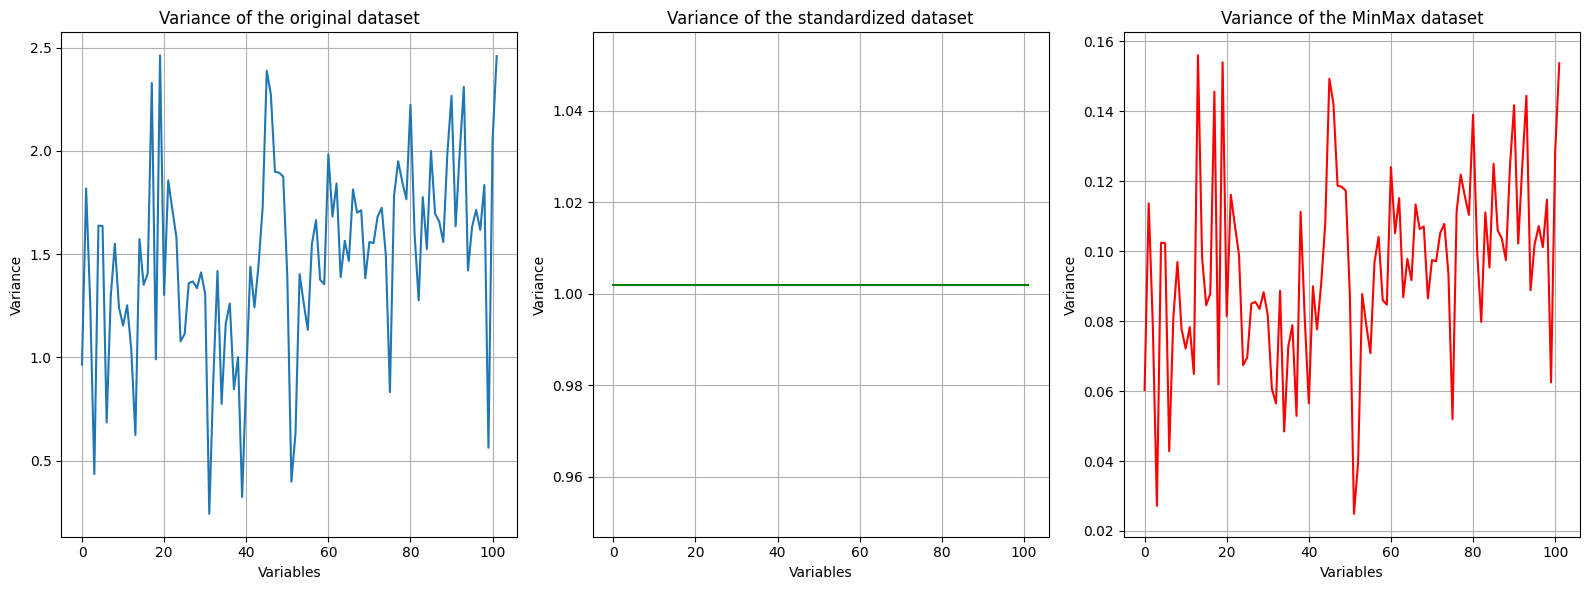

In [14]:
#computing the variance
var_x = X_df.var()
var_std = Xstd_df.var()
var_mm = Xmm_df.var()


#plotting the variance of all the datasets
fig_var, ax_var = plt.subplots(1,3, figsize=(16,6))

ax_var[0].plot(var_x.values)
ax_var[0].set_xlabel("Variables")
ax_var[0].set_ylabel("Variance")
ax_var[0].set_title("Variance of the original dataset")
ax_var[0].grid(True)

ax_var[1].plot(var_std.values.round(4), color = "green")
ax_var[1].set_xlabel("Variables")
ax_var[1].set_ylabel("Variance")
ax_var[1].set_title("Variance of the standardized dataset")
ax_var[1].grid(True)

ax_var[2].plot(var_mm.values, color = "red")
ax_var[2].set_xlabel("Variables")
ax_var[2].set_ylabel("Variance")
ax_var[2].set_title("Variance of the MinMax dataset")
ax_var[2].grid(True)

plt.tight_layout()
plt.show()



- The original dataset presents a noticing variability in the variance values, where we go from a maximum of 2.5 to a minimum of 0.2 approximately. This range is not enormous but still significant.
- The variance of the standardized dataset is equal to 1 for each variable, as expected due to the Standard Scaler functioning that subtracts the mean and divides by the standard deviation each value.
- The MinMax dataset presents a similar behavior to the original one, in that the variables maintain their relative differences of the variance, although the range is much smaller in this case due to the rescaling: since each value is rescaled to fit into the interval of minimum and maximum for each variable, its absolute value is decreased, and this consequently reduces the absolute value of the variance.



### Section 2.3: Computing the full PCA
In this section we perform PCA without constraints on the number of components. We then compute the explained cumulative variance with respect to the PCs, and comment the results.

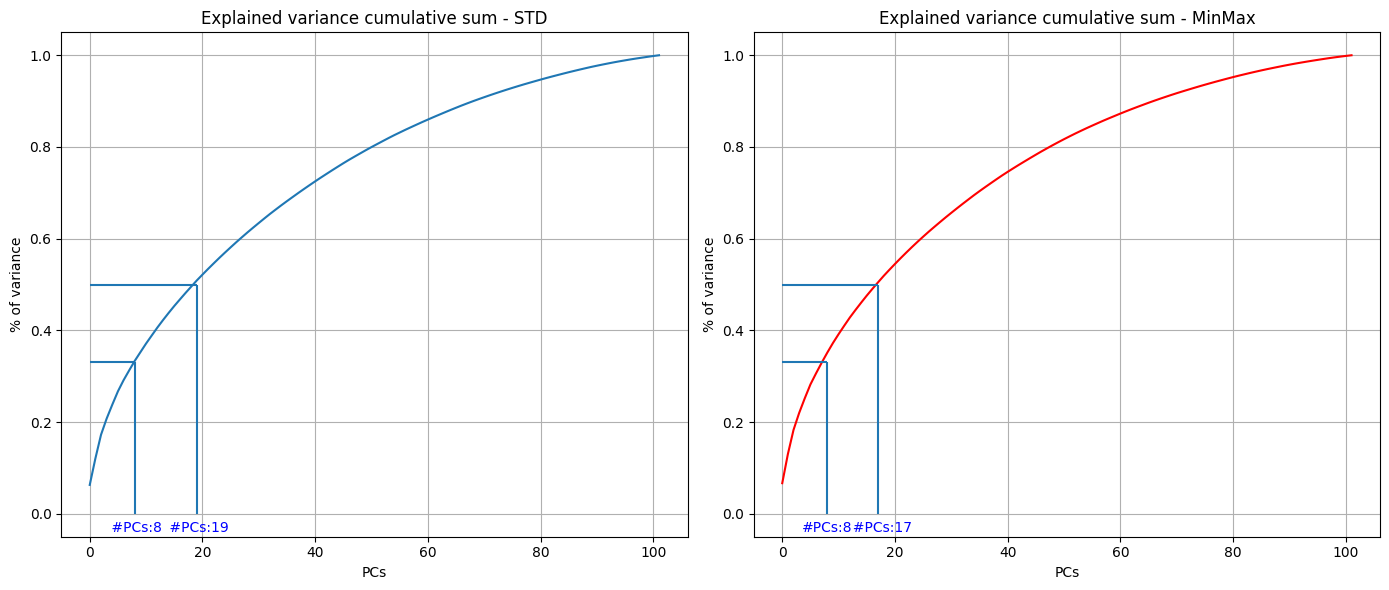

In [15]:
pca_std = PCA()
pca_mm = PCA()

pca_std.fit(Xstd_df)
pca_mm.fit(Xmm_df)

cumsum_std = np.cumsum(pca_std.explained_variance_ratio_)
cumsum_mm = np.cumsum(pca_mm.explained_variance_ratio_)

# Indici per il 33% e il 50% della varianza
thresholds = [0.33, 0.50]
indices_std = [np.argmax(cumsum_std >= t) for t in thresholds]
indices_mm = [np.argmax(cumsum_mm >= t) for t in thresholds]

fig_full, ax_full = plt.subplots(1,2, figsize = (14,6))
ax_full[0].plot(cumsum_std)
ax_full[0].hlines(y=0.33, xmin=0, xmax=indices_std[0])
ax_full[0].hlines(y=0.50, xmin=0, xmax=indices_std[1])
ax_full[0].vlines(x=indices_std[0], ymin=0, ymax=0.33)
ax_full[0].vlines(x=indices_std[1], ymin=0, ymax=0.50)
ax_full[0].text(indices_std[0], -0.03, f" #PCs:{indices_std[0]}", va='center', ha='center', color='blue')
ax_full[0].text(indices_std[1], -0.03, f" #PCs:{indices_std[1]}", va='center', ha='center', color='blue')
ax_full[0].set_xlabel("PCs")
ax_full[0].set_ylabel("% of variance")
ax_full[0].set_title("Explained variance cumulative sum - STD")
ax_full[0].grid(True)

ax_full[1].plot(cumsum_mm, color = "red")
ax_full[1].hlines(y=0.33, xmin=0, xmax=indices_mm[0])
ax_full[1].hlines(y=0.50, xmin=0, xmax=indices_mm[1])
ax_full[1].vlines(x=indices_mm[0], ymin=0, ymax=0.33)
ax_full[1].vlines(x=indices_mm[1], ymin=0, ymax=0.50)
ax_full[1].text(indices_mm[0], -0.03, f"#PCs:{indices_mm[0]}", va='center', ha='center', color='blue')
ax_full[1].text(indices_mm[1], -0.03, f"  #PCs:{indices_mm[1]}", va='center', ha='center', color='blue')
ax_full[1].set_xlabel("PCs")
ax_full[1].set_ylabel("% of variance")
ax_full[1].set_title("Explained variance cumulative sum - MinMax")
ax_full[1].grid(True)

plt.tight_layout()
plt.show()

- We observe an almost identical behavior in the two PCA analyses. Both scaling methods require the same number of PCs to reach 33% of the variance, but MinMaxScaler condenses 50% of the variance into the first 17 PCs, compared to StandardScaler, which requires 19 PCs to achieve the same amount of explained variance.

- In both representations, it was not possible to express 33% of the variance in fewer than 5 PCs, indicating that the problem is not only high-dimensional but also that the variance is spread across multiple dimensions.

- This behavior aligns with theoretical expectations. StandardScaler tends to spread the variance more evenly among the various components, making it harder to have a few PCs capturing most of the variance. In contrast, MinMaxScaler preserves the variance allocation, allowing for a more efficient condensation into the first few components.

- Theoretically, we expect the MinMax-scaled data to perform better in our analysis since the data is distributed as ranks (mostly within the same range, e.g., 1 to 5). On the other hand, StandardScaler is more effective in scenarios where the scales of the variables differ significantly.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

### Section 3.1 Preliminaries

Hereafter we write the function to compute the PCA. If a model with less than 5 PCs explaining at least 33% of the variance is found then its returned, otherwise 5 PCs are given.

In [16]:
#we define a function to compute the PCA
m = 5

def pca_computation(df,max):

    print(f"Computing the PCA for the dataframe -- the maximum number of components is {max}")

    for i in range(1,max+1):
        pca = PCA(n_components=i)
        pca.fit(df)
        exp_var = np.sum(pca.explained_variance_ratio_)

        if exp_var >= 0.33:
            print(f"PCA has n={i} components!")
            print(f"Variance explained: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")
            fig, ax = plt.subplots(1,2,figsize=(14,6))
            ax[0].bar(range(pca.n_components_), pca.explained_variance_ratio_ ,color = "skyblue", edgecolor = "black")
            ax[0].set_xticks(range(pca.n_components_), [f"PC{k}" for k in range(1,pca.n_components_+1)])
            ax[0].set_xlabel("Principal Components")
            ax[0].set_ylabel("Variance percentage per PC")
            ax[0].grid(True)

            ax[1].bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color = "red", edgecolor = "black")
            ax[1].set_xticks(range(pca.n_components_), [f"PC{k}" for k in range(1,pca.n_components_+1)])
            ax[1].set_xlabel("Principal Components")
            ax[1].set_ylabel("Cumulative variance")
            ax[1].grid(True)

            plt.tight_layout()
            plt.show()
            return pca
    print("Couldn't find a PCA explaining at least 33% of the variance. 5 components are given")
    print(f"Variance explained: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")

    fig, ax = plt.subplots(1,2,figsize=(14,6))

    ax[0].bar(range(pca.n_components_), pca.explained_variance_ratio_ ,color = "skyblue", edgecolor = "black")
    ax[0].set_xticks(range(pca.n_components_), [f"PC{k}" for k in range(1,pca.n_components_+1)])
    ax[0].set_xlabel("Principal Components")
    ax[0].set_ylabel("Variance percentage per PC")
    ax[0].grid(True)

    ax[1].bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color = "red", edgecolor = "black")
    ax[1].set_xticks(range(pca.n_components_), [f"PC{k}" for k in range(1,pca.n_components_+1)])
    ax[1].set_xlabel("Principal Components")
    ax[1].set_ylabel("Cumulative variance")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()
    return pca



### Section 3.2 PCA over Standardized Dataset

Here we perform PCA on the Standardized dataset to identify PCs and relevant features.

Computing the PCA for the dataframe -- the maximum number of components is 5
Couldn't find a PCA explaining at least 33% of the variance. 5 components are given
Variance explained: 23.80%


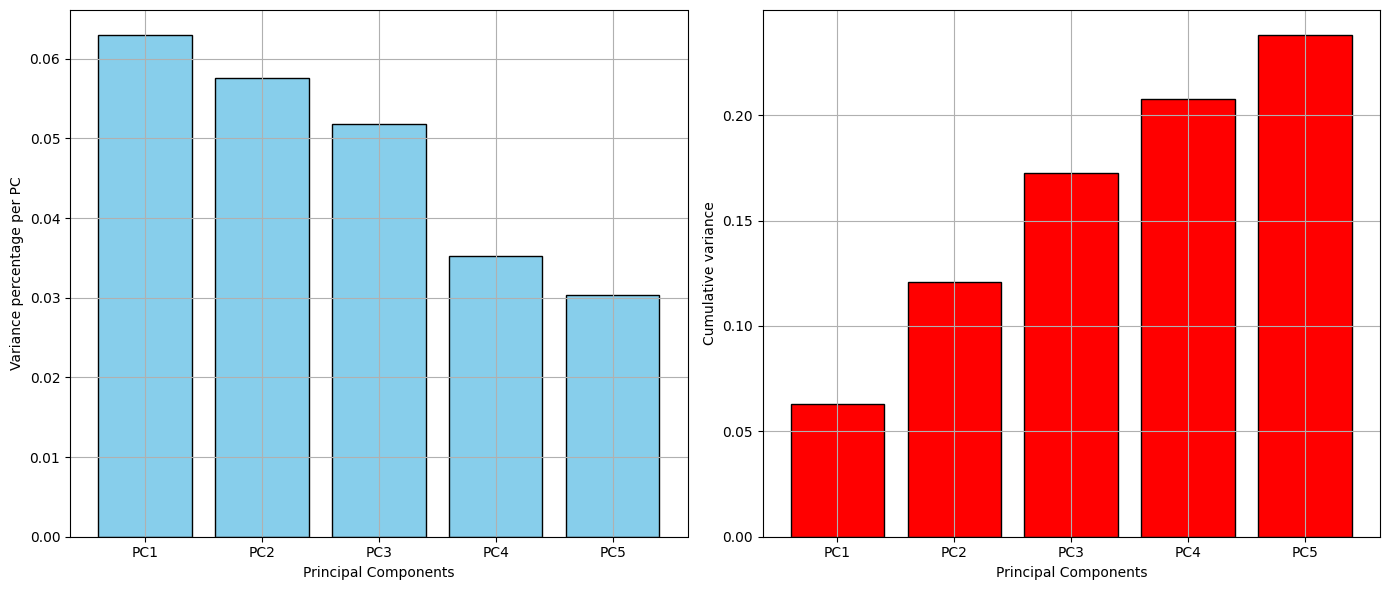

In [17]:
pca_std_m = pca_computation(Xstd_df,m) #computation of the PCA for Xstd_df

It was not possible to find less than 5 PCs capable to explain at least 33% of the Variance so the first 5 PCs will be analized.


We have first considered to select the most important features contributing to each Principal Component by identifying the ones that surpassed the threshold hereby defined:

$$
\text{eps} = \sqrt{\frac{1}{n}
$$

where n is the total number of features.
Yet, we have discarded this option because it resulted in having more than 30 significant features for each PC, thus making it difficult to interpret the results. For this reason, we have decided to select the 15 most important features for each PC as the base for the interpretation of its meaning. This approach is shown in the plots below.



In [27]:
#Here we assign a color to each feature based on its type
set3 = cm.Set3.colors

color_by_type = {


    
    'Health' : set3[0],
    'Interests' : set3[1],
    'Music' : set3[2],
    'Personality' : set3[3],
    'Phobias' : set3[4]
}

variable_to_color = {}

for var_type, variables in variables_by_type.items():
    if var_type in color_by_type:
        color = color_by_type[var_type]
        for variable in variables:
            variable_to_color[variable] = color


#we also define a legend for the plots

type_colors_legend = [Line2D([0], [0], color=color_by_type[k], label = k) for k in color_by_type]


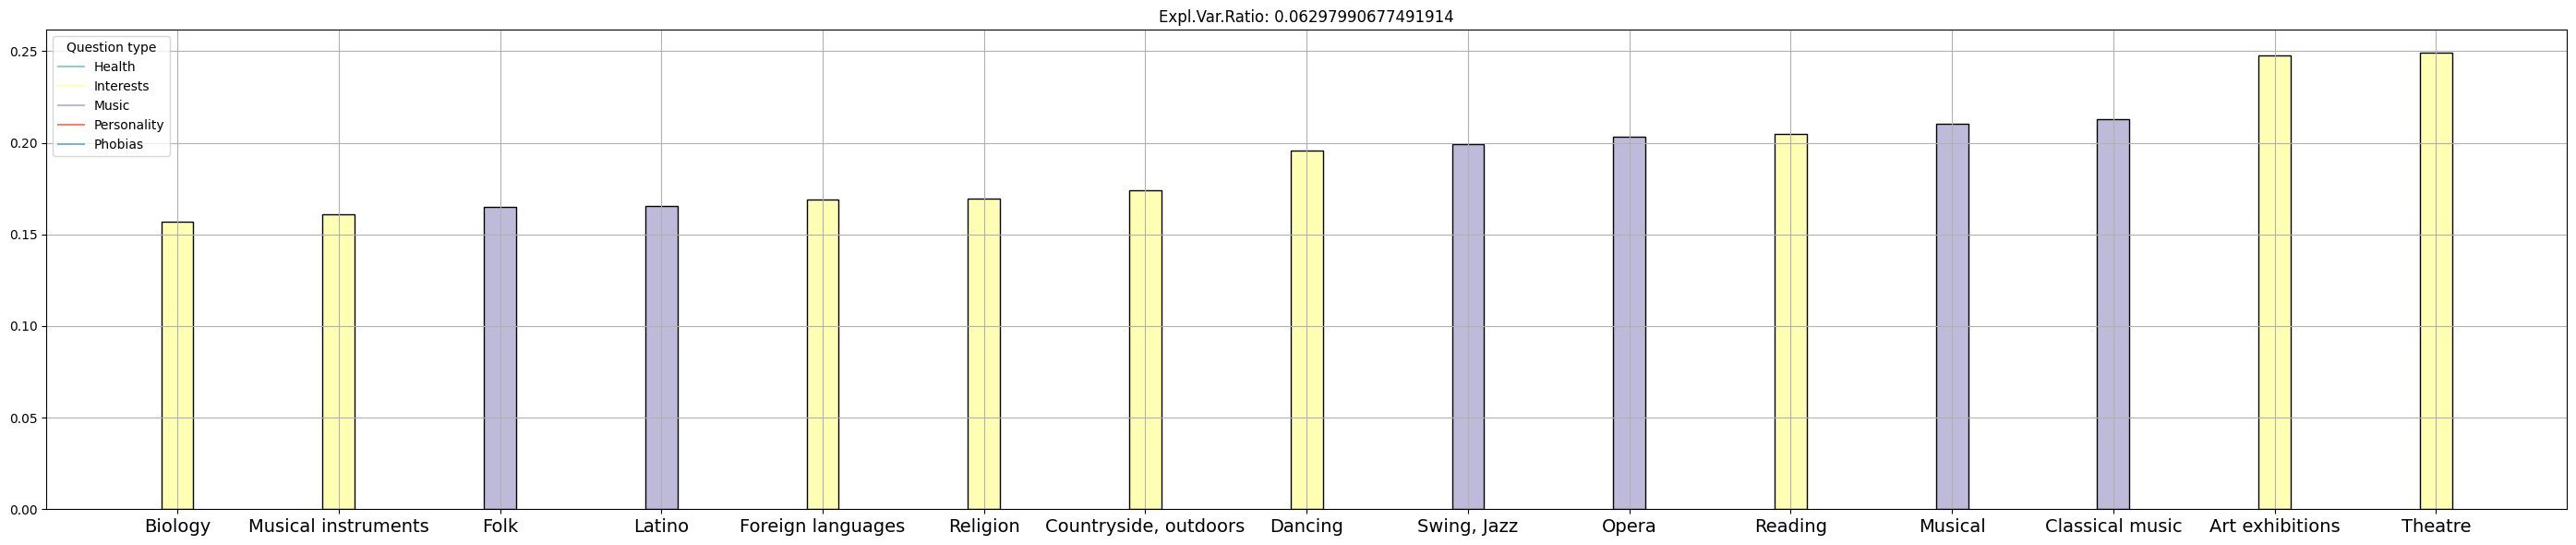

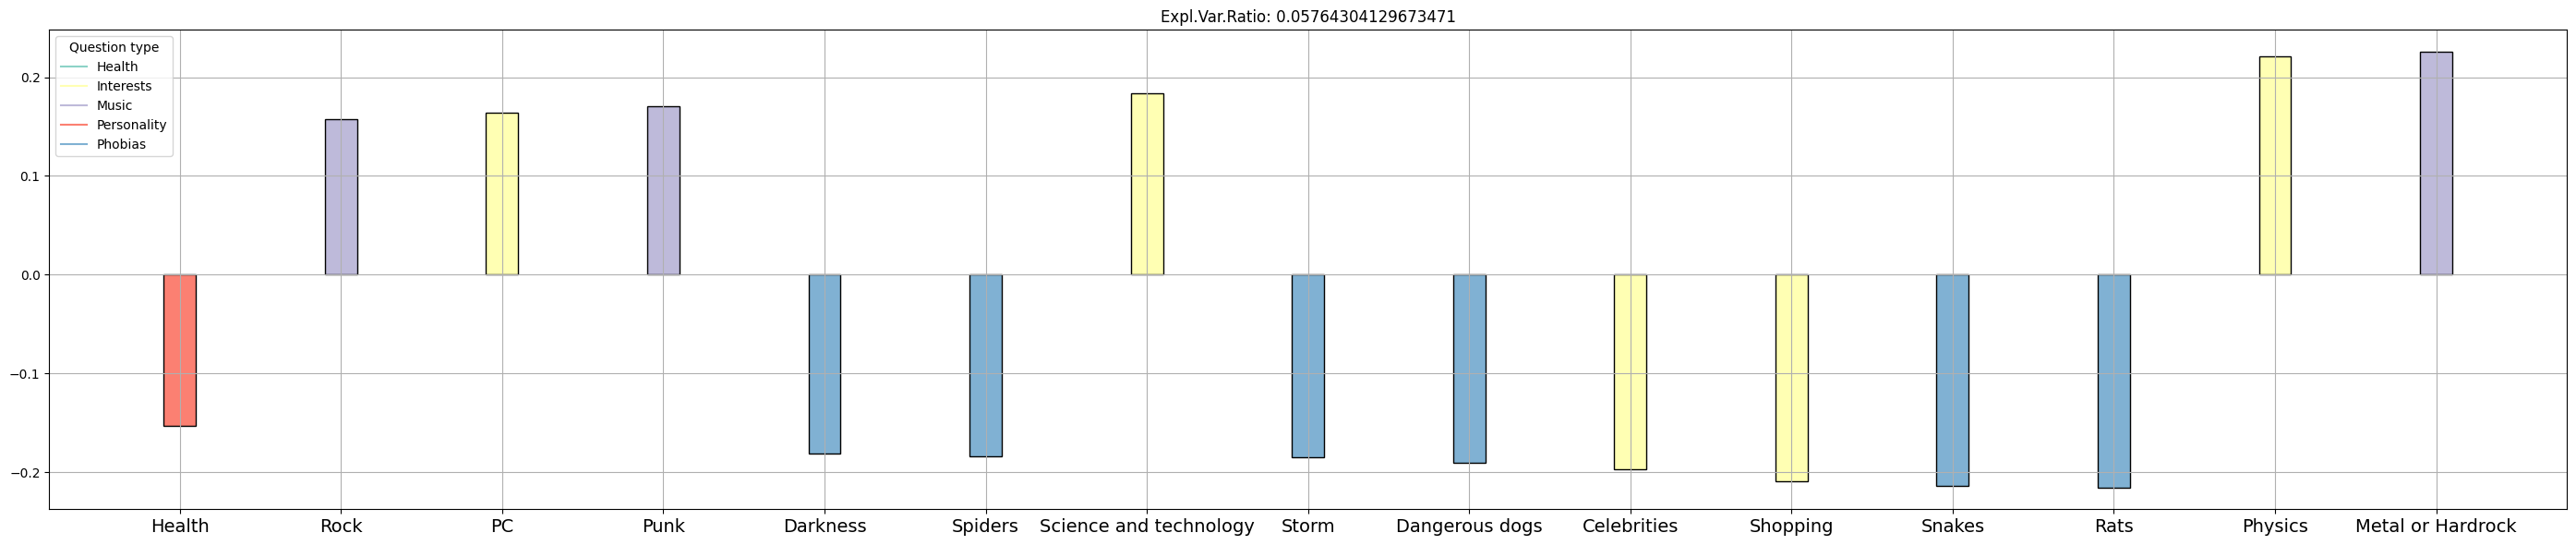

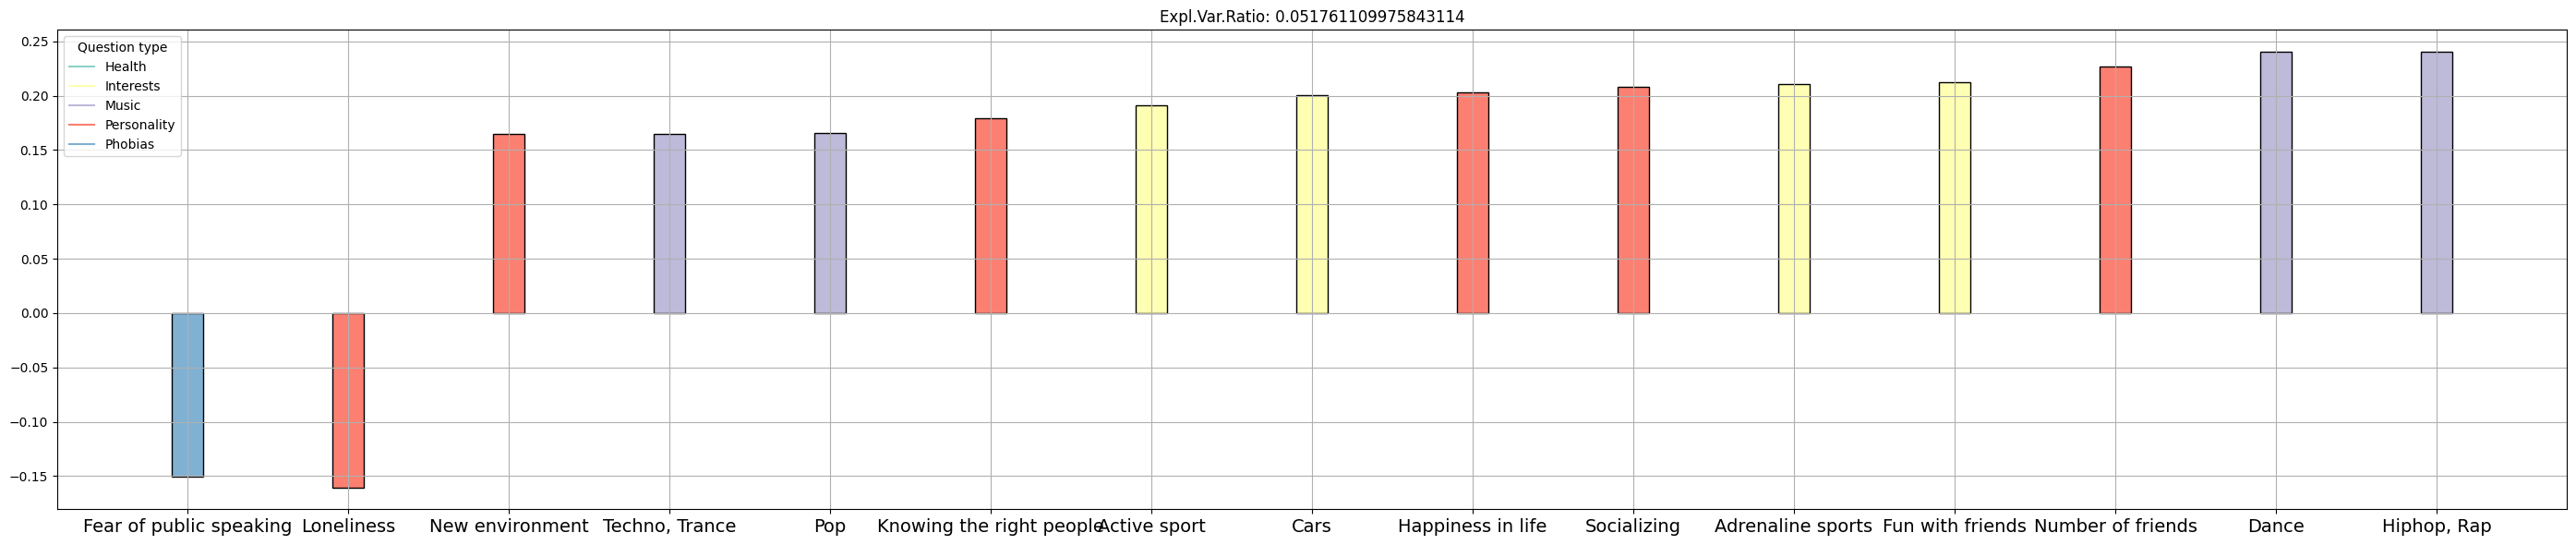

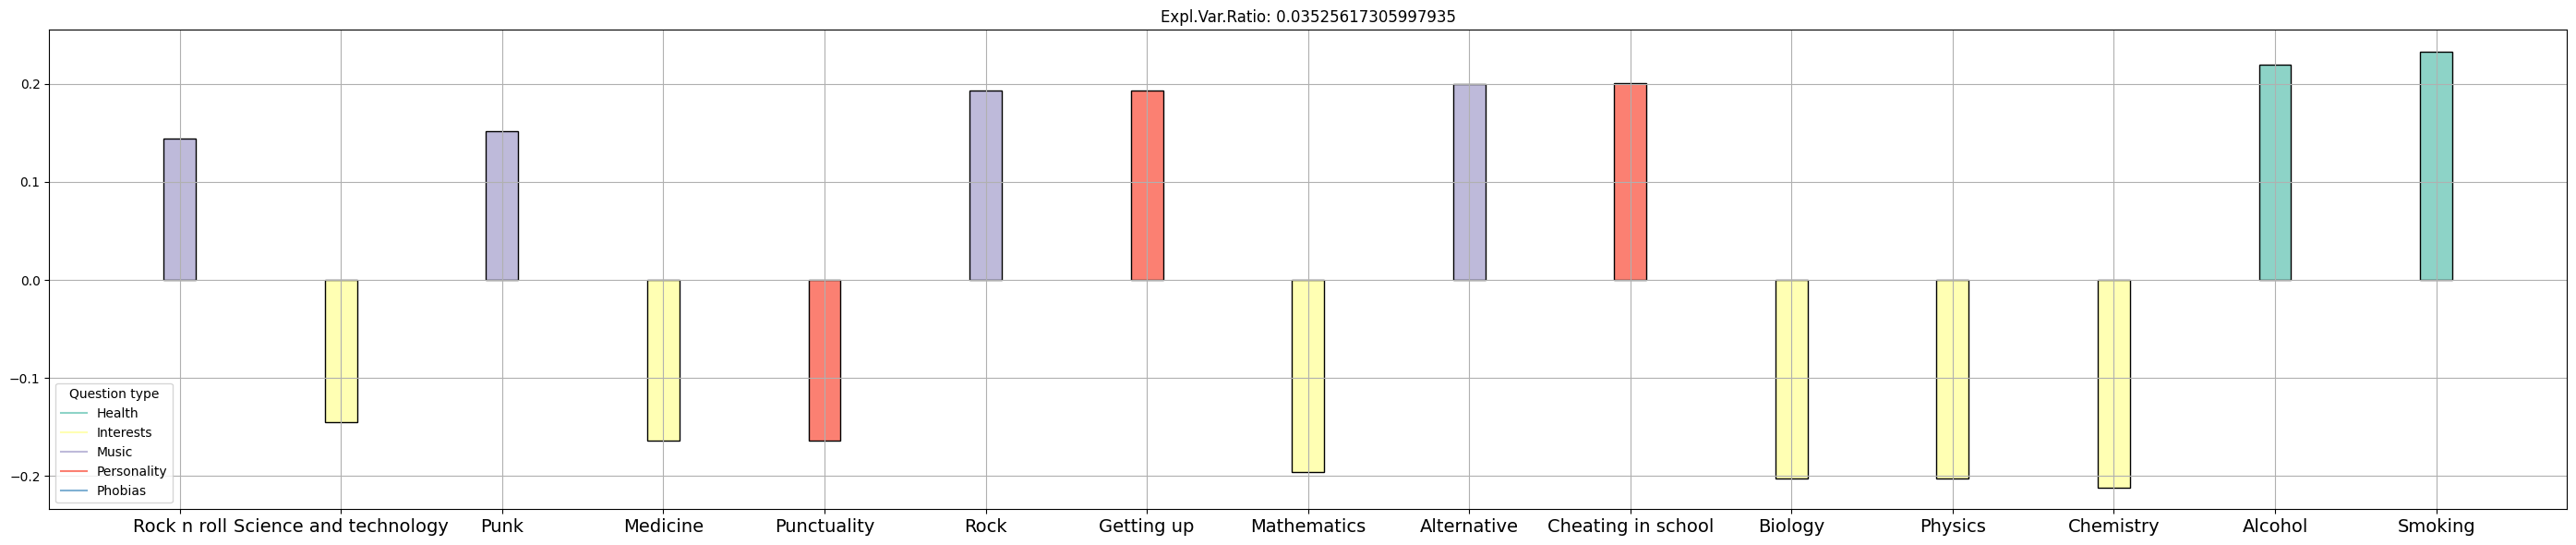

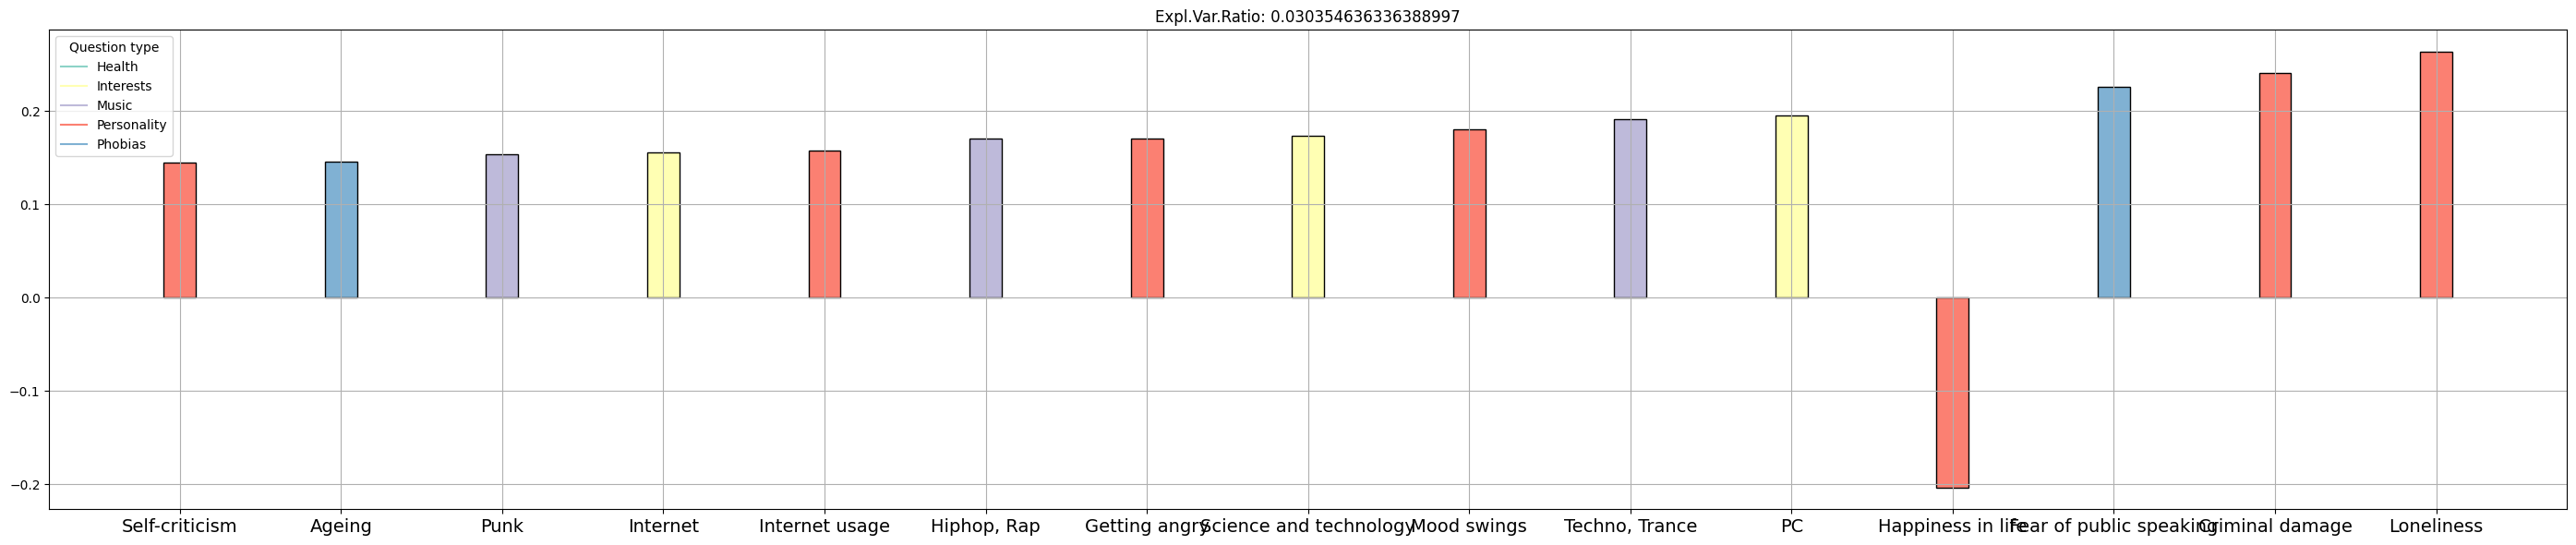

In [28]:
n_components_std = pca_std_m.n_components_ #number of components

#we define a few lists that will be useful to store all the relevant quantities

loadings_std = [] #loadings of the components
indexes_std = [] #indexes of the most important features for each component
top_loadings_std = [] #top loadings
top_features_std = [] #corresponding names of the top features
features_number = 15

#in this cycle we find the most important features for each component, then we plot them

for ii in range(n_components_std):

    loadings = pca_std_m.components_[ii,:]
    indexes = np.argsort(np.abs(loadings))[-features_number:]
    top_loadings = loadings[indexes]
    top_features = X_df.columns[indexes]
    top_colors = [variable_to_color[var] for var in top_features]

    
    plt.figure(figsize=(28,6))
    plt.title("Expl.Var.Ratio: "+str(pca_std_m.explained_variance_ratio_[ii]))
    plt.bar(range(features_number),  top_loadings, color = top_colors, width=0.2, edgecolor = "black")
    plt.xticks(range(features_number), labels= top_features, fontsize=14)
    plt.legend(handles = type_colors_legend, title = "Question type")
    plt.grid()
    plt.tight_layout()
    plt.show()

    loadings_std.append(loadings)
    indexes_std.append(indexes)
    top_loadings_std.append(top_loadings)
    top_features_std.append(top_features)




#### ****Principal Component Analysis (PCA) - STD Dataset****

---

#### **PC1: "Cultural and Artistic Interests"**

- **Main Features**:  
  - The features with a high contribution to the first Principal Component are **opera**, **classical music**, **theater**, and **jazz**, which indicate a particular focus on **Performing Arts**. Along with **reading**, **Latin**, and other cultural indicators, they define a person's interest in artistic and cultural subjects.

- **Interpretation**:  
  - This axis differentiates individuals with a strong interest in arts and culture from those less engaged in these areas.

---

#### **PC2: "Rational Self-Control vs Emotional Sensibility"**

- **Caratteristiche principali**:

    - **Positive Contributions**:
        - Derived from scientific and rational subjects like **physics** and **technology**.
        - Associated with bold music genres such as **heavy metal** and **rock**, which express a defiance of fears.

    - **Negative Contributions**:
        - Linked to common and specific fears, such as fear of **darkness**, **spiders**, or **snakes**.
        - Contrasted with milder musical interests like **pop music**, which is less bold and expressive.

- **Interpretation**:
    - This component reflects a spectrum between "Fearless and Rational Individuals" and "Vulnerable and Emotionally Reactive Individuals".

---

#### **PC3: "Extroversion vs Introversion"**

- **Positive Contributions**:
        - Associated with sociability and an active lifestyle, involving **sports**, **socializing**, and **fun with friends**, emphasizes extroversion social dynamism.

- **Negative Contributions**:
      - They express feelings of **loneliness** and shyness in unfamiliar settings, along with a **fear of public speaking**, while showing a preference for less dynamic or more solitary activities, such as **reading**.

- **Interpretation**:
    - This component contrasts Socially Active and Extroverted Individuals with Introverted and Shy ones.
---

#### **PC4: "Bad habits vs Analytical Focus"**

- **Positive Contributions**:
    - Linked to behaviors such as **drinking alcohol**, **smoking cigarettes**, and **cheating in school**, which reflect a tendency towards risk-taking, a lack of focus, and challenges with self-discipline or commitment.

- **Negative Contributions**:
    - Associated with logical and analytical subjects like **math**, **physics**, and **science**, showing a stronger focus on problem-solving and structured thinking, with less interest in recreational or social activities.

- **Interpretation**:
    - This component contrasts individuals who are more emotionally driven and prone to risky behaviors with those who are more analytical, disciplined, and goal-oriented.
---

#### **PC5: "Rebellion and marginalization vs Happiness"**

- **Positive Contributions**:
    - A range of traits hinting at poor mental health, such as **loneliness**, **criminal damage**, **PC** and **mood swings**.

- **Negative Contributions**:
    - The only major negative contribution is **happiness**, which reinforces how the other features picture an unstable and negative behavior.

- **Interpretation**:
    - This component highlights a spectrum between individuals who express their poor mental health through criminal acts, spending a lot of time alone and have unstable moods and other who have a high degree of happiness in their lives.


In [20]:
#We can define the PCA features as follows:

pc_std_names = ["Arts and Cultural interests", "Rational Self-Control vs Impressionable", "Extroversion vs Introversion", "Bad habits vs Analytical Focus", "Poor mental health vs Happiness"]

### Section 3.3 PCA over MinMax Dataset

We know perform PCA over the MinMax dataset to identify its principal components and the relative key features.

Computing the PCA for the dataframe -- the maximum number of components is 5
Couldn't find a PCA explaining at least 33% of the variance. 5 components are given
Variance explained: 25.20%


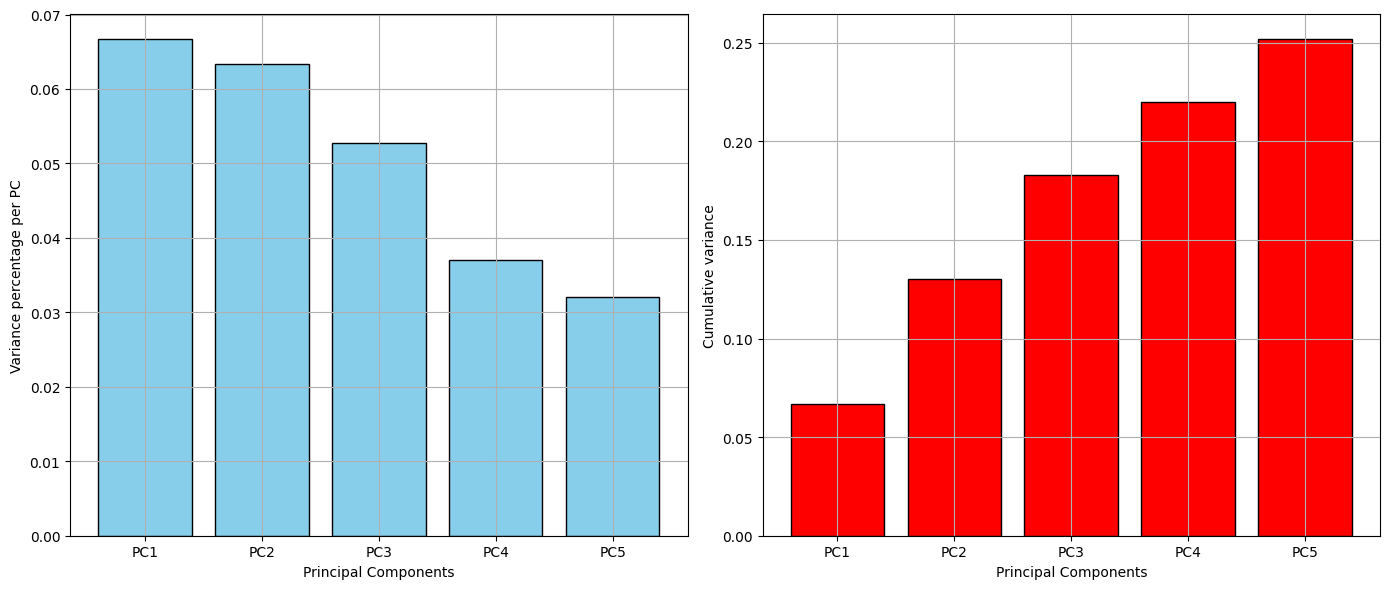

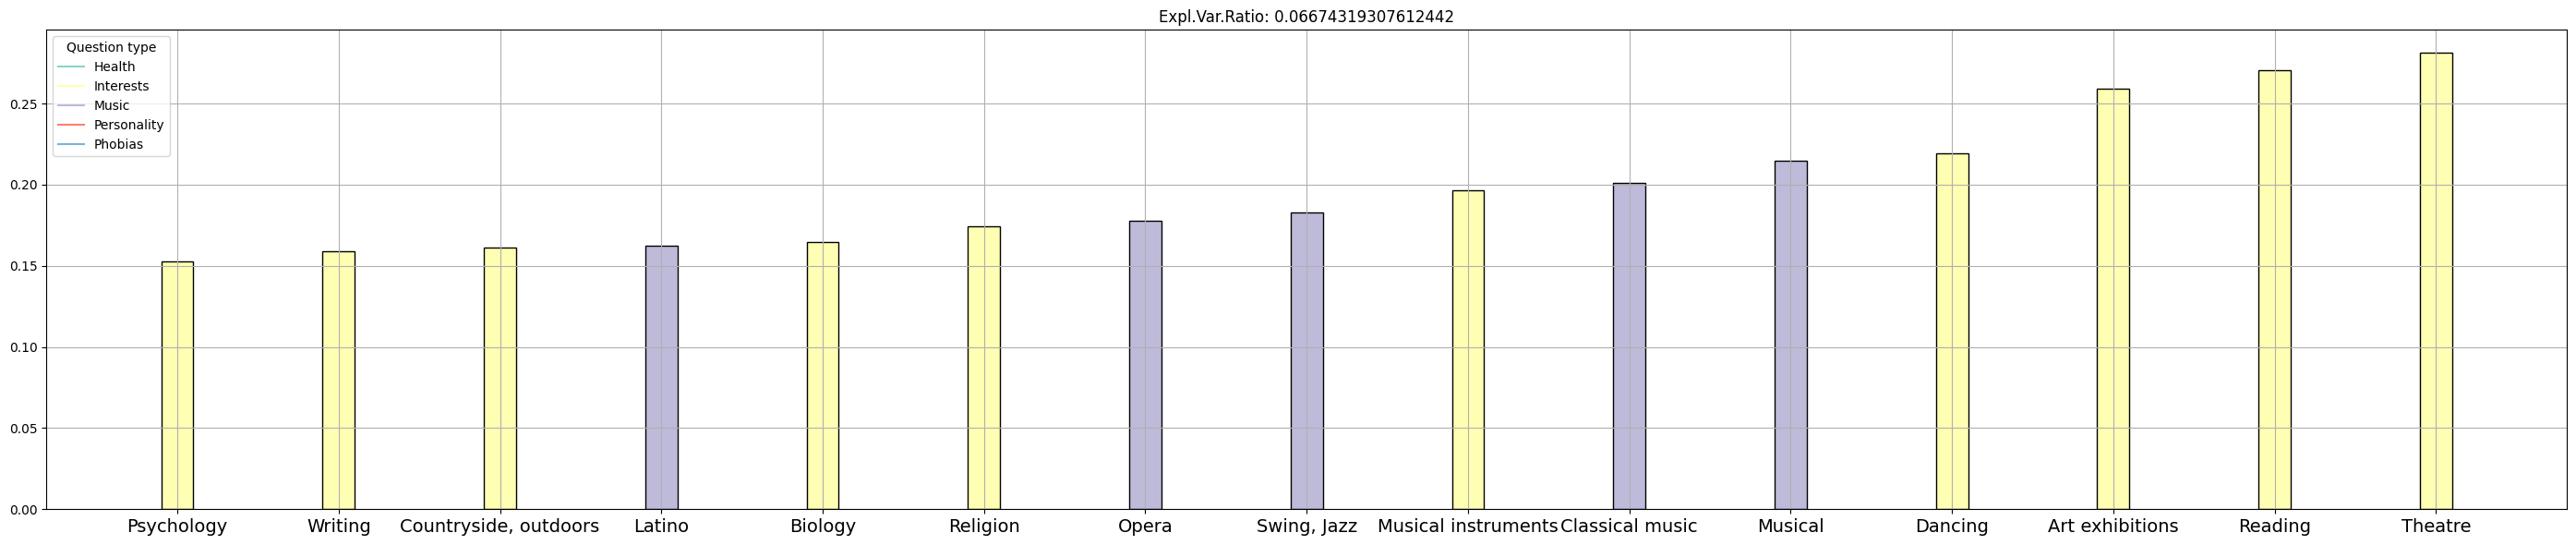

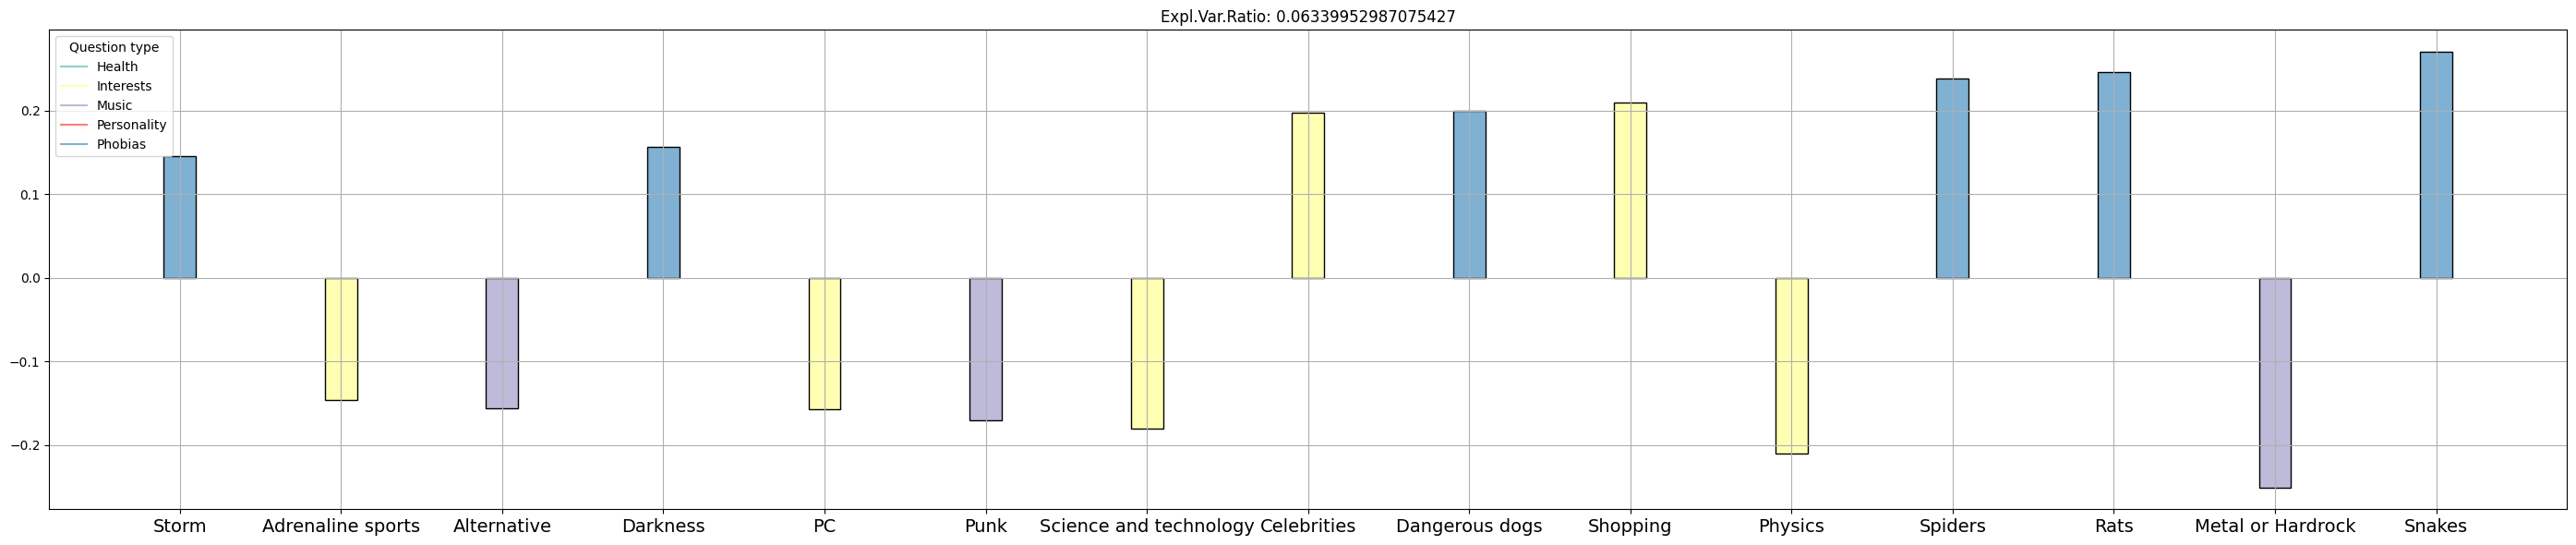

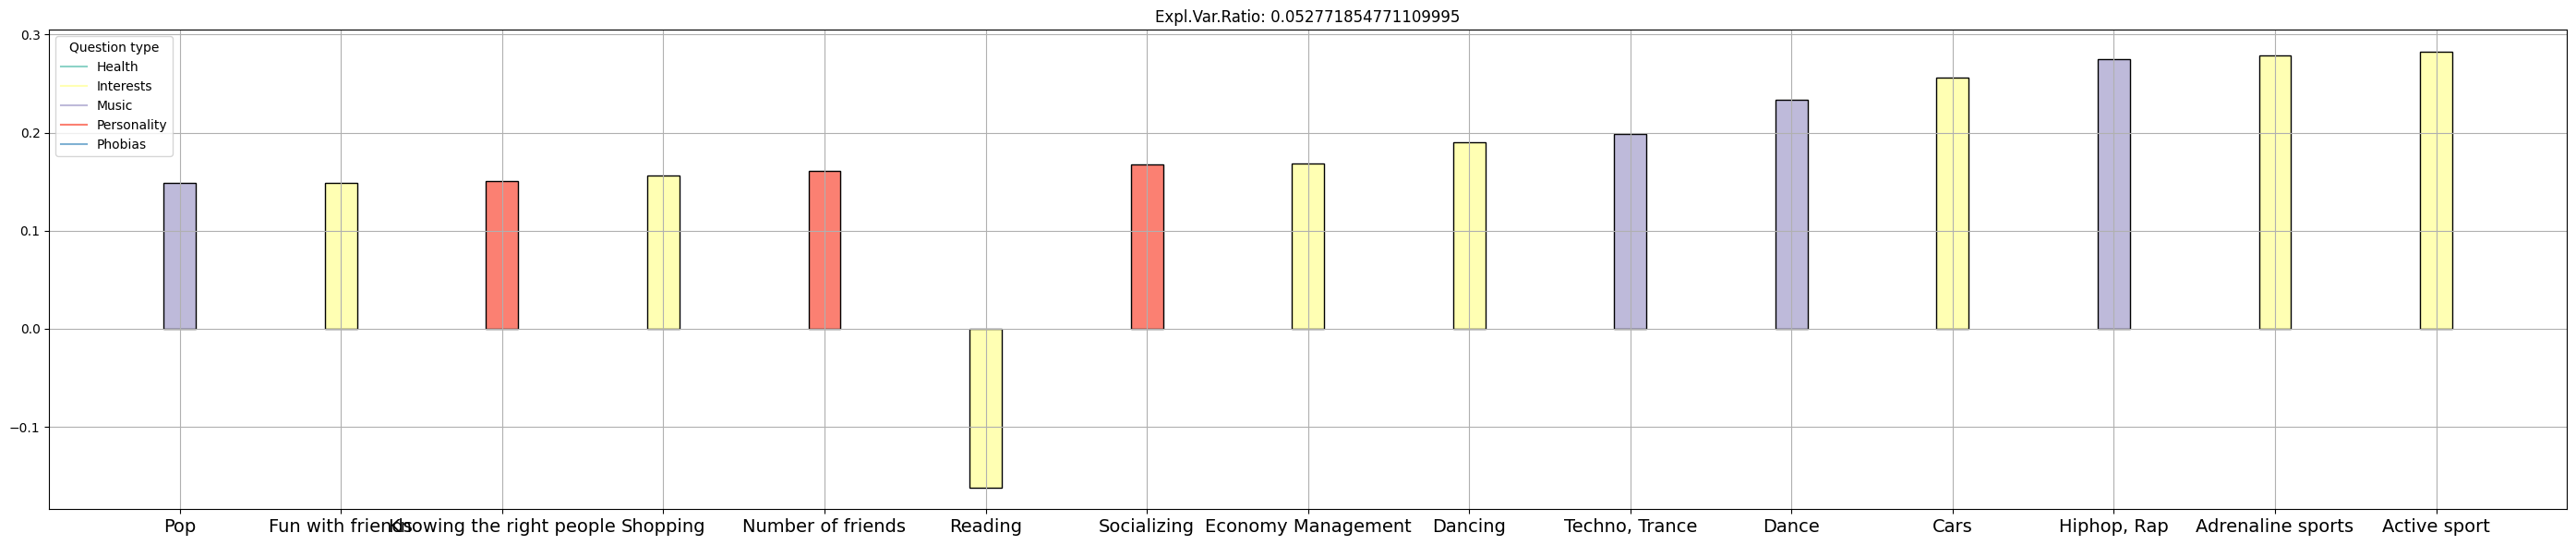

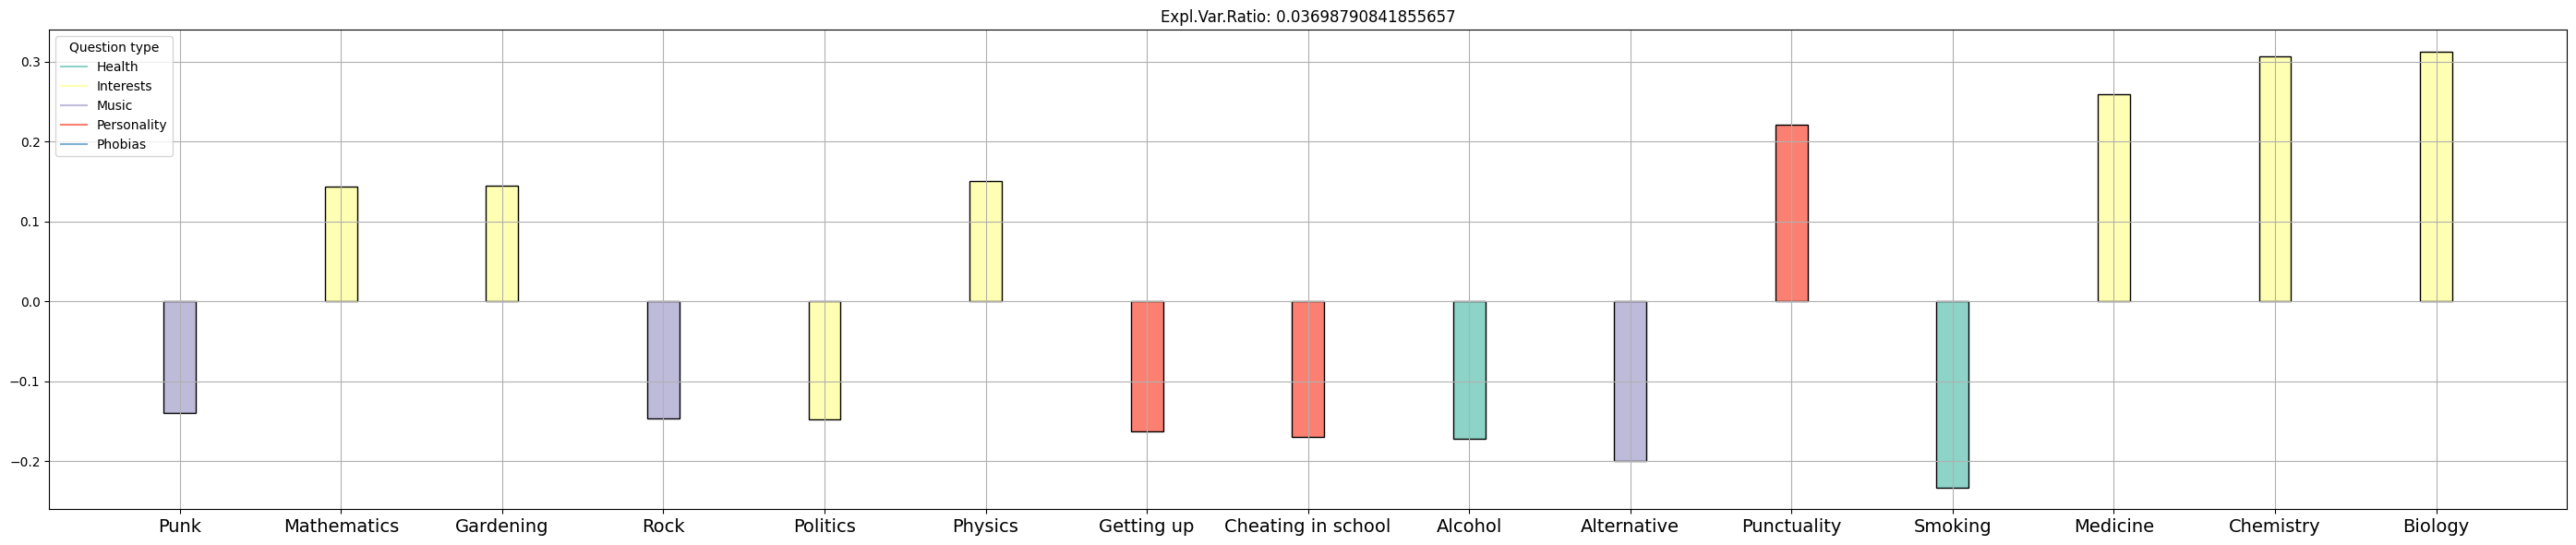

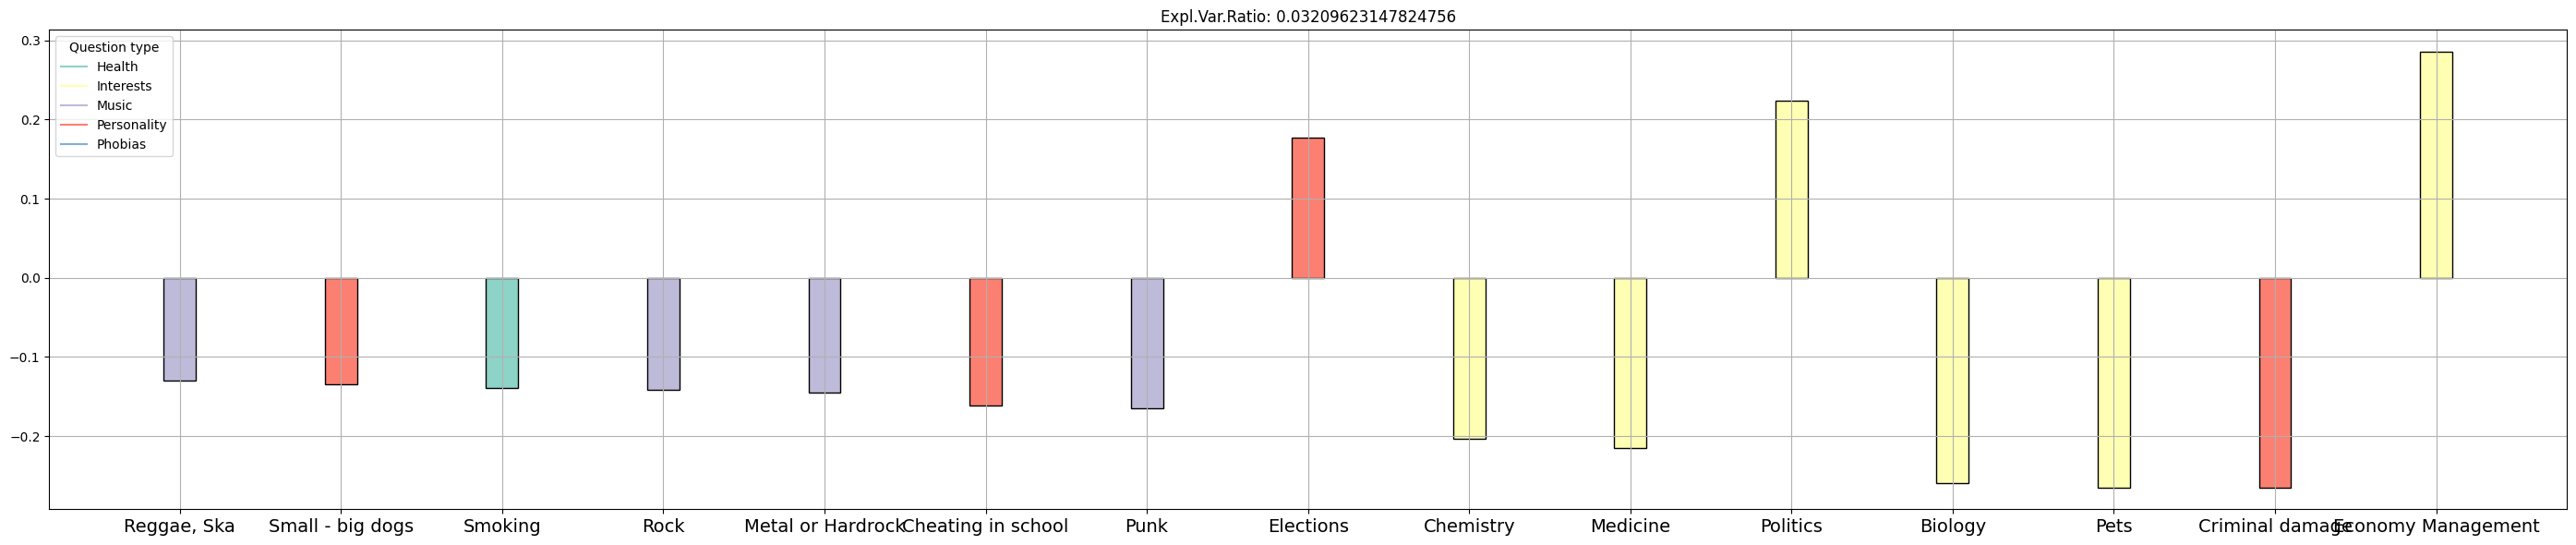

In [23]:
pca_minmax_m = pca_computation(Xmm_df,m) #computation of the PCA for Xmm_df

n_components_mm = pca_minmax_m.n_components_

loadings_mm = [] #loadings
indexes_mm = [] #list to store the indexes of the top 10 loadings
top_loadings_mm = [] #top loadings
top_features_mm = [] #names of the corresponding top 10 features
n_features = 15

for ii in range(n_components_mm):

    loadings = pca_minmax_m.components_[ii,:]
    indexes = np.argsort(np.abs(loadings))[-n_features:]
    top_loadings = loadings[indexes]
    top_features = X_df.columns[indexes]
    top_colors = [variable_to_color[var] for var in top_features]

    plt.figure(figsize=(28,6))
    plt.title("Expl.Var.Ratio: "+str(pca_minmax_m.explained_variance_ratio_[ii]))
    plt.bar(range(n_features), top_loadings, color = top_colors, width = 0.2, edgecolor = "black")
    plt.xticks(range(n_features), fontsize = 14, labels= top_features)
    plt.legend(handles = type_colors_legend, title = "Question type")
    plt.grid()
    plt.tight_layout()
    plt.show()

    loadings_mm.append(loadings)
    indexes_mm.append(indexes)
    top_loadings_mm.append(top_loadings)
    top_features_mm.append(top_features)



#### ****Principal Component Analysis (PCA) - MinMax Dataset****

---
-   N.B. In naming the PCs that presents both, negative and positive influence from features, the name that comes first is always associated to the interpretation of the positive direction. ES: Extrovert vs Introvert - The features with positive loadings on the PC where those that led us to the association of extroversion to the increasing direction of the component. This convention is respected in the whole report and helps to understand results and visualizations.
---
#### **PC1: "Cultural and Artistic Interests"**

- **Main Features**:  
  - The features with a high contribution to the first Principal Component are **opera**, **classical music**, **theater**, and **jazz**, which indicate a particular focus on **Performing Arts**. Along with **reading**, **Latin**, and other cultural indicators, they define a person's interest in artistic and cultural subjects.

- **Interpretation**:  
  - This axis differentiates individuals with a strong interest in arts and culture from those less engaged in these areas.

---

#### **PC2: "Impressionable and Emotional vs Rational and Alternative"**

- **Caratteristiche principali**:

    - **Positive Contributions**:
        - Linked to common and specific fears, such as fear of **darkness**, **spiders**, or **snakes**.
        - Shows interest for mainstream and pop culture since attributes like **Celebrities** results influent.

    - **Negative Contributions**:
        - Derived from scientific and rational subjects like **physics** and **technology**.
        - Associated with alternative music genres such as **heavy metal** and **alternative** life style.

- **Interpretation**:
    - This component reflects a spectrum between emotional vs rational individuals.

---

#### **PC3: "Energic and Proactive Individuals"**

- **Main Feature**:
    - The most contributing features involve **adrenaline sports** and **active sports**, together with interests in **cars**, **hip-hop music**, and various **socio-economic** activity indicators.

- **Interpretation**:
    - This component represents a dimension along which individuals are distributed based on their **proactive behavior** toward society, and social activities specially when those are Adrenalinic and Active sports.

---


#### **PC4: "Analytical Focus vs Bad habits"**

- **Positive Contributions**:
    - Associated with logical and analytical subjects like **Mathematics**, **Physics**, and **Science**, showing a stronger focus on problem-solving and structured thinking, with less interest in recreational or social activities.

- **Negative Contributions**:
    - Linked to behaviors such as **drinking alcohol**, **smoking cigarettes**, and **cheating in school**, which reflect a tendency towards risk-taking, a lack of focus, and challenges with self-discipline or commitment.


- **Interpretation**:
    - This component contrasts individuals who are more emotionally driven and prone to risky behaviors with those who are more analytical, disciplined, and goal-oriented.
---

#### **PC5: "Social engagement vs Natural sciences"** ####

- **Positive Contributions**:
    - Linked to individuals who are interested in social issues, such as **economics** and **politics**.

- **Negative Contributions**:
    - Individuals who are keen of natural sciences, such as **biology**, **chemistry** and **medicine**.

- **Interpretation**: 
    - Here there is a contrast between students who lean towards socio-economic subjects vs ones that are more interested in sciences.

In [27]:
#We can give then each PC a name

pc_mm_names = ["Arts and Cultural interests", "Impressionable vs Rational / Alternative", "Energic and Proactive Individuals", "Analytical focus vs Bad Habits", "Social sciences vs Natural Sciences" ]

#### ****Comparison between the results from the two analyses**** ####
As expected, the results from the two analyses don't differ much when looking at the first components. While the features are presented in a different order when ranked by their contribution to the Principal Components, the meaning of the main three PCs is almost identical, with some slight differences, such as the slightly remarked emphasis on music interests captured from the second component in the **Std** scaled data, that's missing in the **MinMax** scaled one, or the fact that the interpretation of the 3rd component in the **MinMax** leaded us to name it "Energic and Proactive", characteristics that when declined in social contests results in Extrovert individuals as the ones described from the 3rd PC of the **Std** . The fourth component presents similar characteristics in the two datasets, while their order is inverted. As for the fifth component we have different results: in the **Std** dataset the emphasis is on mental health, but in the **MinaMax** one there is an attention towards the interests of the individuals. This difference can be attributed to the different distribution of the variance resulted from the two scaling methods.

## Section 3.4: Score Graphs

To plot the score graph, we first have to project the data in the new reference system

In [29]:
Y_mm = pca_minmax_m.transform(Xmm_df)
Y_std = pca_std_m.transform(Xstd_df)

In [31]:
print(variables_by_type["Demographics"])

['Age', 'Height', 'Weight', 'Number of siblings', 'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type', 'Home Type']


In [32]:
#We first define a color set for each label we are interested in.
#We choose to study the labels related to age, gender, education, home town type
set1 = cm.Set1.colors
set2 = cm.Set2.colors


edu = resp_filt['Education'].unique()
print(f"Education levels are: {list(edu)}")

home_town = resp_filt['Home Town Type'].unique()
print(f"Different home town types: {list(home_town)}")

age = resp_filt["Age"].unique()
print(f"Different age levels: {age}")

gender = resp_filt["Gender"].unique()
print(f"Genders represented: {list(gender)}")

hand = resp_filt["Hand"].unique()
print(f"Hand: {list(hand)}")

OnlyChild = resp_filt["Only child"].unique()
print(f"Only child: {list(OnlyChild)}")


Education levels are: ['college/bachelor degree', 'secondary school', 'primary school', 'masters degree', 'doctorate degree', 'currently a primary school pupil']
Different home town types: ['village', 'city', nan]
Different age levels: [20. 19. 22. 17. 24. 18. 25. 23. 26. 21. 28. 16. 15. nan 29. 30. 27.]
Genders represented: ['female', 'male', nan]
Hand: ['right', 'left', nan]
Only child: ['no', 'yes']


In [79]:
color_hand_dict = {
    'right' : set1[0],
    'left' : set1[1],
    'missing' : 'grey'
}

color_onlychild_dict = {
    'no' : set1[0],
    'yes' : set1[1],
    'missing' : 'grey'
}

color_education_dict = {
    'doctorate degree' : (68/255, 1/255, 84/255),
    'masters degree': (68/255, 1/255, 84/255),
    'college/bachelor degree' : (68/255, 1/255, 84/255),
    'secondary school' :  (34/255, 167/255, 132/255),
    'primary school' : (253/255, 231/255, 36/255),
    'currently a primary school pupil': (253/255, 231/255, 36/255),
    'missing': 'grey'
}

'''color_education_dict1 = {
    'doctorate degree' : (68/255, 1/255, 84/255),
    'masters degree': (64/255, 67/255, 135/255),
    'college/bachelor degree' : (41/255, 120/255, 142/255),
    'secondary school' :  (34/255, 167/255, 132/255),
    'primary school' : (121/255, 209/255, 81/255),
    'currently a primary school pupil': (253/255, 231/255, 36/255),
    'missing': 'grey'
}'''



color_town_type_dict = {
    'city' : set2[0],
    'village': set2[1],
    'missing': 'grey'
}



color_gender_dict = {
    'female': set2[3],
    'male': set2[2],
    'missing': 'grey'
}


color_age_dict = {

}

'''
color_age_dict1 = {
    '15.0': (0.267, 0.005, 0.329),
    '16.0': (0.267, 0.005, 0.329),
    '17.0': (0.283, 0.105, 0.427),
    '18.0': (0.275, 0.195, 0.496),
    '19.0': (0.249, 0.279, 0.535),
    '20.0': (0.212, 0.36, 0.552),
    '21.0': (0.181, 0.43, 0.557),
    '22.0': (0.153, 0.497, 0.558),
    '23.0': (0.128, 0.567, 0.551),
    '24.0': (0.122, 0.633, 0.53),
    '25.0': (0.176, 0.698, 0.491),
    '26.0': (0.289, 0.758, 0.428),
    '27.0': (0.449, 0.814, 0.335),
    '28.0': (0.627, 0.855, 0.223),
    '29.0': (0.815, 0.883, 0.11),
    '30.0': (0.993, 0.906, 0.144),
    'missing':'grey'
} '''





IndentationError: unexpected indent (948478429.py, line 24)

In [34]:
#now we create the corresponding columns
#we manage missing values with the grey color

colors_edu = resp_filt["Education"].apply(lambda x: color_education_dict[x] if pd.notnull(x) else color_education_dict['missing'])
colors_town = resp_filt["Home Town Type"].apply(lambda x: color_town_type_dict[x] if pd.notnull(x) else color_town_type_dict['missing'])
colors_gen = resp_filt["Gender"].apply(lambda x: color_gender_dict[x] if pd.notnull(x) else color_gender_dict['missing'])
colors_age = resp_filt["Age"].apply(lambda x: color_age_dict[str(x)] if pd.notnull(x) else color_age_dict['missing'])
colors_onlychild = resp_filt["Only child"].apply(lambda x: color_onlychild_dict[x] if pd.notnull(x) else color_onlychild_dict['missing'])
colors_hand = resp_filt["Hand"].apply(lambda x: color_hand_dict[x] if pd.notnull(x) else color_hand_dict['missing'])

colors_edu_legend = [Line2D([0], [0], color=color_education_dict[k], label = k) for k in color_education_dict.keys()]
colors_town_legend = [Line2D([0], [0], color=color_town_type_dict[k], label = k) for k in color_town_type_dict.keys()]
colors_gen_legend = [Line2D([0], [0], color=color_gender_dict[k], label=k) for k in color_gender_dict.keys()]
colors_age_legend = [Line2D([0], [0], color=color_age_dict[age], label=[age]) for age in color_age_dict.keys()]
color_hand_legend = [Line2D([0], [0], color=color_hand_dict[age], label=[age]) for age in color_hand_dict.keys()]

if 'missing' not in color_gender_dict:
    colors_age_legend.append(Line2D([0], [0], color='gray', label='missing'))

colors_onlychild_legend = [Line2D([0], [0], color=color_onlychild_dict[k], label=k) for k in color_onlychild_dict.keys()]


### Score graph 1.1: Xstd dataset, Education

---
We first plot the data without labeling them, in order to have a first glance at possible clusters and distribution of the data.

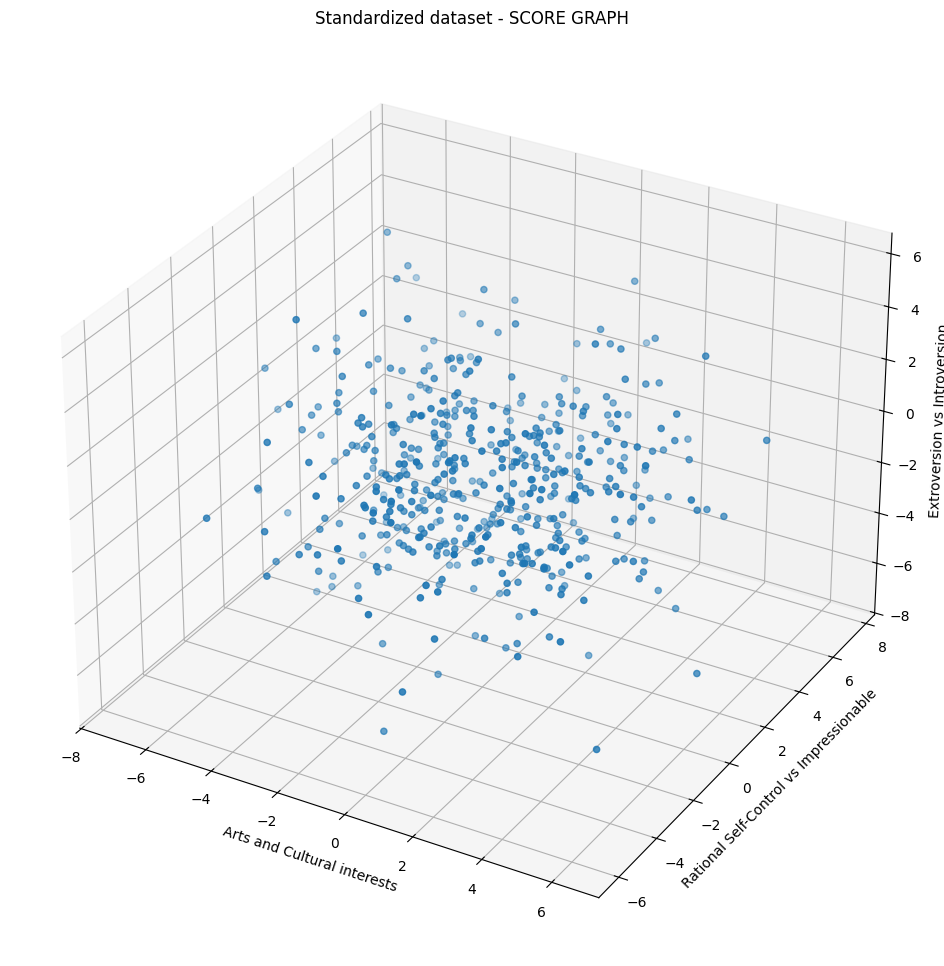

''

In [39]:
#Uncomment those lines togheter with the last one (input) to make scatterplot interactive
#matplotlib.widget
#plt.ion()



sg_std1 = plt.figure(figsize=(12, 12))
ax_sg_std1 = sg_std1.add_subplot(111, projection='3d')
ax_sg_std1.scatter(Y_std[:,0],Y_std[:,1],Y_std[:,2])
plt.title('Standardized dataset - SCORE GRAPH')
ax_sg_std1.set_xlabel(pc_std_names[0])
ax_sg_std1.set_ylabel(pc_std_names[1])
ax_sg_std1.set_zlabel(pc_std_names[2])
plt.grid()
plt.show()

input("Rotate or zoom the plot, then press Enter to exit.")

There's no clear pattern in the data. This is reasonable given that the first 3 PCs do not reach a high level of variance.



Let's have a look at the first two dimensions only

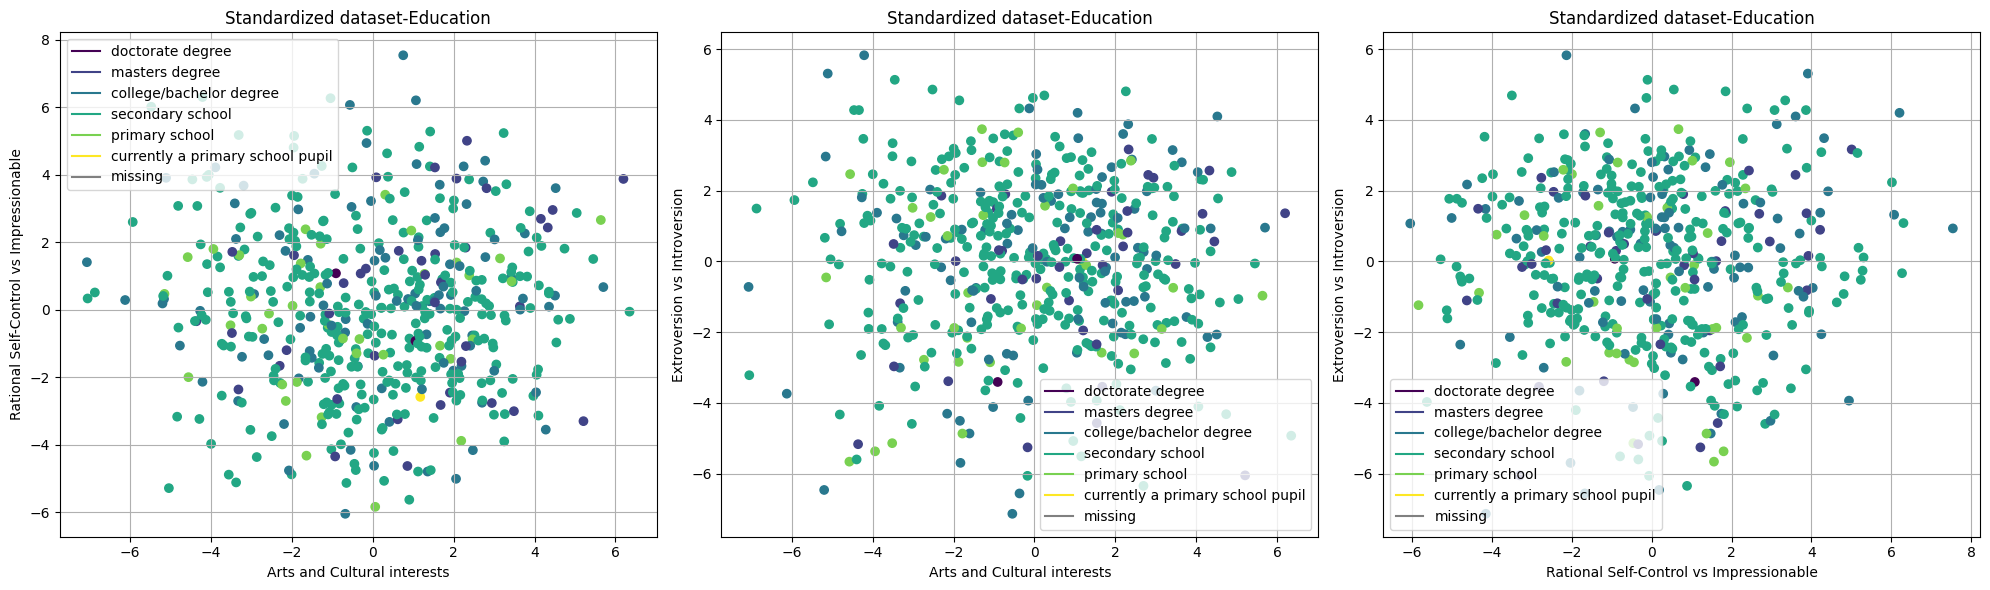

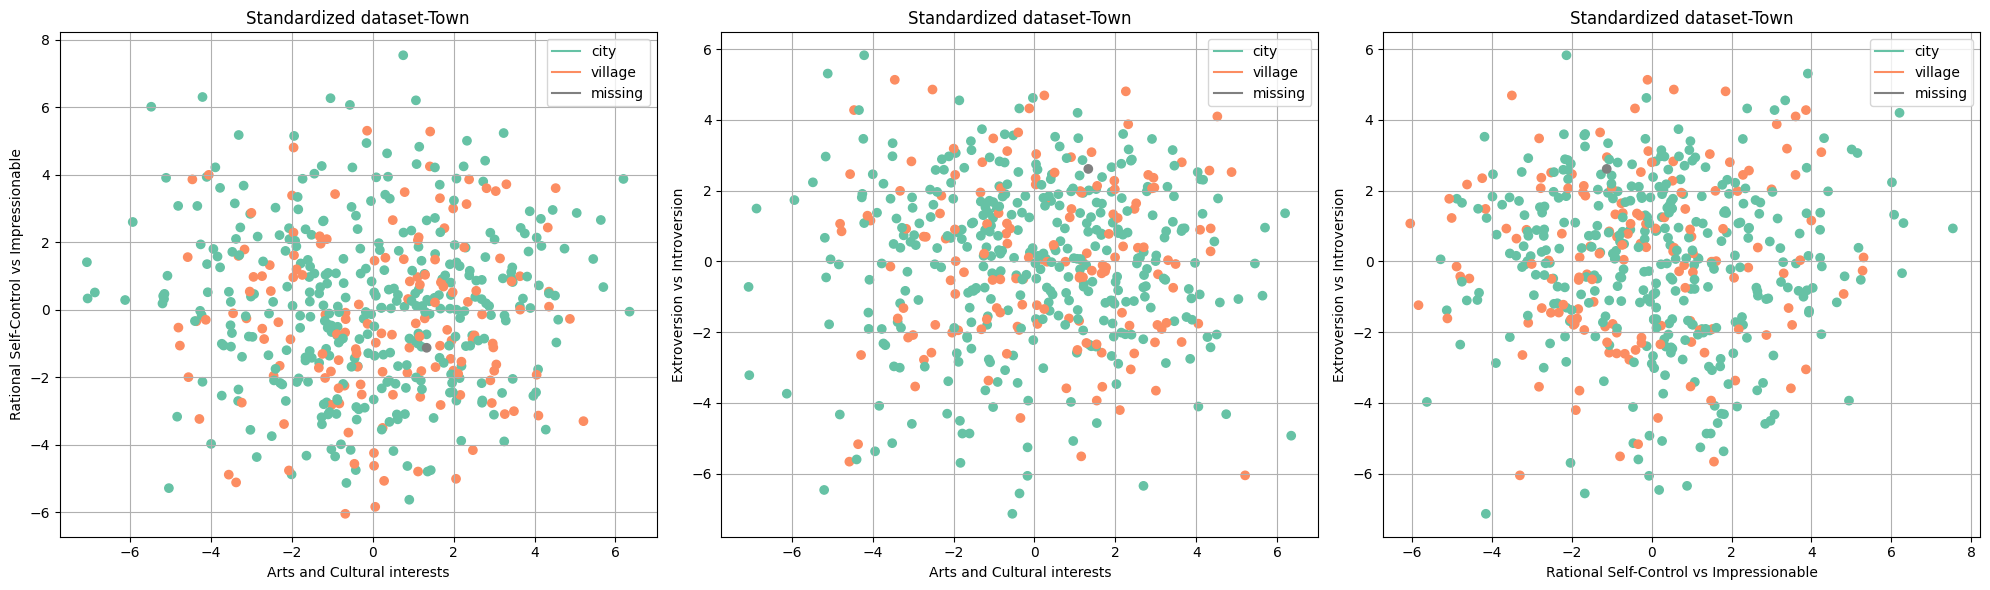

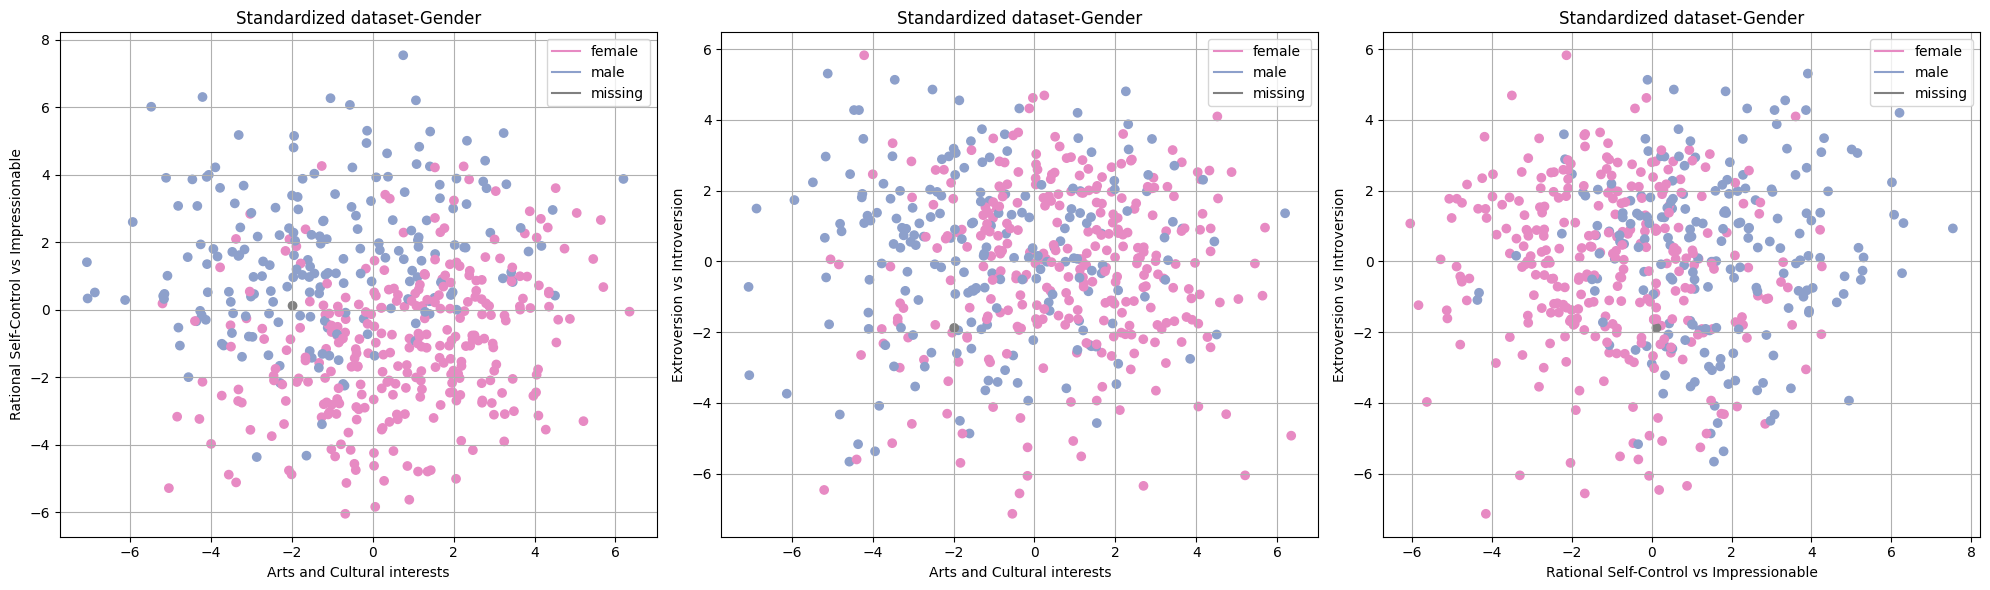

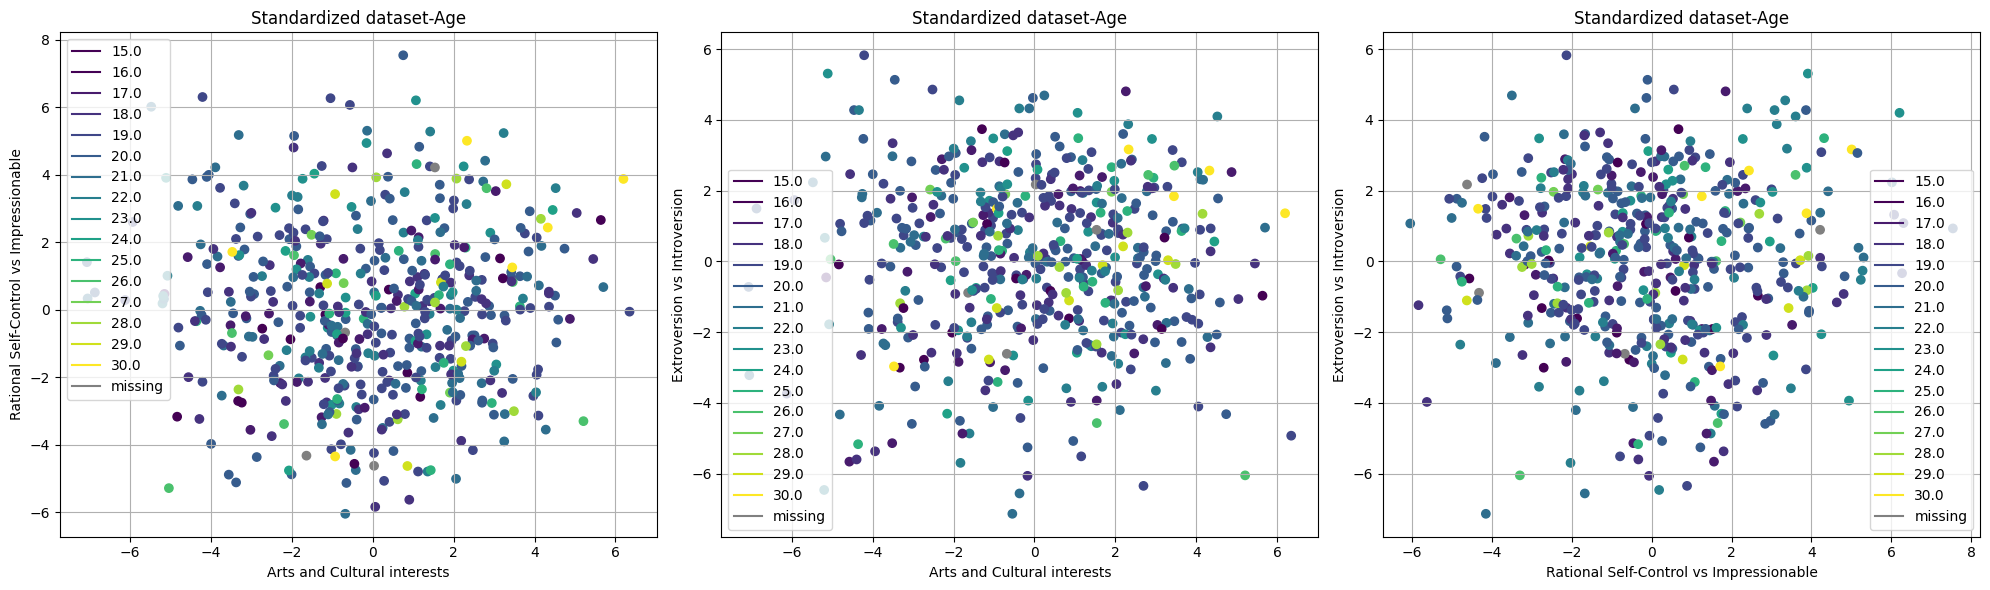

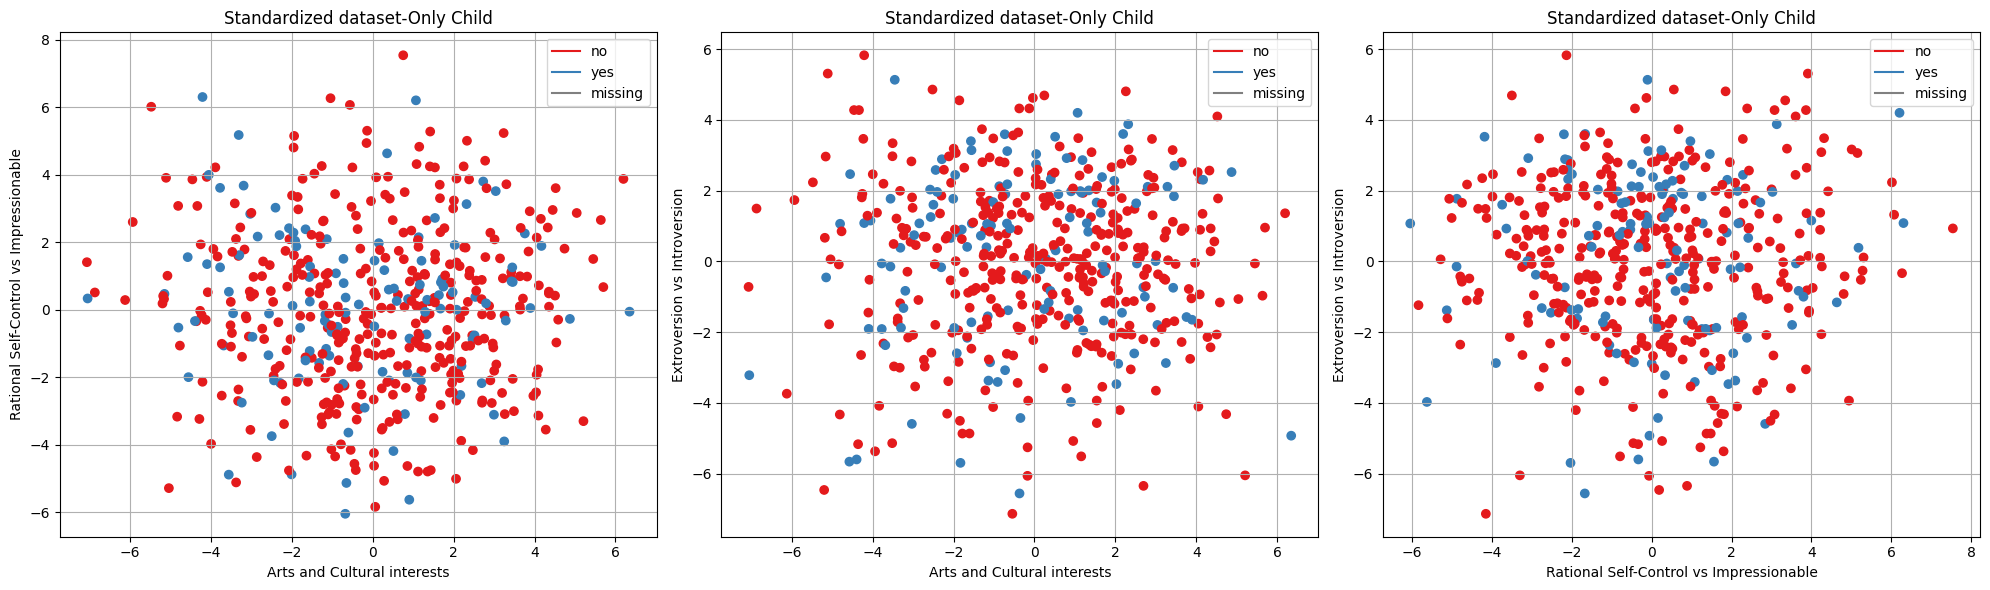

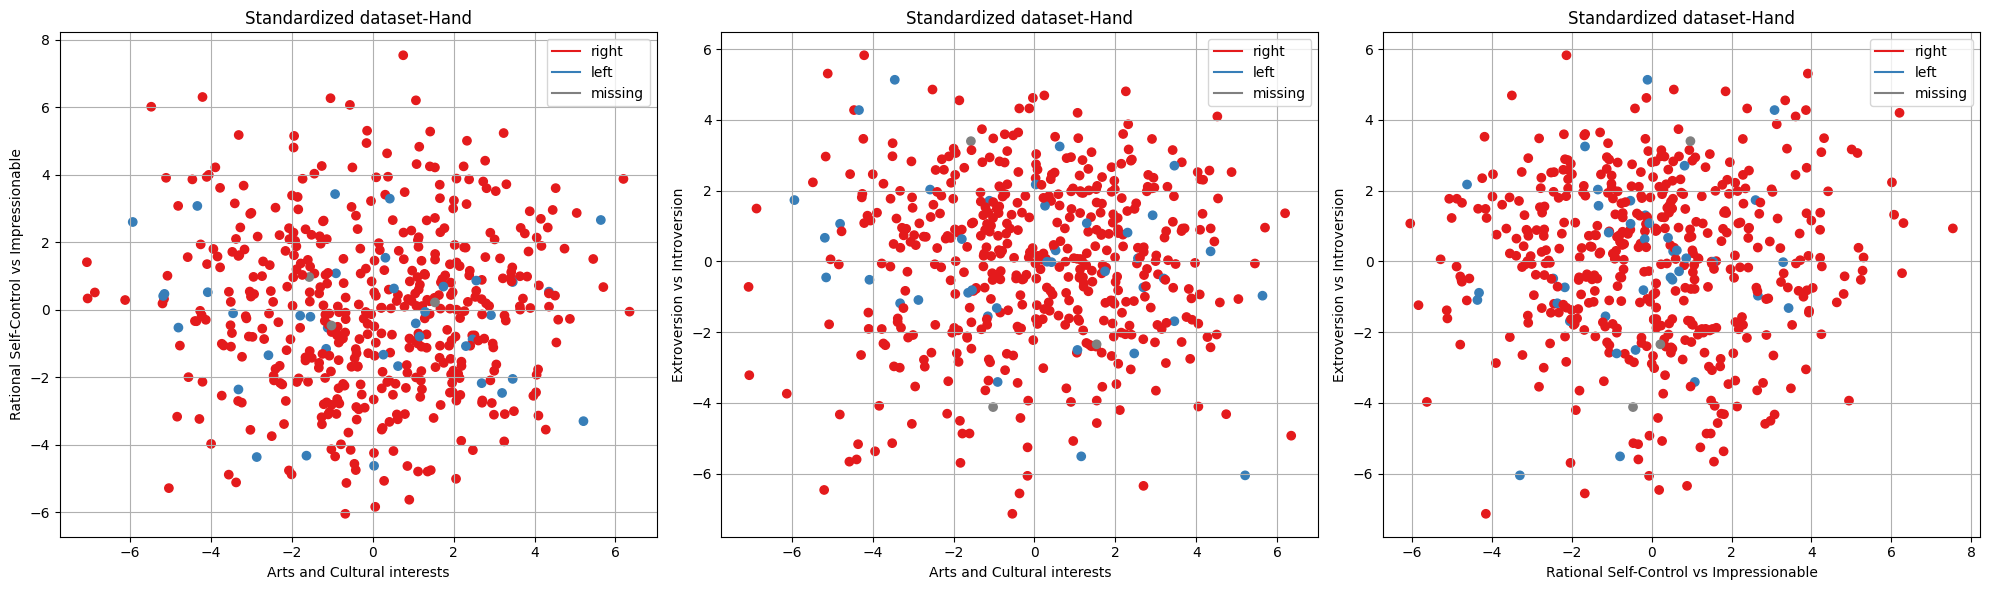

In [38]:
attribute_tuples = [
    ['Education', colors_edu, colors_edu_legend, color_education_dict],
    ['Town', colors_town, colors_town_legend, color_town_type_dict],
    ['Gender', colors_gen, colors_gen_legend, color_gender_dict],
    ['Age', colors_age, colors_age_legend, color_age_dict],
    ['Only Child', colors_onlychild, colors_onlychild_legend, color_onlychild_dict],
    ['Hand', colors_hand, color_hand_legend, color_hand_dict]
]


for [label, color, legend, dict_attr] in attribute_tuples:
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 

    axs[0].scatter(Y_std[:, 0], Y_std[:, 1], color=color)
    axs[0].set_title("Standardized dataset-" + label)
    axs[0].set_xlabel(pc_std_names[0])  
    axs[0].set_ylabel(pc_std_names[1])  
    axs[0].grid(True)
    axs[0].legend(legend, [k for k in dict_attr.keys()])

    axs[1].scatter(Y_std[:, 0], Y_std[:, 2], color=color)
    axs[1].set_title("Standardized dataset-" + label)
    axs[1].set_xlabel(pc_std_names[0])  
    axs[1].set_ylabel(pc_std_names[2])  
    axs[1].grid(True)
    axs[1].legend(legend, [k for k in dict_attr.keys()])

    axs[2].scatter(Y_std[:, 1], Y_std[:, 2], color=color)
    axs[2].set_title("Standardized dataset-" + label)
    axs[2].set_xlabel(pc_std_names[1])  
    axs[2].set_ylabel(pc_std_names[2])  
    axs[2].grid(True)
    axs[2].legend(legend, [k for k in dict_attr.keys()])


    plt.tight_layout()

 
    plt.show()


### Score graph 2.1: MinMax dataset, education

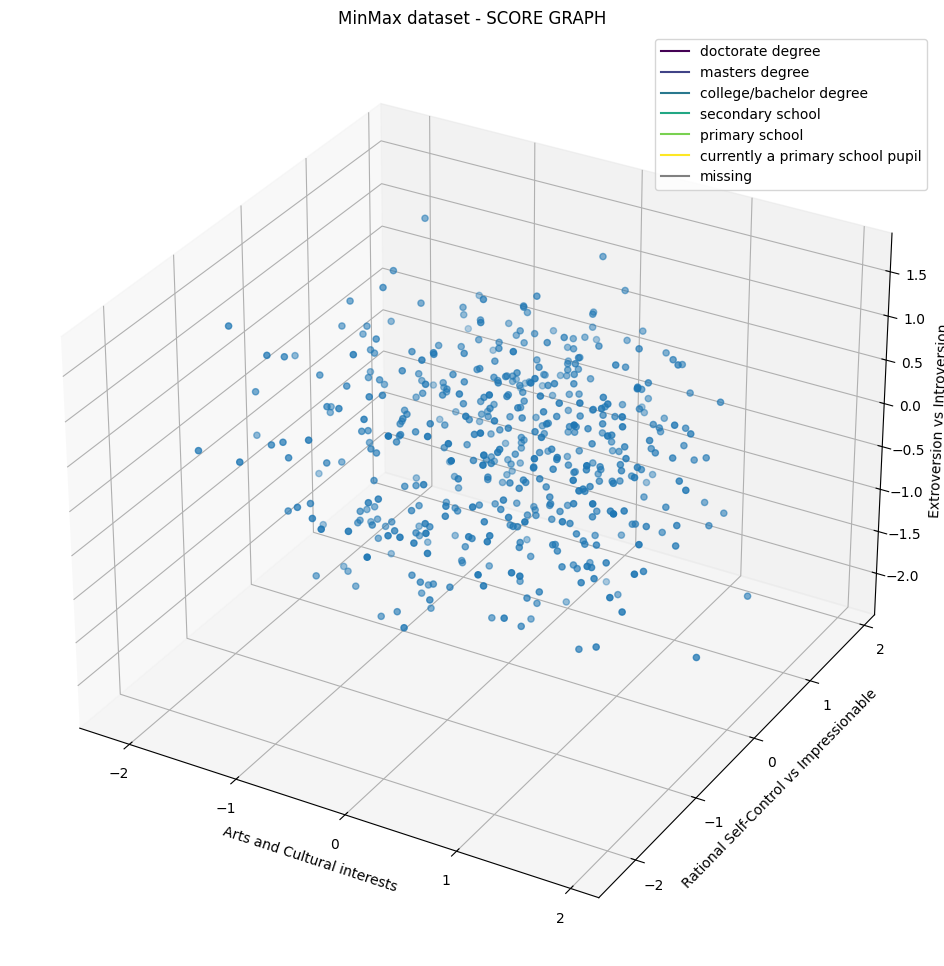

In [40]:
#education score graph wit MinMax dataset


sg_mm1 = plt.figure(figsize=(12, 12))
ax_sg_mm1 = sg_mm1.add_subplot(111, projection='3d')
ax_sg_mm1.scatter(Y_mm[:,0],Y_mm[:,1],Y_mm[:,2])
plt.title('MinMax dataset - SCORE GRAPH')
ax_sg_mm1.set_xlabel(pc_std_names[0])
ax_sg_mm1.set_ylabel(pc_std_names[1])
ax_sg_mm1.set_zlabel(pc_std_names[2])
plt.legend(colors_edu_legend, [k for k in color_education_dict.keys()])
plt.grid()
plt.show()

NameError: name 'pc_mm_names' is not defined

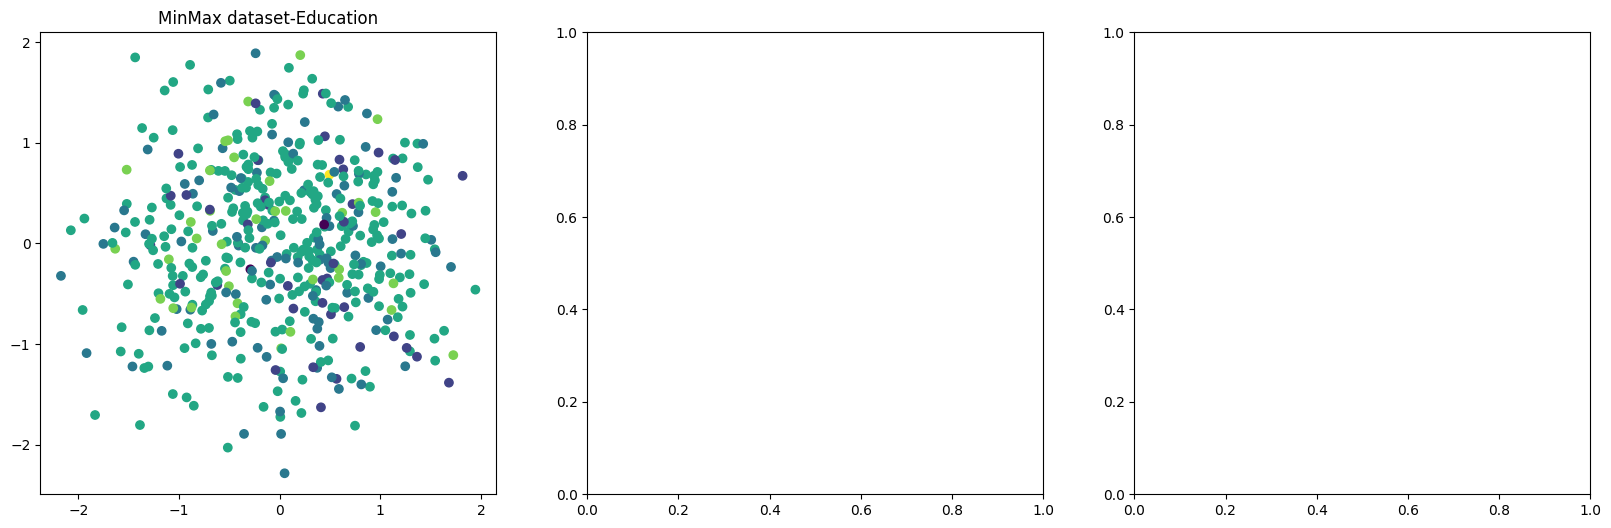

In [41]:


for [label, color, legend, dict_attr] in attribute_tuples:
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 

    axs[0].scatter(Y_mm[:, 0], Y_mm[:, 1], color=color)
    axs[0].set_title("MinMax dataset-" + label)
    axs[0].set_xlabel(pc_mm_names[0])  
    axs[0].set_ylabel(pc_mm_names[1])  
    axs[0].grid(True)
    axs[0].legend(legend, [k for k in dict_attr.keys()])

    axs[1].scatter(Y_mm[:, 0], Y_mm[:, 2], color=color)
    axs[1].set_title("MinMax dataset-" + label)
    axs[1].set_xlabel(pc_mm_names[0])  
    axs[1].set_ylabel(pc_mm_names[2])  
    axs[1].grid(True)
    axs[1].legend(legend, [k for k in dict_attr.keys()])

    axs[2].scatter(Y_mm[:, 1], Y_mm[:, 2], color=color)
    axs[2].set_title("MinMax dataset-" + label)
    axs[2].set_xlabel(pc_mm_names[1])  
    axs[2].set_ylabel(pc_mm_names[2])  
    axs[2].grid(True)
    axs[2].legend(legend, [k for k in dict_attr.keys()])


    plt.tight_layout()

 
    plt.show()

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

### Section 4.1: k-Means with the standardized dataset

In [42]:
#we make a comparison between results with different k

km_std_list = []
silcoeff_std_list = []
k_std_list = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE k-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_std_list)):
    print(f'****************** START k-MEANS WITH k={k_std_list[i]} ******************')
    print('Computing...')
    km_std_list.append(KMeans(n_clusters=k_std_list[i], random_state = 47 ))
    km = km_std_list[i]
    km.fit(Y_std)
    silcoeff_std_list.append(silhouette_score(Y_std, labels = km.labels_))
    print(f'****************** END k-MEANS WITH k={k_std_list[i]} ******************')
    print('')

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best_std = np.argmax(silcoeff_std_list)
k_std = k_std_list[i_best_std]
km_std = km_std_list[i_best_std]

# VISUALIZE THE RESULT
print('')
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_std_list)} --> k = {k_std}')
print('**************************************************************')

****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************

****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************

****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************

****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************

****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************

****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************

****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************

****************** START k-MEANS WITH k=10 ******************


Now we plot the centroids into the 3D score graphs

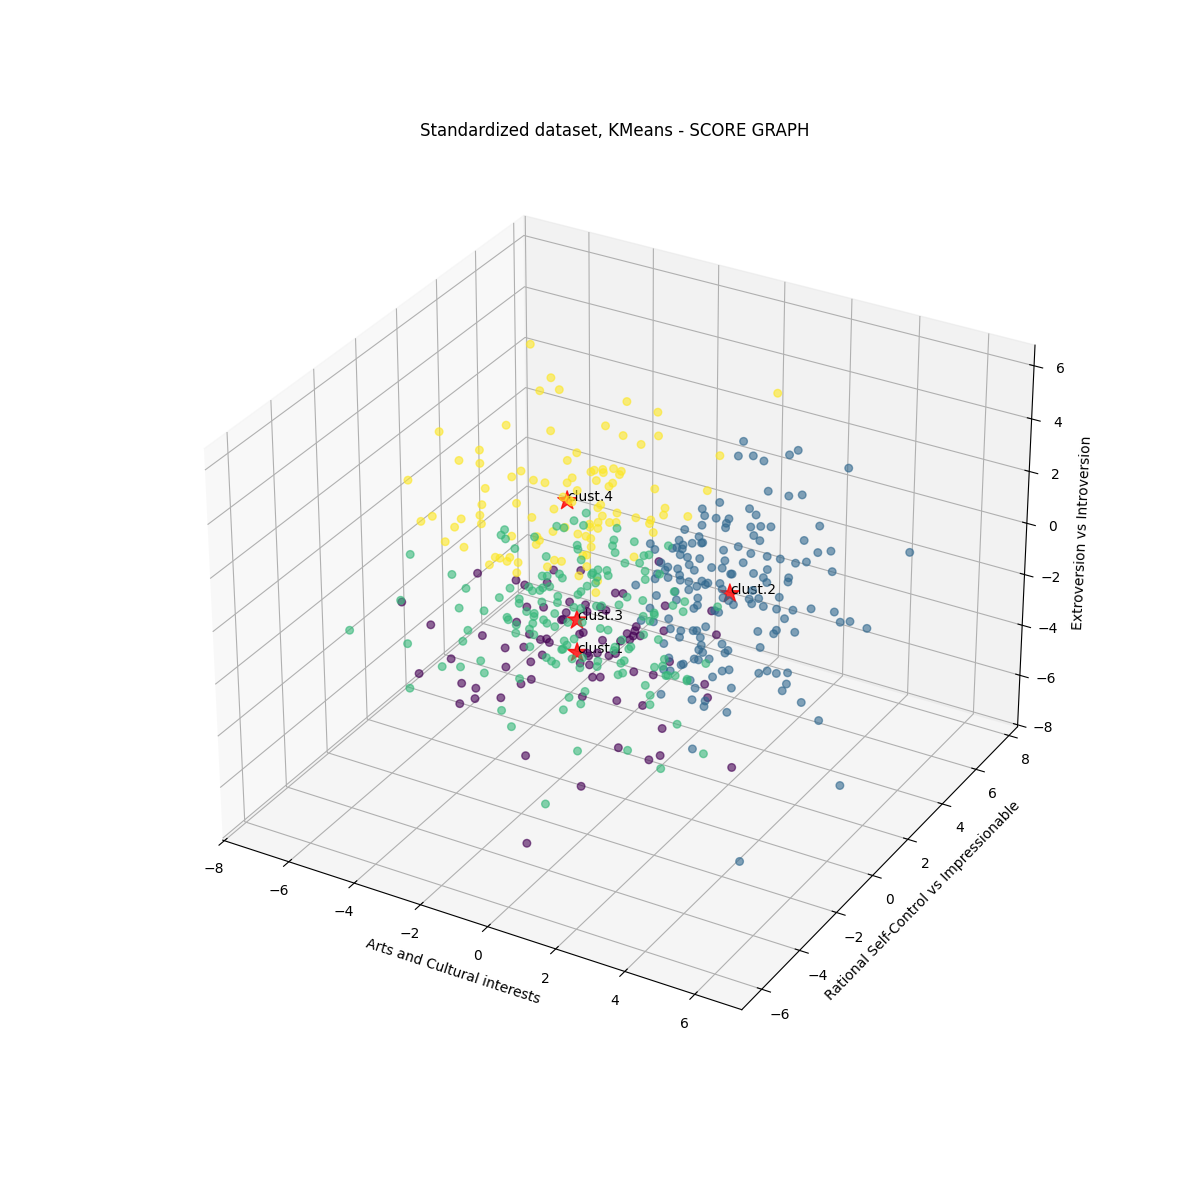

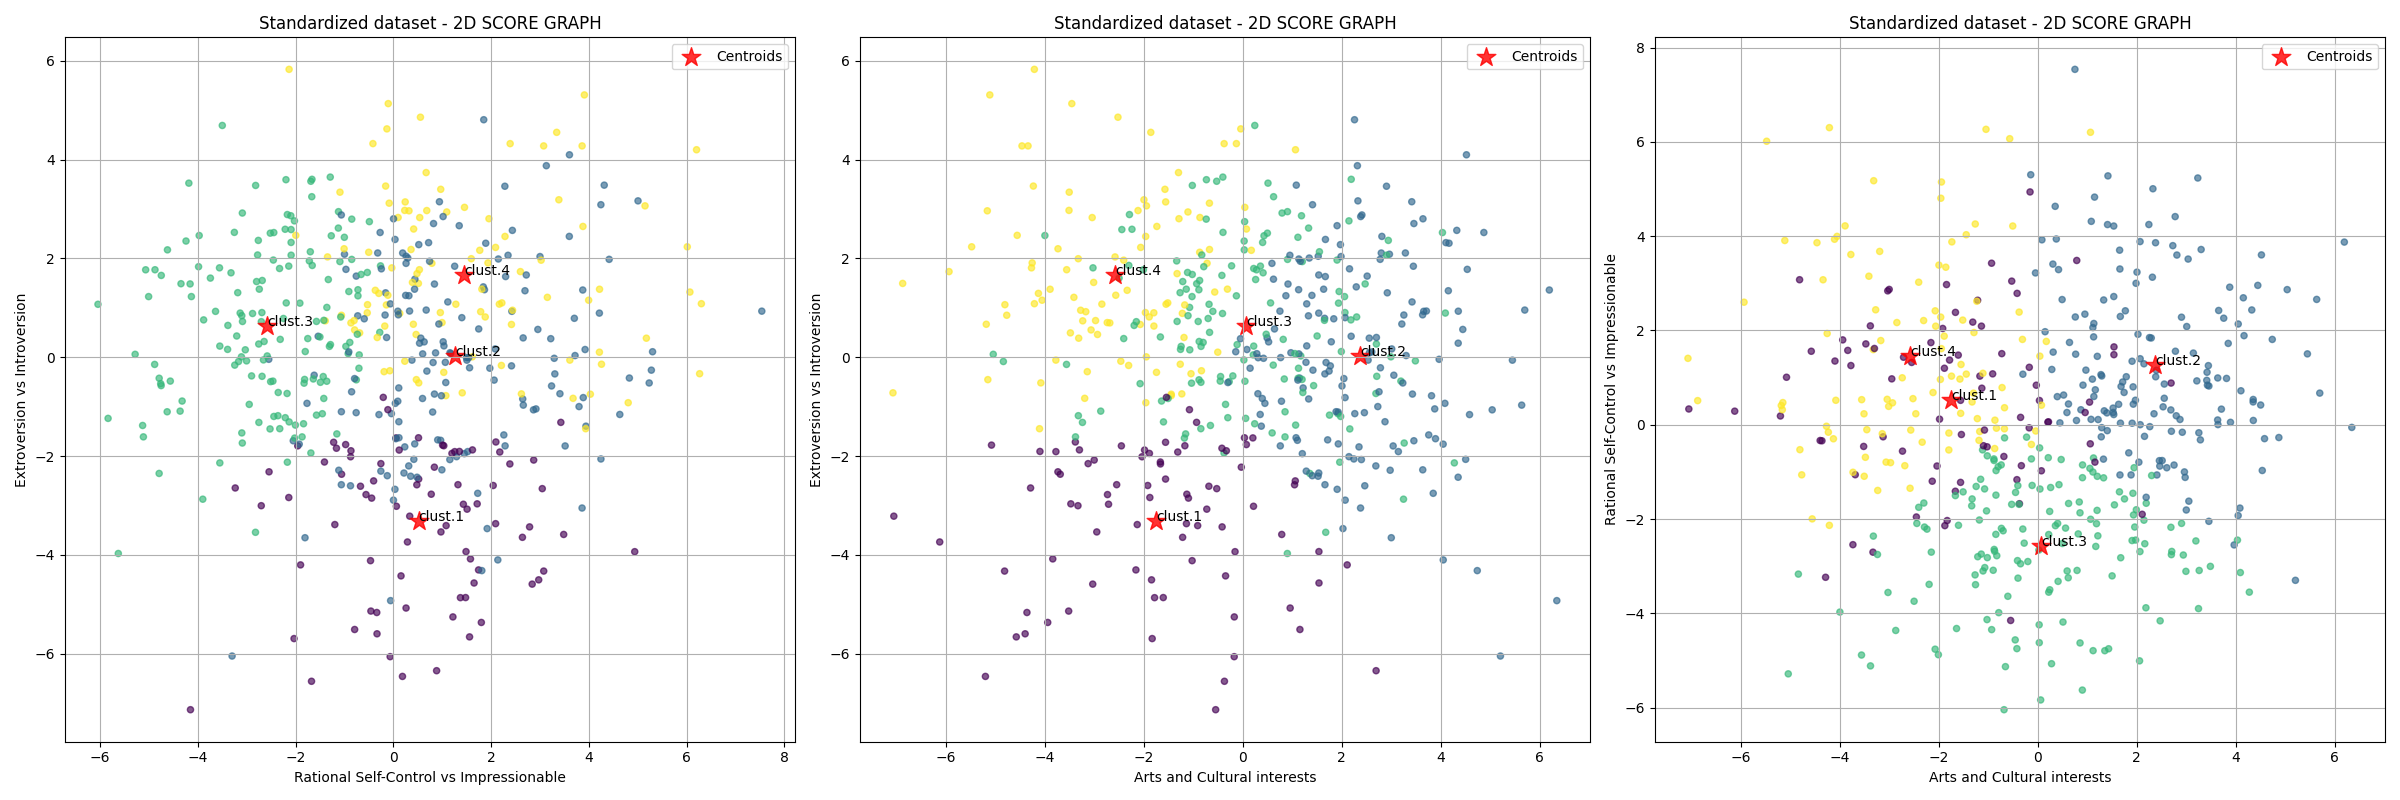

In [65]:

%matplotlib widget
plt.ion()

sg_std_k1 = plt.figure(figsize=(12, 12))
ax_sg_std_k1 = sg_std_k1.add_subplot(111, projection='3d')
ax_sg_std_k1.scatter(Y_std[:,0],Y_std[:,1],Y_std[:,2],  c=km_std.labels_, cmap='viridis', s=30, alpha=0.6)
plt.title('Standardized dataset, KMeans - SCORE GRAPH')
ax_sg_std_k1.set_xlabel(pc_std_names[0])
ax_sg_std_k1.set_ylabel(pc_std_names[1])
ax_sg_std_k1.set_zlabel(pc_std_names[2])
ax_sg_std_k1.scatter(
    km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2],
    c='red', marker='*', s=200, alpha=0.8,
    label='Centroids'
)
plt.grid()
for kk in range(k_std):
    ax_sg_std_k1.text(km_std.cluster_centers_[kk, 0], km_std.cluster_centers_[kk, 1], km_std.cluster_centers_[kk, 2], f'clust.{kk + 1}')

plt.show()
input()

fig, axs = plt.subplots(1, 3, figsize=(24, 8))


axs[0].scatter(Y_std[:, 1], Y_std[:, 2], c=km_std.labels_, cmap='viridis', s=20, alpha=0.65)
axs[0].set_title('Standardized dataset - 2D SCORE GRAPH')
axs[0].set_xlabel(pc_std_names[1])  # PC2
axs[0].set_ylabel(pc_std_names[2])  # PC3
axs[0].scatter(
    km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2],
    c='red', marker='*', s=200, alpha=0.8, label='Centroids'
)

for kk in range(k_std):
    axs[0].text(
        km_std.cluster_centers_[kk, 1], 
        km_std.cluster_centers_[kk, 2],
        f'clust.{kk + 1}'
    )

axs[0].grid(True)
axs[0].legend()


axs[1].scatter(Y_std[:, 0], Y_std[:, 2], c=km_std.labels_, cmap='viridis', s=20, alpha=0.65)
axs[1].set_title('Standardized dataset - 2D SCORE GRAPH')
axs[1].set_xlabel(pc_std_names[0])  # PC1
axs[1].set_ylabel(pc_std_names[2])  # PC3
axs[1].scatter(
    km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 2],
    c='red', marker='*', s=200, alpha=0.8, label='Centroids'
)

for kk in range(k_std):
    axs[1].text(
        km_std.cluster_centers_[kk, 0], 
        km_std.cluster_centers_[kk, 2],
        f'clust.{kk + 1}'
    )

axs[1].grid(True)
axs[1].legend()


axs[2].scatter(Y_std[:, 0], Y_std[:, 1], c=km_std.labels_, cmap='viridis', s=20, alpha=0.65)
axs[2].set_title('Standardized dataset - 2D SCORE GRAPH')
axs[2].set_xlabel(pc_std_names[0])  # PC1
axs[2].set_ylabel(pc_std_names[1])  # PC2
axs[2].scatter(
    km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1],
    c='red', marker='*', s=200, alpha=0.8, label='Centroids'
)

for kk in range(k_std):
    axs[2].text(
        km_std.cluster_centers_[kk, 0], 
        km_std.cluster_centers_[kk, 1],
        f'clust.{kk + 1}'
    )

axs[2].grid(True)
axs[2].legend()

# Aggiusta gli spazi tra i sottoplot per evitare sovrapposizioni di testi
plt.tight_layout()
plt.show()

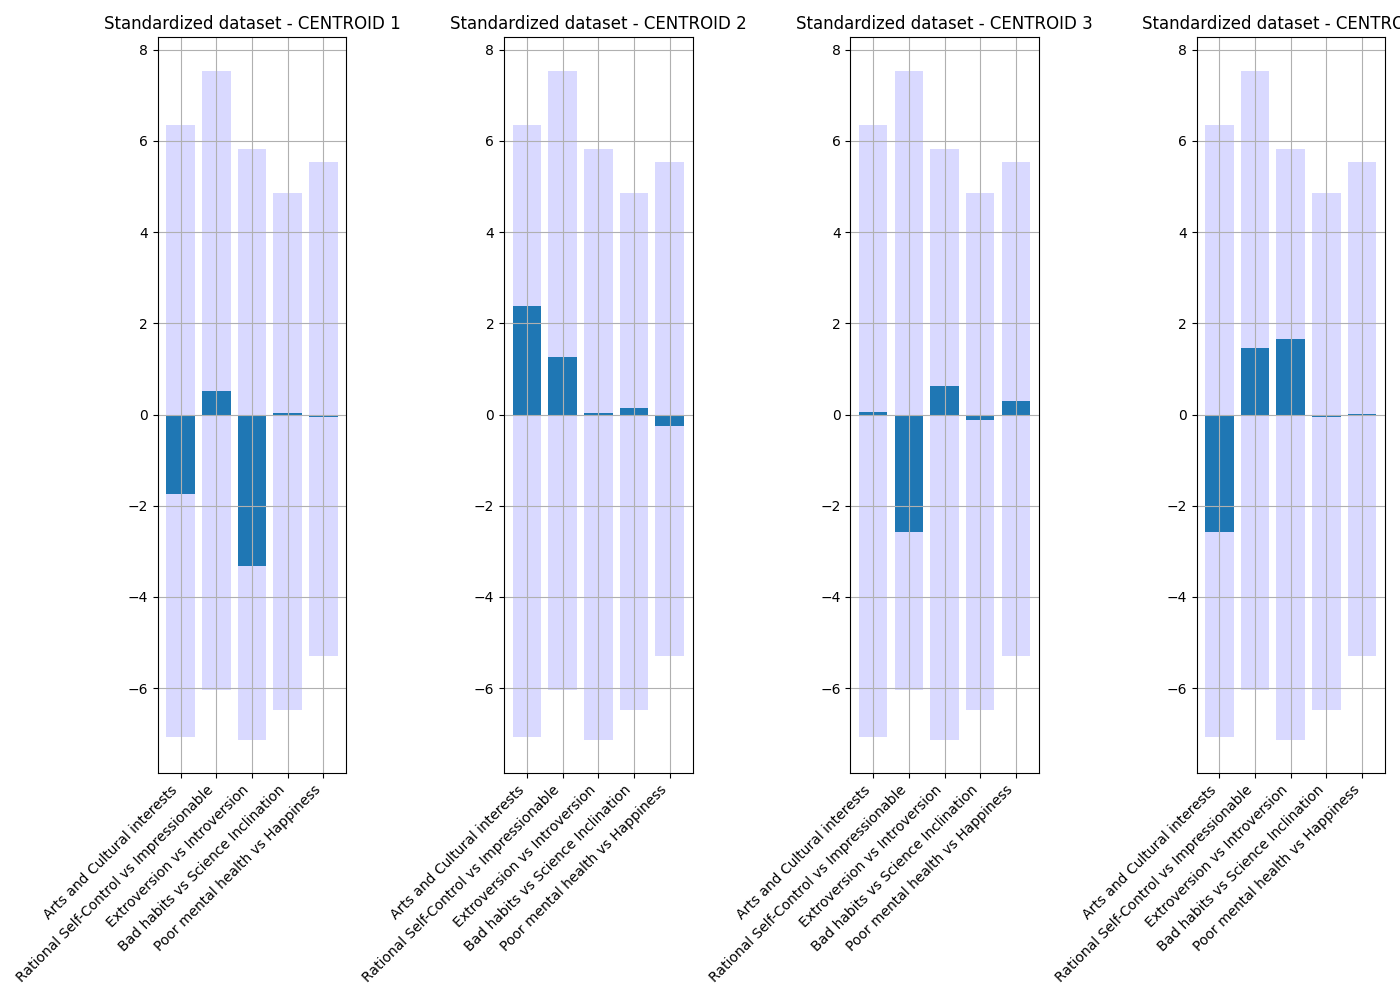

In [67]:
max_y_std = Y_std.max(axis=0)
min_y_std = Y_std.min(axis=0)


fig_centroids_std, ax_centroids_std = plt.subplots(1, 4, figsize=(14, 10))
ax_centroids_std = ax_centroids_std.flatten()

for ii in range(k_std):
    ax_centroids_std[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), max_y_std, color='blue', alpha=0.15)
    ax_centroids_std[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), min_y_std, color='blue', alpha=0.15)
    ax_centroids_std[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), km_std.cluster_centers_[ii, :])
    ax_centroids_std[ii].set_xticks(ticks=np.arange(km_std.cluster_centers_.shape[1]))
    ax_centroids_std[ii].set_xticklabels(labels= pc_std_names, rotation=45, ha='right')
    ax_centroids_std[ii].grid(visible=True, which='both')
    ax_centroids_std[ii].set_title(f'Standardized dataset - CENTROID {ii+1}')
    plt.tight_layout()



#### **Centroids/Clusters** Interpretation:
 **Cluster 1 - Introvert/NotCultured/MildlySelfControlled:** Both Centroid and points visualization leeds to consider individual belonging to this cluster as **scarcely interested in Arts and Culture**, **Introvert** and mildly **Rational and Self-Controlled**  

 **Cluster 2 - Intr&Extr/Cultured/SelfContr:** Both Centroid and points visualization leeds to consider individual belonging to this cluster as **largely interested in Arts and Culture** and **Self-Controlled** 

 **Cluster 3 - Cult&NotCu/Extrovert/Impressionable:** Both Centroid and points visualization leeds to consider individual belonging to this cluster as **largely Impressionable** and mildly **Extrovert** 

 **Cluster 4 - NotCult/Extrovert/Rational:** Both Centroid and points visualization leeds to consider individual belonging to this cluster as **scarcely interested in Arts and Culture**, **Extrovert** and **Rational and Self-Controlled** 

In [68]:
cluster_std_names = ['NotCultured/MildlySelfControlled/Introvert', 'Cultured/SelfContr/Intr&Extr', 'Cult&NotCu/Impressionable/Extrovert', 'NotCult/Rational/Extrovert']

### **Section 4.2**: k-Means with the MinMax dataset

In [69]:
#we make a comparison between results with different k

km_mm_list = []
silcoeff_mm_list = []
k_mm_list = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE k-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_mm_list)):
    print(f'****************** START k-MEANS WITH k={k_mm_list[i]} ******************')
    print('Computing...')
    km_mm_list.append(KMeans(n_clusters=k_mm_list[i], random_state = 47))
    km = km_mm_list[i]
    km.fit(Y_mm)
    silcoeff_mm_list.append(silhouette_score(Y_mm, labels = km.labels_))
    print(f'****************** END k-MEANS WITH k={k_mm_list[i]} ******************')
    print('')

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best_mm = np.argmax(silcoeff_mm_list)
k_mm = k_mm_list[i_best_std]
km_mm = km_mm_list[i_best_std]

# VISUALIZE THE RESULT
print('')
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_mm_list)} --> k = {k_mm}')
print('**************************************************************')

****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************

****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************

****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************

****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************

****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************

****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************

****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************

****************** START k-MEANS WITH k=10 ******************


NameError: name 'pc_mm_names' is not defined

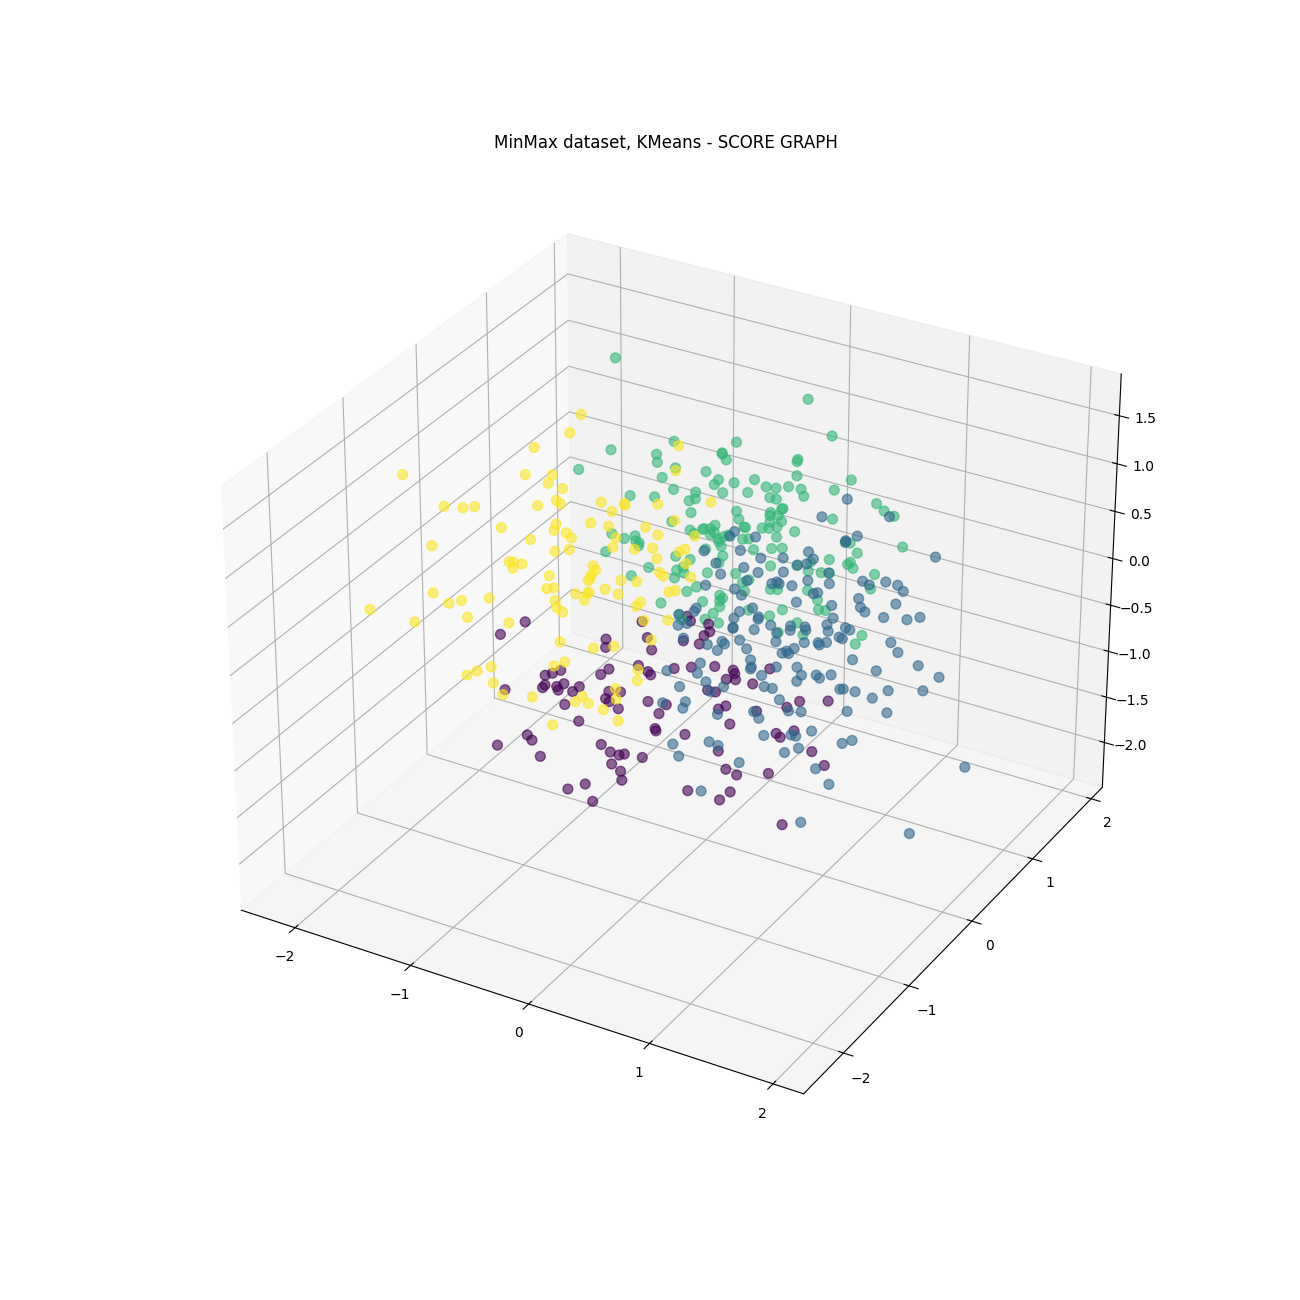

In [72]:

#%matplotlib widget
#plt.ion()

sg_mm_k1 = plt.figure(figsize=(13, 13))
ax_sg_mm_k1 = sg_mm_k1.add_subplot(111, projection='3d')
ax_sg_mm_k1.scatter(Y_mm[:,0],Y_mm[:,1],Y_mm[:,2], c=km_mm.labels_, cmap='viridis', s=50, alpha=0.6)
plt.title('MinMax dataset, KMeans - SCORE GRAPH')
ax_sg_mm_k1.set_xlabel(pc_mm_names[0])
ax_sg_mm_k1.set_ylabel(pc_mm_names[1])
ax_sg_mm_k1.set_zlabel(pc_mm_names[2])
ax_sg_mm_k1.scatter(
    km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 1], km_mm.cluster_centers_[:, 2],
    c='red', marker='*', s=200, alpha=1,
    label='Centroids'
)

plt.grid()
for kk in range(k_std):
    ax_sg_mm_k1.text(km_mm.cluster_centers_[kk, 0], km_mm.cluster_centers_[kk, 1], km_mm.cluster_centers_[kk, 2], f'clust.{kk + 1}')



plt.show()

#input()

fig, axs = plt.subplots(1, 3, figsize=(24, 8))


axs[0].scatter(Y_mm[:, 1], Y_mm[:, 2], c=km_mm.labels_, cmap='viridis', s=20, alpha=0.65)
axs[0].set_title('Standardized dataset - 2D SCORE GRAPH')
axs[0].set_xlabel(pc_mm_names[1])  # PC2
axs[0].set_ylabel(pc_mm_names[2])  # PC3
axs[0].scatter(
    km_mm.cluster_centers_[:, 1], km_mm.cluster_centers_[:, 2],
    c='red', marker='*', s=200, alpha=0.8, label='Centroids'
)

for kk in range(k_std):
    axs[0].text(
        km_mm.cluster_centers_[kk, 1], 
        km_mm.cluster_centers_[kk, 2],
        f'clust.{kk + 1}'
    )

axs[0].grid(True)
axs[0].legend()


axs[1].scatter(Y_mm[:, 0], Y_mm[:, 2], c=km_mm.labels_, cmap='viridis', s=20, alpha=0.65)
axs[1].set_title('Standardized dataset - 2D SCORE GRAPH')
axs[1].set_xlabel(pc_mm_names[0])  # PC1
axs[1].set_ylabel(pc_mm_names[2])  # PC3
axs[1].scatter(
    km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 2],
    c='red', marker='*', s=200, alpha=0.8, label='Centroids'
)

for kk in range(k_std):
    axs[1].text(
        km_mm.cluster_centers_[kk, 0], 
        km_mm.cluster_centers_[kk, 2],
        f'clust.{kk + 1}'
    )

axs[1].grid(True)
axs[1].legend()


axs[2].scatter(Y_mm[:, 0], Y_mm[:, 1], c=km_mm.labels_, cmap='viridis', s=20, alpha=0.65)
axs[2].set_title('Standardized dataset - 2D SCORE GRAPH')
axs[2].set_xlabel(pc_mm_names[0])  # PC1
axs[2].set_ylabel(pc_mm_names[1])  # PC2
axs[2].scatter(
    km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 1],
    c='red', marker='*', s=200, alpha=0.8, label='Centroids'
)

for kk in range(k_std):
    axs[2].text(
        km_mm.cluster_centers_[kk, 0], 
        km_mm.cluster_centers_[kk, 1],
        f'clust.{kk + 1}'
    )

axs[2].grid(True)
axs[2].legend()


plt.tight_layout()
plt.show()



NameError: name 'pc_mm_names' is not defined

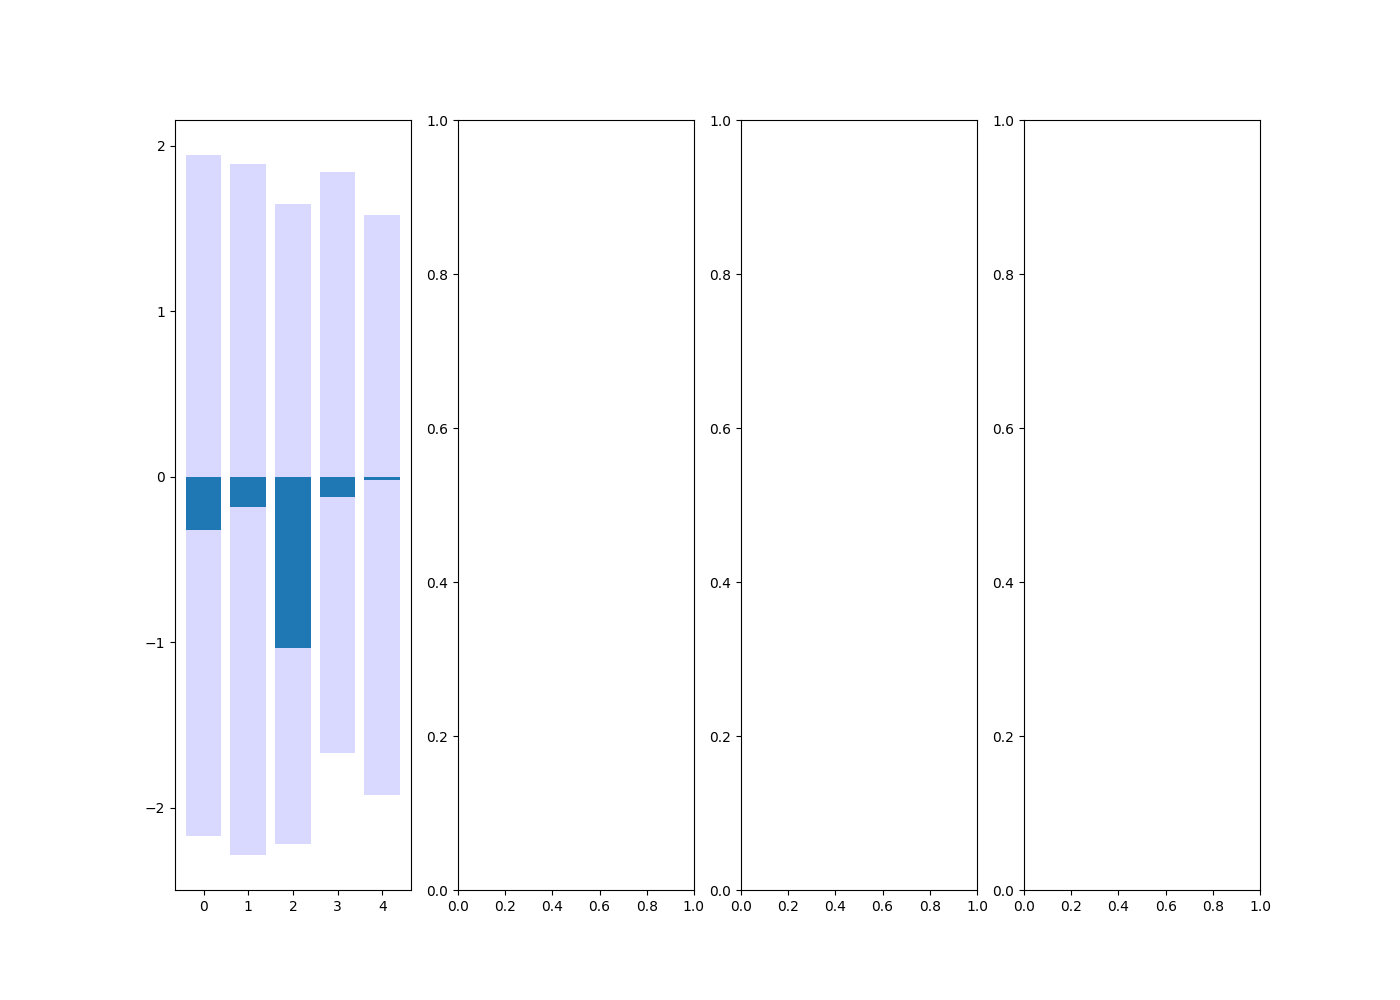

In [71]:
max_y_mm = Y_mm.max(axis=0)
min_y_mm = Y_mm.min(axis=0)


fig_centroids_mm, ax_centroids_mm = plt.subplots(1, 4, figsize=(14, 10))
ax_centroids_mm = ax_centroids_mm.flatten()

for ii in range(k_mm):
    ax_centroids_mm[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), max_y_mm, color='blue', alpha=0.15)
    ax_centroids_mm[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), min_y_mm, color='blue', alpha=0.15)
    ax_centroids_mm[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), km_mm.cluster_centers_[ii, :])
    ax_centroids_mm[ii].set_xticks(ticks=np.arange(km_mm.cluster_centers_.shape[1]))
    ax_centroids_mm[ii].set_xticklabels(labels= pc_mm_names, rotation=45, ha = 'right')
    ax_centroids_mm[ii].grid(visible=True, which='both')
    ax_centroids_mm[ii].set_title(f'MinMax dataset - CENTROID {ii+1}')
    plt.tight_layout()

#### **Centroids/Clusters** Interpretation:
 **Cluster 1 - NotCultured/MildlyRational/NotProactive:** Both Centroid and points visualization leeds to consider individual belonging to this cluster as **scarcely interested in Arts and Culture**, **not Proactive** and mildly **Rational and Self-Controlled**  

 **Cluster 2 - Cultured/MildlyRational/MildlyProactive:** Both Centroid and points visualization leeds to consider individual belonging to this cluster as **largely interested in Arts and Culture** and **Rational/Alternative** 

 **Cluster 3 - MildlyNotCult/Impressionable/MildlyProactive:** Both Centroid and points visualization leeds to consider individual belonging to this cluster as **largely Impressionable** and mildly **Proactive** and interested to **Culture**

 **Cluster 4 - NotCult/Rational/Proactive:** Both Centroid and points visualization leeds to consider individual belonging to this cluster as **scarcely interested in Arts and Culture**, **Rational** and **Proactive** 

In [73]:
cluster_mm_names = ['NotCultured/MildlyRational/NotProactive', 'Cultured/MildlyRational/MildlyProactive', 'MildlyNotCult/Impressionable/MildlyProactive', 'NotCult/Rational/Proactive']

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**.

### **Section 5.1: External evaluation of the Standardized dataset**

#### As we saw in the 2D Score Plots, often one single lable is not explicative of the records distribution since the characteristics of an individual considered in the dataset are many and almost each one is significative. Fortunately also the Lables where assorted, so we thought about exploring the possibility of composing more complex and meaningfull lables just assembilng the simple ones.  We start with an analisys of the clustering using the simple lables, then we analize compare the clusterings obtained with a CompleX Lable that takes into account: 
#### - Age: The age interval has been discretized to Young (<= 19) and Older (>= 20). This choice aligned to the distribution of the labels (19 is the mean value) and the information considered in the analisys regarding the education.
#### - Education: The label has been partitioned in two groups, one with people that attended university and an other with people that didn't.
#### - Gender.
#### - Other Simple lables have been added to the Complex label like 'Onli Child' or 'Town' but despite adding more complexity did not really add much meaning.
---
#### **Adjusted Rand Index:** The Adjusted Rand Index (ARI) is a statistical measure used to evaluate the similarity between two data clusterings, correcting for chance agreement. It quantifies the alignment of clustering results by comparing the number of pairwise agreements and disagreements. ARI ranges from -1 (no similarity) to 1 (perfect agreement), where 0 indicates random labeling. We used it to have also a quantitative measure of the clusters quality.

In [74]:
resp_filt
variables_by_type["Demographics"]

from sklearn.metrics import (
    adjusted_rand_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)

"""     resp_filt["Age"].loc[~mask]
    (km_mm.labels_)[~mask] """


for labeling in variables_by_type["Demographics"]:

    mask = resp_filt[labeling].isna()

    ari = adjusted_rand_score(resp_filt[labeling].loc[~mask], (km_std.labels_)[~mask])

    # 2. Homogeneity Score
    homogeneity = homogeneity_score(resp_filt[labeling].loc[~mask], (km_std.labels_)[~mask])

    # 3. Completeness Score
    completeness = completeness_score(resp_filt[labeling].loc[~mask], (km_std.labels_)[~mask])

    # 4. V-Measure
    v_measure = v_measure_score(resp_filt[labeling].loc[~mask], (km_std.labels_)[~mask])

    # Print the external evaluation metrics

    print(labeling)
    print("External Evaluation Metrics:")
    print(f"Adjusted Rand Index: {ari:.3f}")
    print(f"Homogeneity Score:  {homogeneity:.3f}")
    print(f"Completeness Score: {completeness:.3f}")
    print(f"V-Measure:          {v_measure:.3f}")
    print(f"-----------------------------------")



Age
External Evaluation Metrics:
Adjusted Rand Index: -0.000
Homogeneity Score:  0.024
Completeness Score: 0.041
V-Measure:          0.030
-----------------------------------
Height
External Evaluation Metrics:
Adjusted Rand Index: 0.009
Homogeneity Score:  0.066
Completeness Score: 0.171
V-Measure:          0.096
-----------------------------------
Weight
External Evaluation Metrics:
Adjusted Rand Index: 0.009
Homogeneity Score:  0.084
Completeness Score: 0.231
V-Measure:          0.123
-----------------------------------
Number of siblings
External Evaluation Metrics:
Adjusted Rand Index: 0.005
Homogeneity Score:  0.035
Completeness Score: 0.032
V-Measure:          0.033
-----------------------------------
Gender
External Evaluation Metrics:
Adjusted Rand Index: 0.130
Homogeneity Score:  0.200
Completeness Score: 0.100
V-Measure:          0.133
-----------------------------------
Hand
External Evaluation Metrics:
Adjusted Rand Index: -0.001
Homogeneity Score:  0.002
Completeness Scor

In [75]:


for labeling in variables_by_type["Demographics"]:

    mask = resp_filt[labeling].isna()

    ari = adjusted_rand_score(resp_filt[labeling].loc[~mask], (km_mm.labels_)[~mask])

    # 2. Homogeneity Score
    homogeneity = homogeneity_score(resp_filt[labeling].loc[~mask], (km_mm.labels_)[~mask])

    # 3. Completeness Score
    completeness = completeness_score(resp_filt[labeling].loc[~mask], (km_mm.labels_)[~mask])

    # 4. V-Measure
    v_measure = v_measure_score(resp_filt[labeling].loc[~mask], (km_mm.labels_)[~mask])

    # Print the external evaluation metrics

    print(labeling)
    print("External Evaluation Metrics:")
    print(f"Adjusted Rand Index: {ari:.3f}")
    print(f"Homogeneity Score:  {homogeneity:.3f}")
    print(f"Completeness Score: {completeness:.3f}")
    print(f"V-Measure:          {v_measure:.3f}")
    print(f"-----------------------------------")


Age
External Evaluation Metrics:
Adjusted Rand Index: 0.001
Homogeneity Score:  0.019
Completeness Score: 0.032
V-Measure:          0.024
-----------------------------------
Height
External Evaluation Metrics:
Adjusted Rand Index: 0.013
Homogeneity Score:  0.071
Completeness Score: 0.179
V-Measure:          0.101
-----------------------------------
Weight
External Evaluation Metrics:
Adjusted Rand Index: 0.006
Homogeneity Score:  0.073
Completeness Score: 0.198
V-Measure:          0.107
-----------------------------------
Number of siblings
External Evaluation Metrics:
Adjusted Rand Index: 0.003
Homogeneity Score:  0.031
Completeness Score: 0.028
V-Measure:          0.029
-----------------------------------
Gender
External Evaluation Metrics:
Adjusted Rand Index: 0.137
Homogeneity Score:  0.213
Completeness Score: 0.105
V-Measure:          0.140
-----------------------------------
Hand
External Evaluation Metrics:
Adjusted Rand Index: -0.005
Homogeneity Score:  0.023
Completeness Score


--- External Evaluation with Gender ---
Adjusted Rand Index (ARI): 0.130

--- External Evaluation with UnivAttended ---
Adjusted Rand Index (ARI): 0.003

--- External Evaluation with ComplexLabel_NoGender ---
Adjusted Rand Index (ARI): 0.003

--- External Evaluation with ComplexLabel_WithGender ---
Adjusted Rand Index (ARI): 0.070


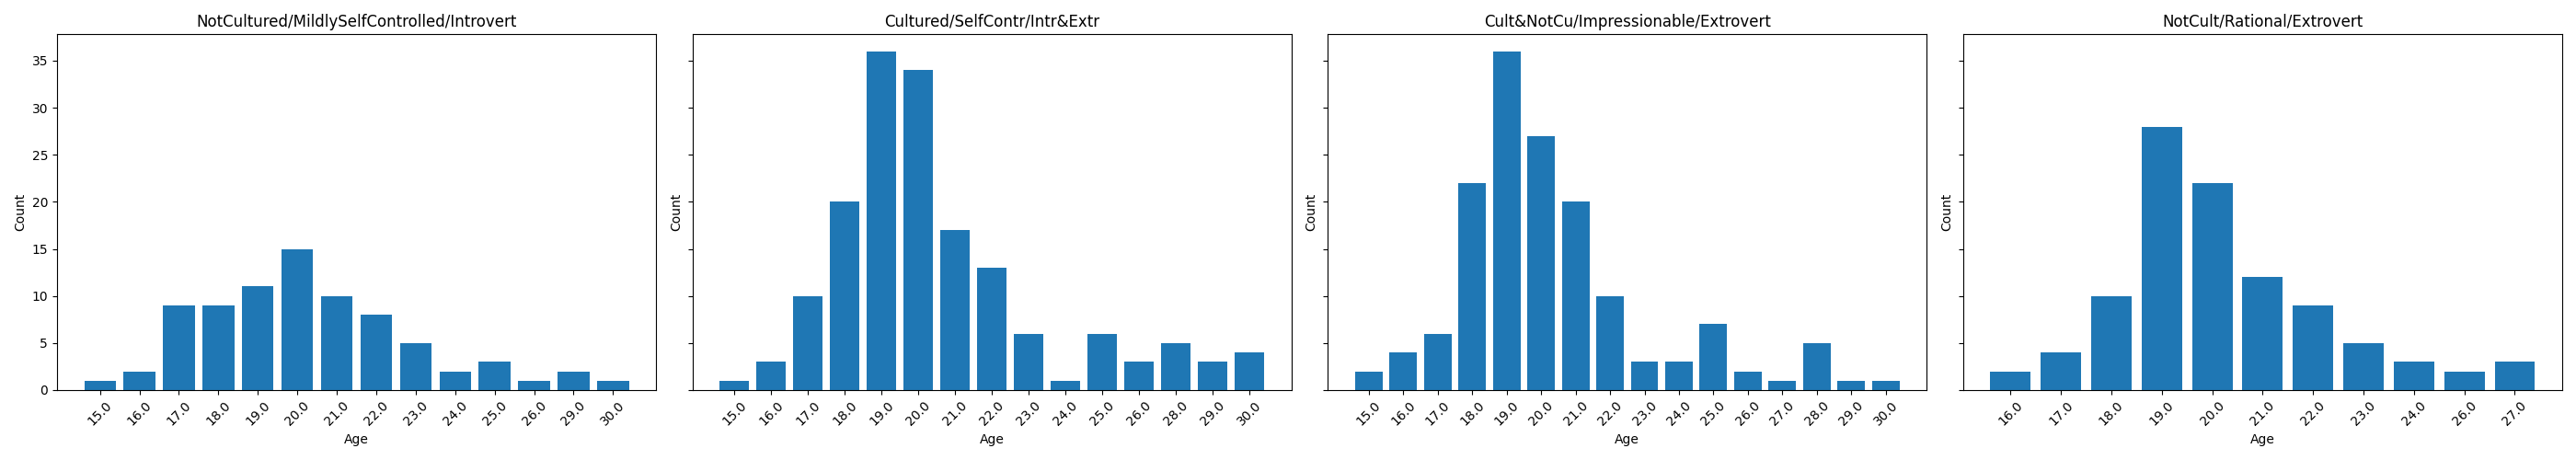

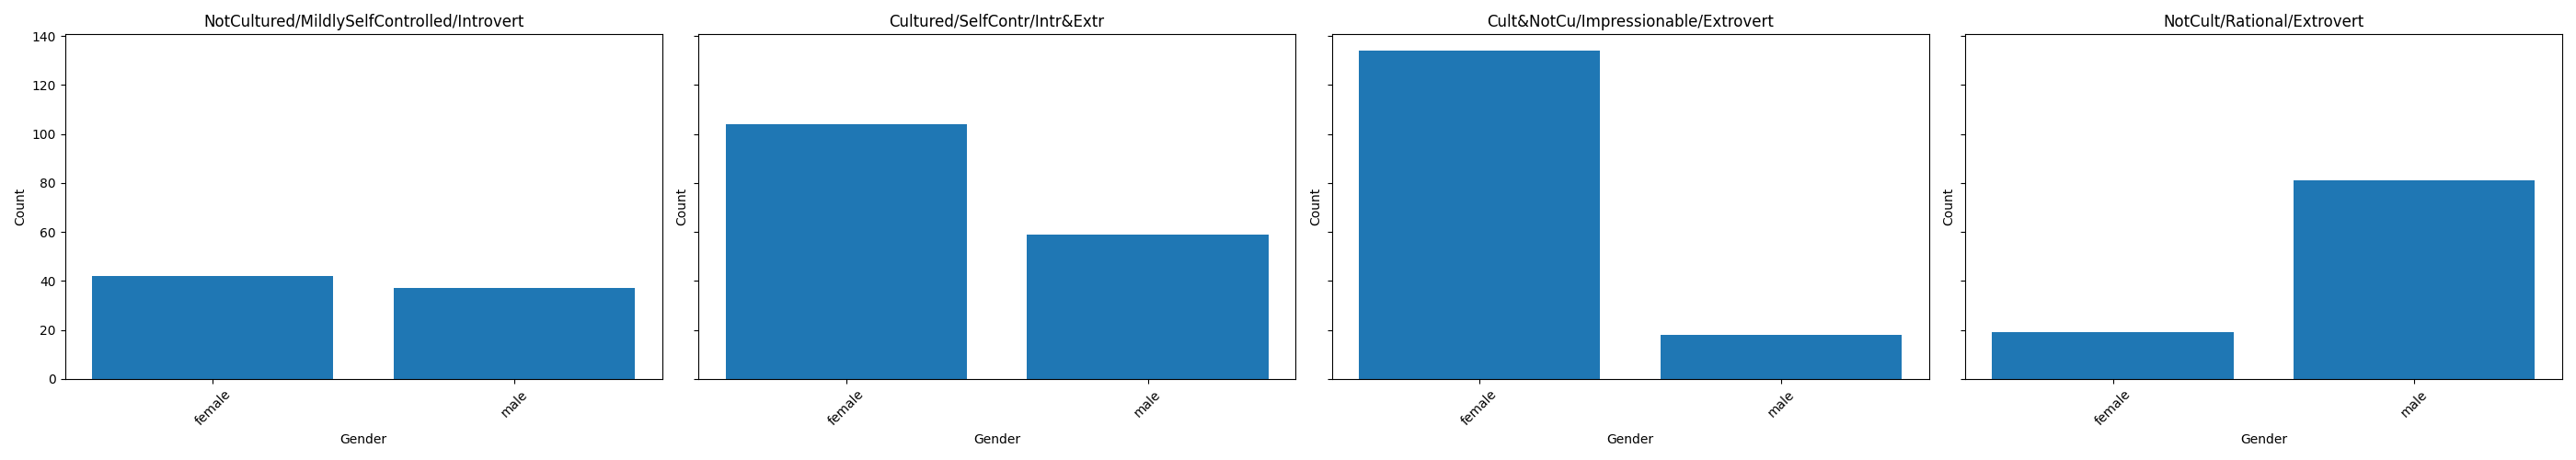

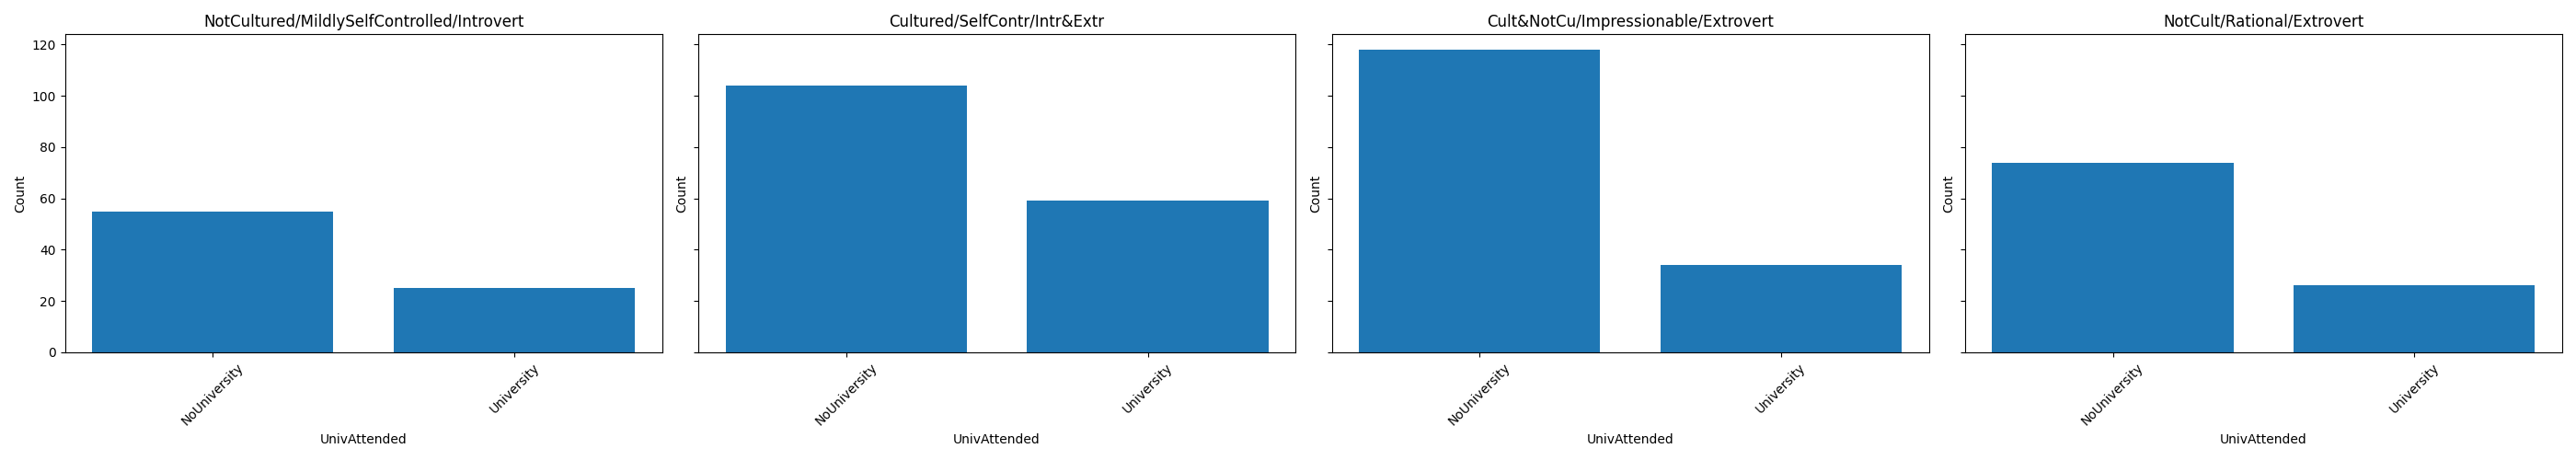

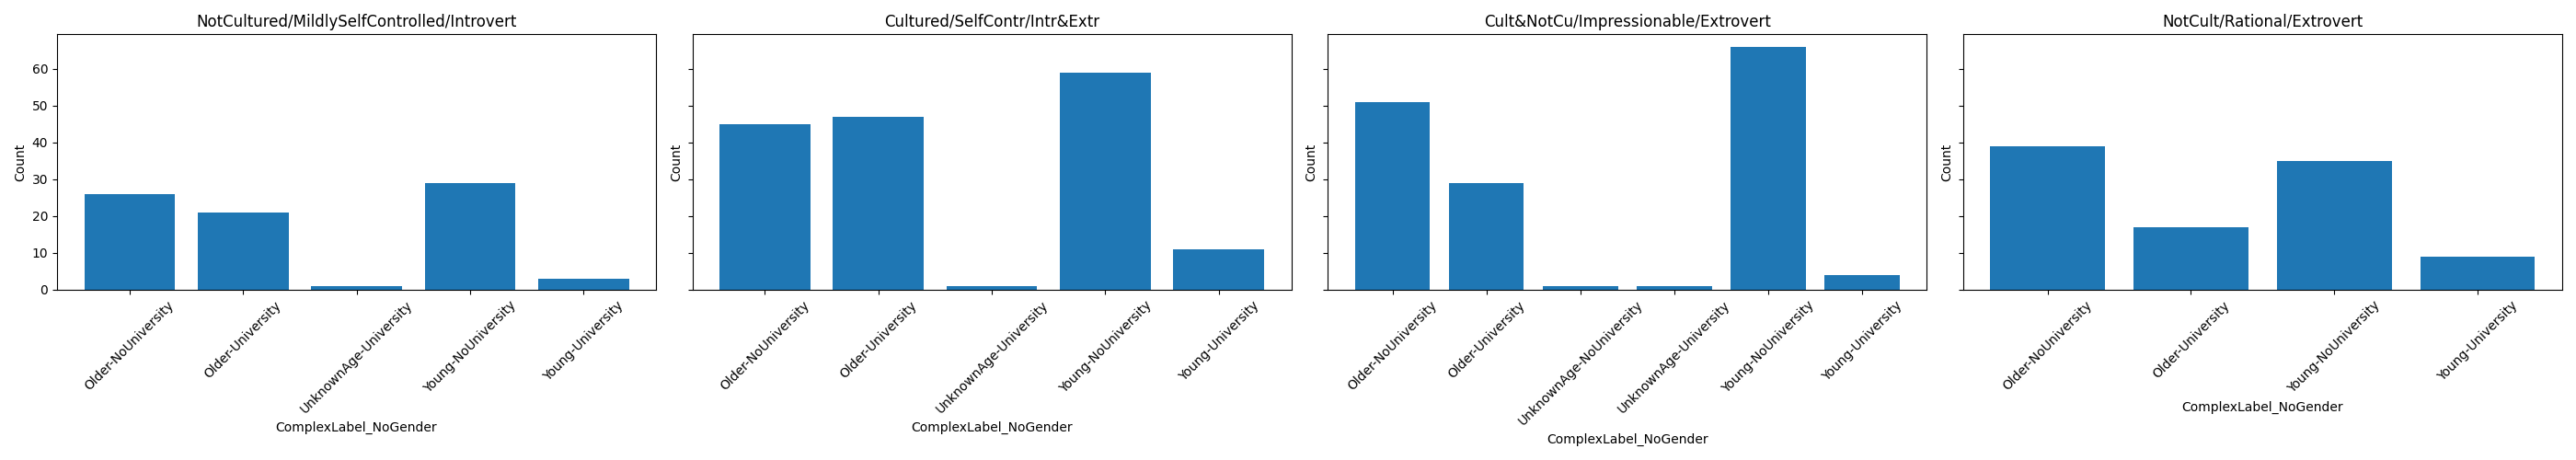

C:\Users\fabio\AppData\Local\Temp\ipykernel_14876\3304634041.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=1, ncols=num_clusters, figsize=(7 * num_clusters, 5), sharey=True)


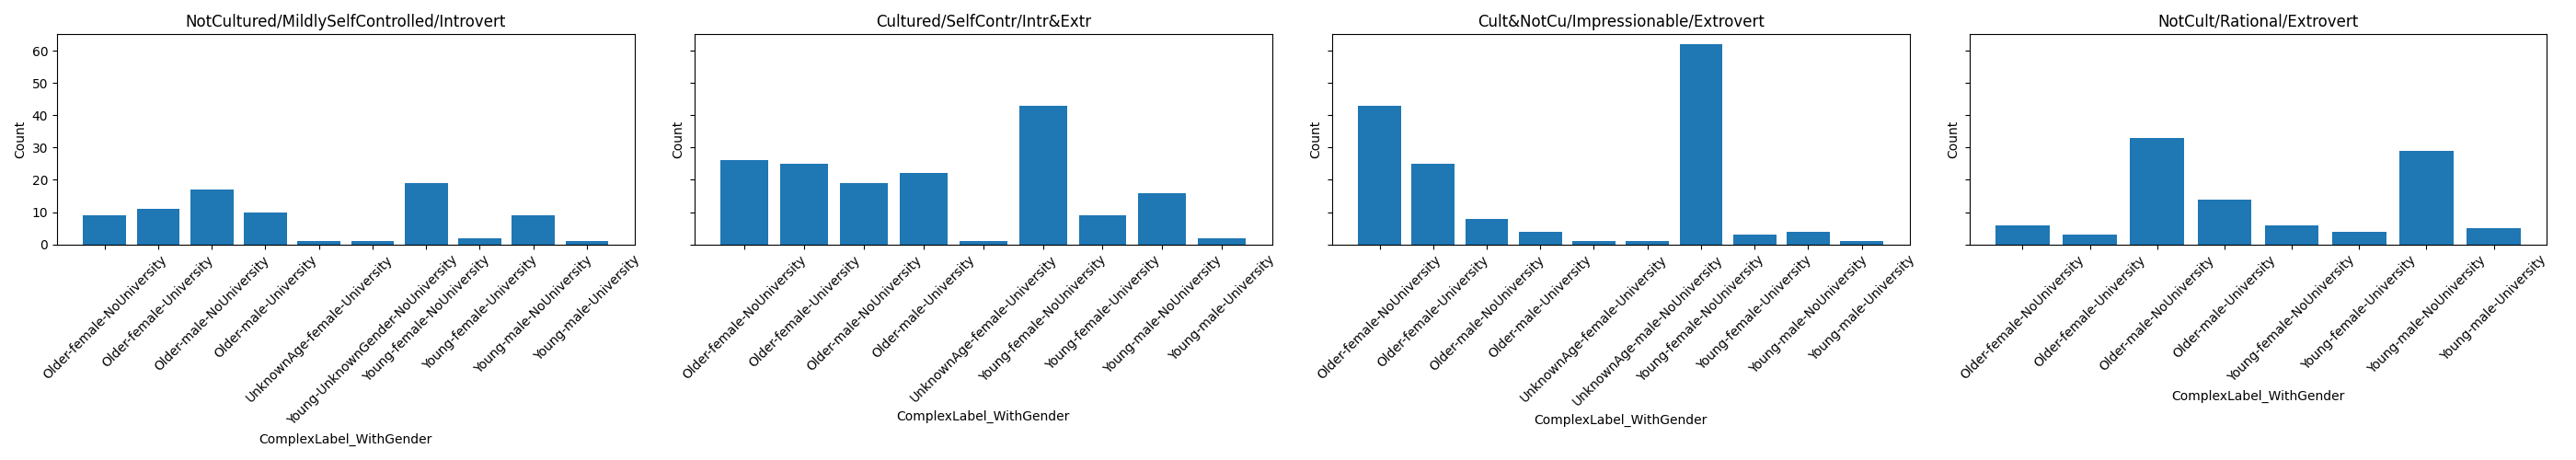


--- External Evaluation with Gender ---
Adjusted Rand Index (ARI): 0.137

--- External Evaluation with UnivAttended ---
Adjusted Rand Index (ARI): 0.002

--- External Evaluation with ComplexLabel_NoGender ---
Adjusted Rand Index (ARI): 0.002

--- External Evaluation with ComplexLabel_WithGender ---
Adjusted Rand Index (ARI): 0.071


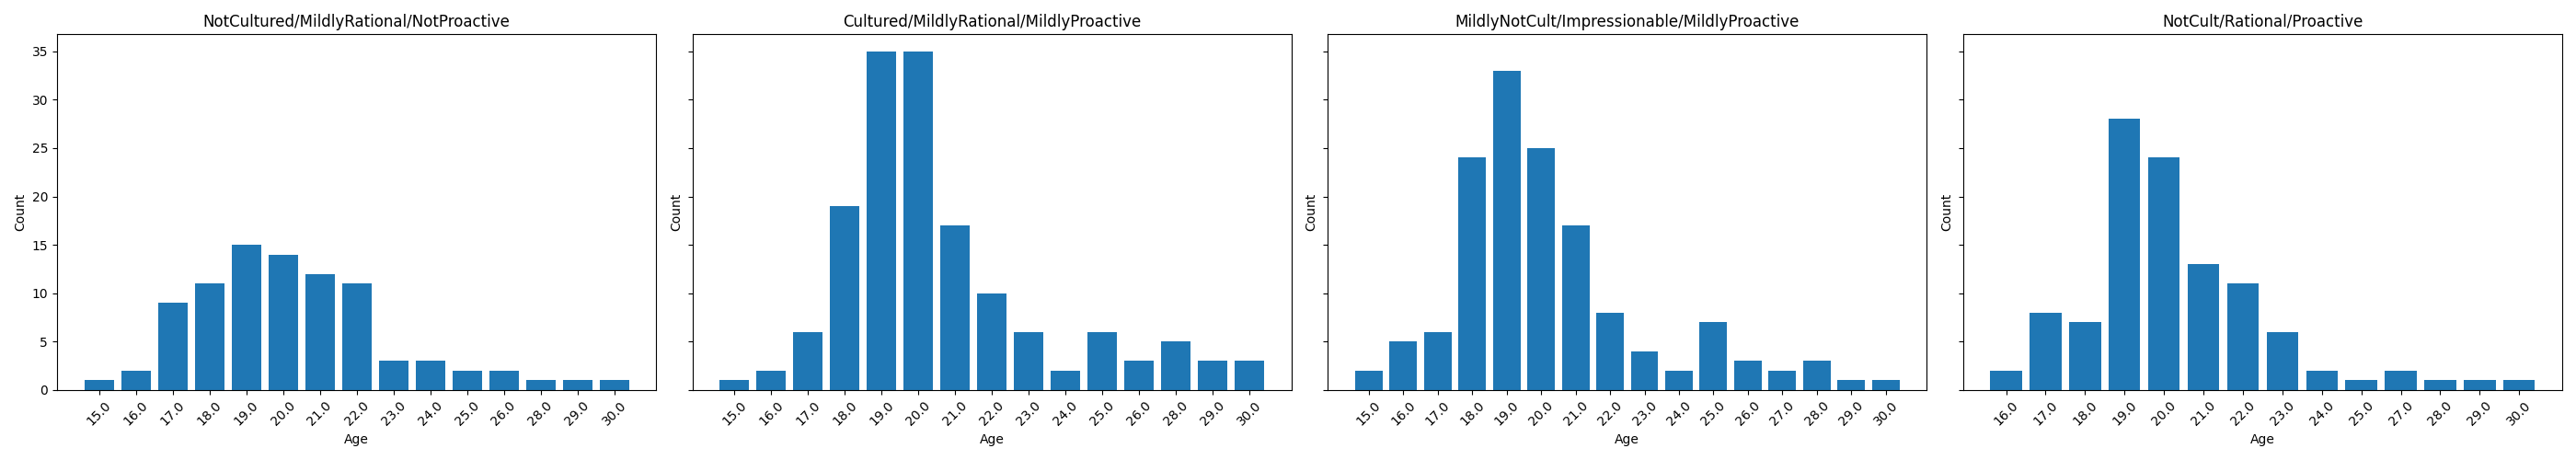

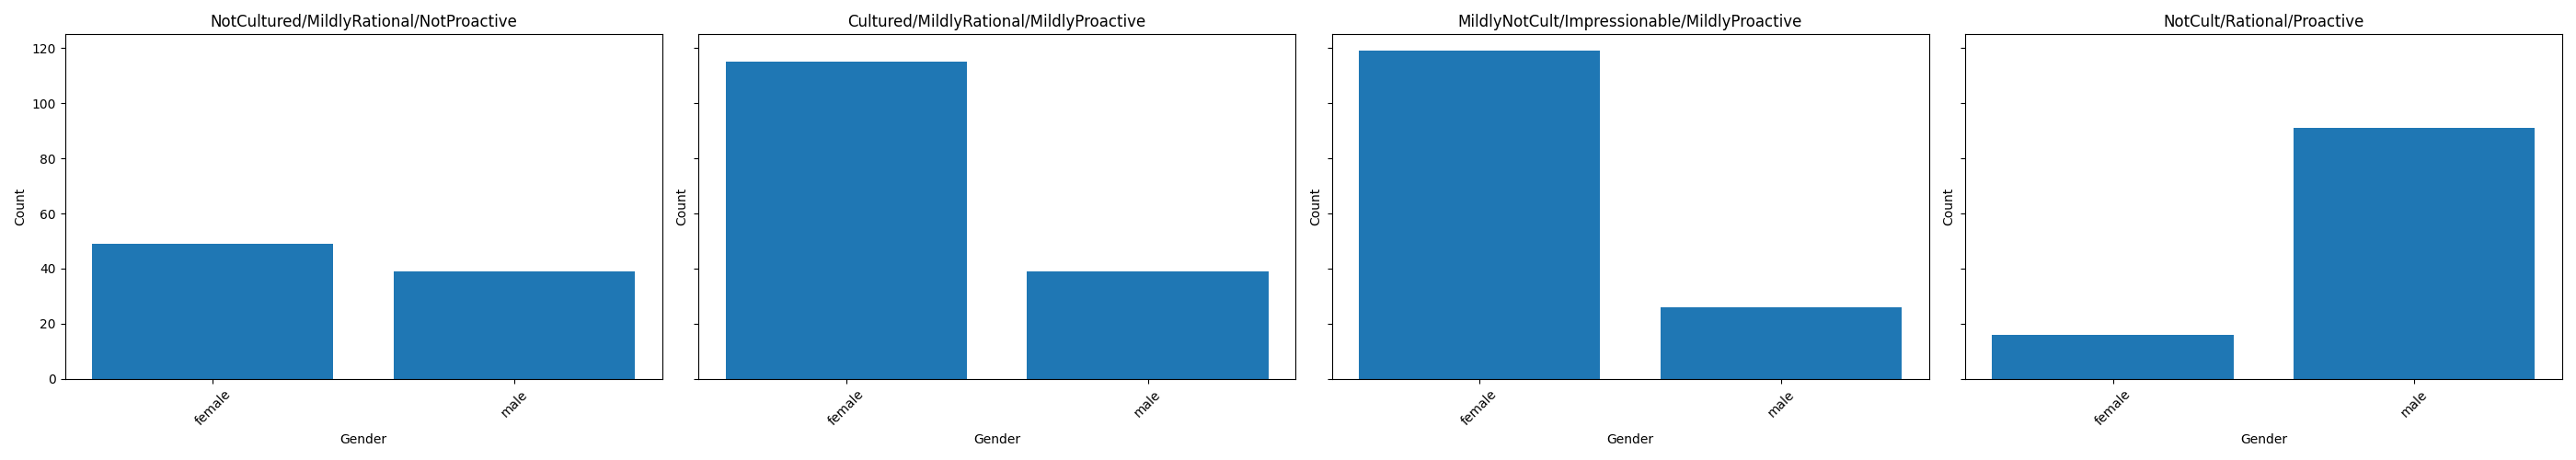

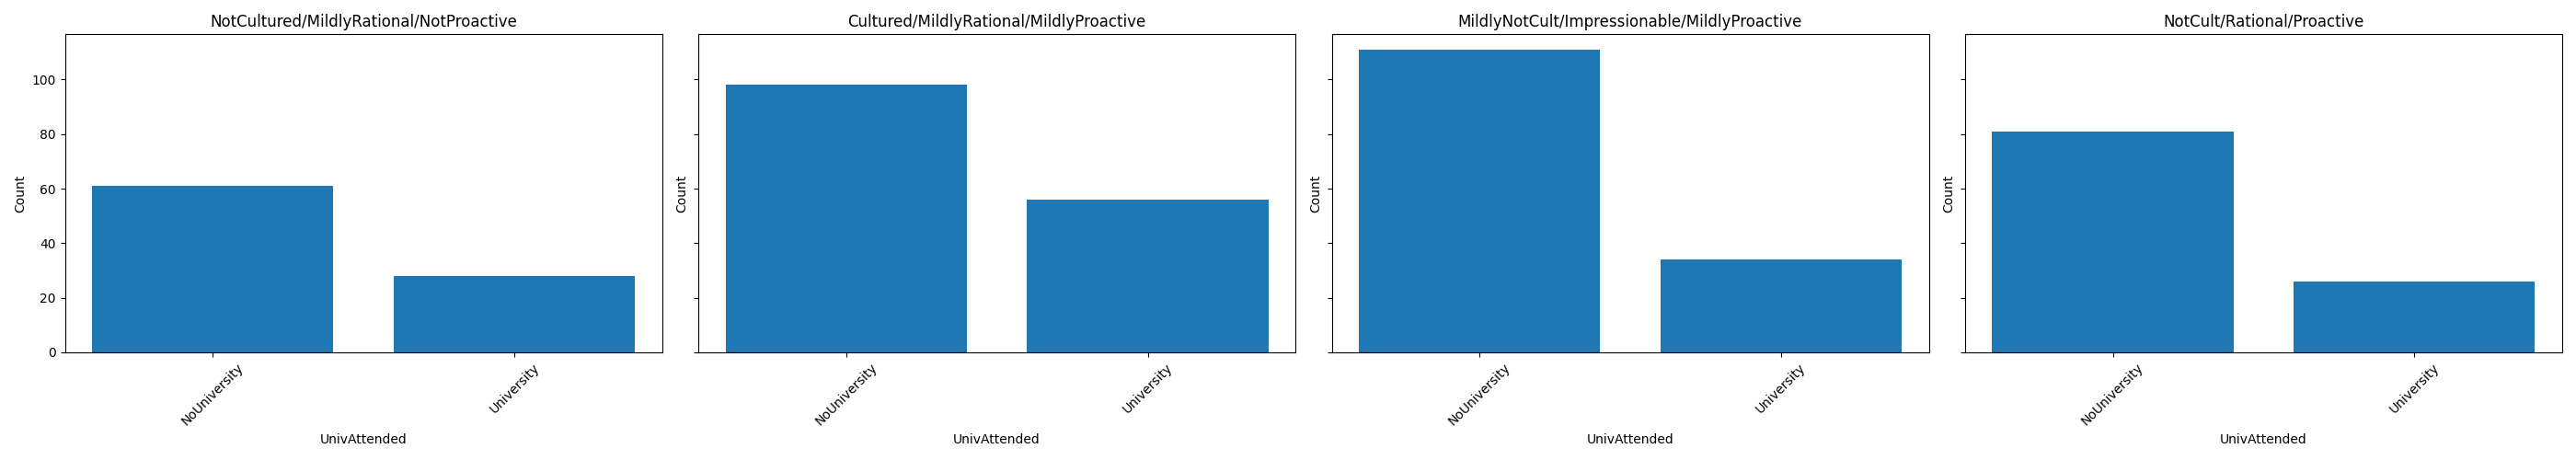

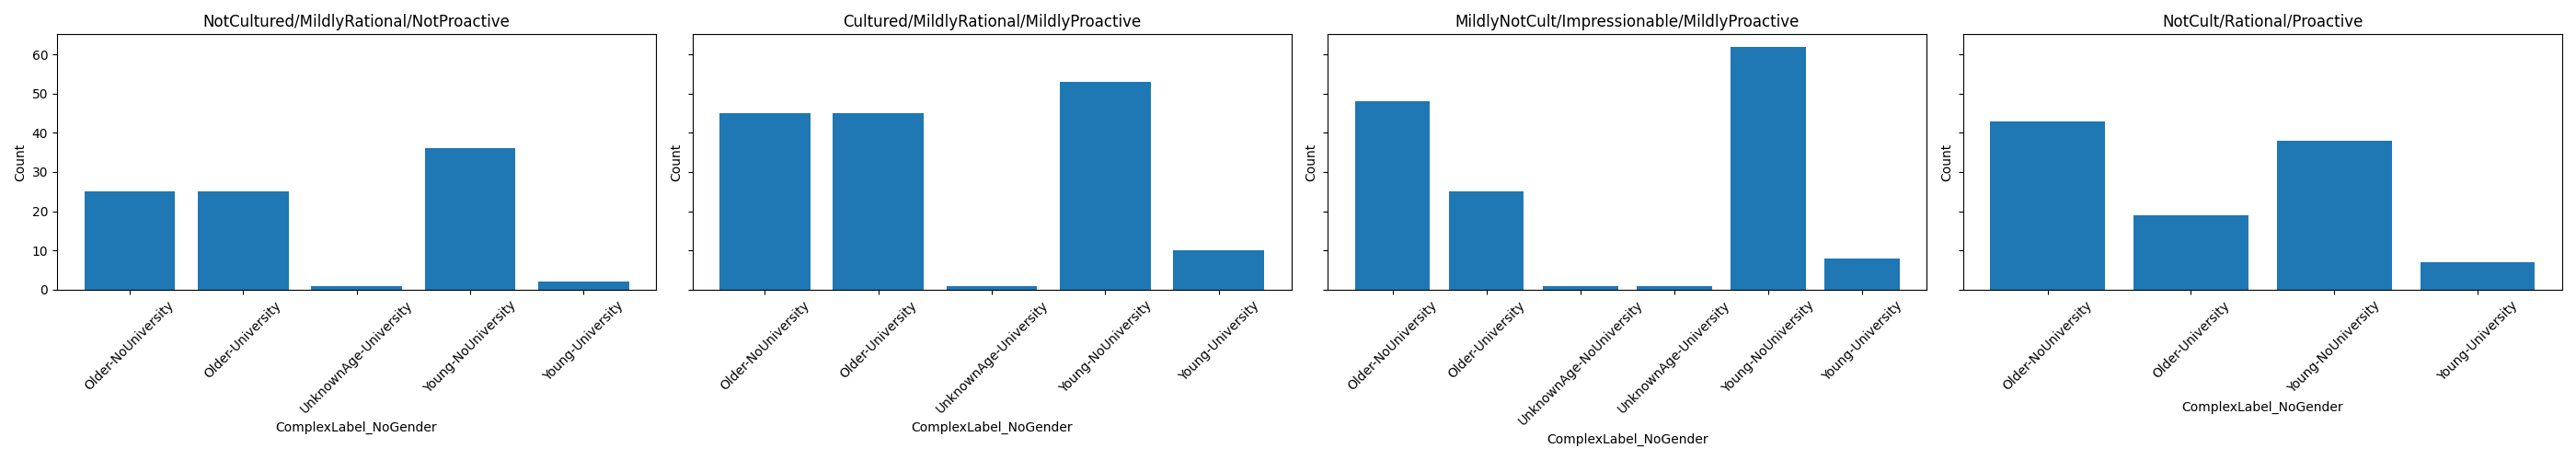

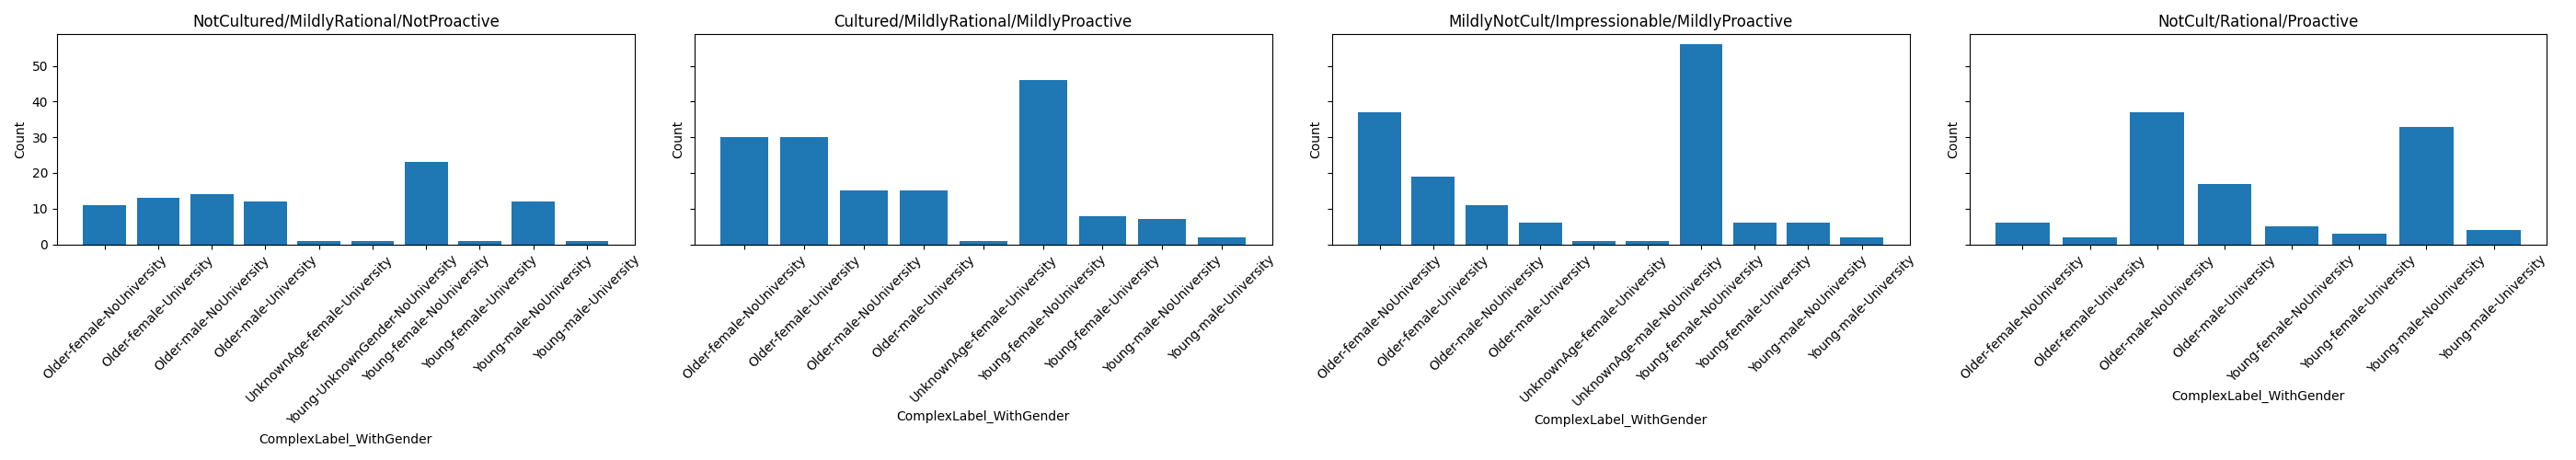

In [76]:


#Functions to create new labels
#  
def attended_university(edu_str):
    """
    Returns 'University' if the education string corresponds to
    any post-secondary or university-level degree,
    otherwise 'NoUniversity'.
    """
    if pd.isna(edu_str):
        return 'UnknownUniv'
    
    uni_levels = {
        'college/bachelor degree',
        'masters degree',
        'doctorate degree'
        # aggiungi/rimuovi altri gradi di istruzione come necessario
    }
    return 'University' if edu_str in uni_levels else 'NoUniversity'

def only_child(only_str):
    """
    Returns 'Only' if the guy is only child.
    """
    if only_str == 'yes':
        return 'OnlyC'
    
    if only_str == 'no':
        return 'NotOnlyC'
    else:
        return 'UnkC'
    
                   
    return 'University' if edu_str in uni_levels else 'NoUniversity'

def age_group(age):
    """
    Groups 'Age' into categories.
    Customize the boundaries or labels as needed.
    """
    if pd.isna(age):
        return 'UnknownAge'
    if age <= 19:
        return 'Young'
    elif 20 <= age:
        return 'Older'
    else:
        return 'UnknownAge'  # nel caso servisse una categoria ulteriore

def create_complex_label_with_gender(row):
    """
    Creates a label: "<AgeGroup>-<Gender>-<UnivAttended>"
    Example: "Young-male-NoUniversity"
    """
    if pd.isna(row['Gender']):
        gender_label = 'UnknownGender'
    else:
        gender_label = row['Gender']  # 'male', 'female', ecc.
    #return f"{row['AgeGroup']}-{gender_label}-{row['UnivAttended']}-{row['OnlyCh']}"
    return f"{row['AgeGroup']}-{gender_label}-{row['UnivAttended']}"

def create_complex_label_no_gender(row):
    """
    Creates a label: "<AgeGroup>-<UnivAttended>"
    Example: "Young-NoUniversity"
    """
    #return f"{row['AgeGroup']}-{row['UnivAttended']}-{row['OnlyCh']}"
    return f"{row['AgeGroup']}-{row['UnivAttended']}"


# To plot the label distribution by cluster

def plot_label_distribution_per_cluster(df, cluster_labels, label_col_name, cluster_names):
    temp_df = pd.DataFrame({
        'cluster': cluster_labels,
        'label': df[label_col_name]
    })

    group_data = (
        temp_df
        .groupby(['cluster', 'label'])
        .size()
        .reset_index(name='count')
    )

    unique_clusters = group_data['cluster'].unique()
    num_clusters = len(unique_clusters)

    # Create subplots for all clusters
    fig, axes = plt.subplots(nrows=1, ncols=num_clusters, figsize=(7 * num_clusters, 5), sharey=True)
    if num_clusters == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one subplot

    for idx, c in enumerate(unique_clusters):
        cluster_subset = group_data[group_data['cluster'] == c]

        ax = axes[idx]
        ax.bar(cluster_subset['label'].astype(str), cluster_subset['count'])
        ax.set_title(cluster_names[c])
        ax.set_xlabel(label_col_name)
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=45)


    plt.tight_layout()
    plt.show()


# Creating the complex labels and adding them to main DataFrame

resp_filt['UnivAttended'] = resp_filt['Education'].apply(attended_university)
resp_filt['AgeGroup'] = resp_filt['Age'].apply(age_group)
resp_filt['ComplexLabel_WithGender'] = resp_filt.apply(create_complex_label_with_gender, axis=1)
resp_filt['ComplexLabel_NoGender'] = resp_filt.apply(create_complex_label_no_gender, axis=1)

#print("\nFinal DataFrame:\n")
#print(resp_filt.head())


for [cluster_labels, cluster_names] in [[km_std.labels_, cluster_std_names], [km_mm.labels_, cluster_mm_names]]:

    #Computing the Adjusted Rand Index


    mask_dg = resp_filt['Gender'].str.contains('Unknown', na=True)
    ari_dg = adjusted_rand_score(resp_filt['Gender'][~mask_dg],
                                 cluster_labels[~mask_dg])
    print("\n--- External Evaluation with Gender ---")
    print(f"Adjusted Rand Index (ARI): {ari_dg:.3f}")

    mask_un = resp_filt['UnivAttended'].str.contains('Unknown', na=True)
    ari_un = adjusted_rand_score(resp_filt['UnivAttended'][~mask_un],
                                 cluster_labels[~mask_un])
    print("\n--- External Evaluation with UnivAttended ---")
    print(f"Adjusted Rand Index (ARI): {ari_un:.3f}")
    
    
    # Handling the Missing values in the labels by discarding the record
    mask_ng = resp_filt['ComplexLabel_NoGender'].str.contains('Unknown', na=True)
    ari_ng = adjusted_rand_score(resp_filt['ComplexLabel_NoGender'][~mask_ng],
                                 cluster_labels[~mask_ng])
    print("\n--- External Evaluation with ComplexLabel_NoGender ---")
    print(f"Adjusted Rand Index (ARI): {ari_ng:.3f}")

    mask_wg = resp_filt['ComplexLabel_WithGender'].str.contains('Unknown', na=True)
    ari_wg = adjusted_rand_score(resp_filt['ComplexLabel_WithGender'][~mask_wg],
                                 cluster_labels[~mask_wg])
    print("\n--- External Evaluation with ComplexLabel_WithGender ---")
    print(f"Adjusted Rand Index (ARI): {ari_wg:.3f}")







    # Plotting the Histogram of lables distribution in clusters

    plot_label_distribution_per_cluster(
        df=resp_filt,
        cluster_labels=cluster_labels,
        label_col_name='Age',
        cluster_names = cluster_names
    )

    plot_label_distribution_per_cluster(
        df=resp_filt,
        cluster_labels=cluster_labels,
        label_col_name='Gender',
        cluster_names = cluster_names
    )

    plot_label_distribution_per_cluster(
        df=resp_filt,
        cluster_labels=cluster_labels,
        label_col_name='UnivAttended',
        cluster_names = cluster_names
    )


    plot_label_distribution_per_cluster(
        df=resp_filt,
        cluster_labels=cluster_labels,
        label_col_name='ComplexLabel_NoGender',
        cluster_names = cluster_names
    )

    plot_label_distribution_per_cluster(
        df=resp_filt,
        cluster_labels=cluster_labels,
        label_col_name='ComplexLabel_WithGender',
        cluster_names = cluster_names
    )



#### **Interpretation** ####

The situation delined is quite interesting. Assuming that the Clusters meaning is similar (as it is) for the MinMax and Std dataframes, we can see that the lables are distributer almost equally among the cluster in the two situations; the ARI insignificantly higher for the MinMax df, but can be considered equal.

---

- The **Age** does not seems to do be a key indicator expressed from the clusters, while the **Geneder** highlights an high concentrations of females in the *Cult&NotCult/Impressionable/Extrover* and of males in the *NotCult/Rational/Extrovert*. Regarding the first cluster we can say that is almos equally populated by males and females, while the second still presents a strong polarization respect to the females.
---
- If now we look at the **Complex Label Age-University** we can see that the last two clusters, the *Cult&NotCult/Impressionable/Extrover* and *NotCultured/Rational/Extrover* are populated mainly by individuals that did not attend university either because too young (<=19) or because not interested (>19), the first two clusters instead presents a more mixed population of people that did and didn't. 
 **University attendance** seems a discriminant factor but probably, as we can see from the Age's distribution, the majority of the sampled population were to young to attended it, so the lable is strongly unbalanced in the dataset and the class of people who did attend is Underepresented.
---
- An ulterior degree of insight can be gained if we look a third **Complex Label**, that mixes **Gender-Age-University**: 
- The *NotCultured/Rational/Extrover* cluster is mainly populed of males who didn't attend University either because they are too young or for other reasons. 
- The *Cult&NotCult/Impressionable/Extrovert* Cluster is mainly populated from females that did not attend university, both young and old. There is also a significant third population of females that did attend University. 
- The *Cultured/SelfControl/Intro&Extrovert* Cluster is composed from Older people that both attended and did not attend university and that from both genders in the same measure. Among the young ones, the only group that have a strong presence in the cluster is the Young females that did not attend University. 
- Regarding the first cluster *NotCultured/MildlySelfcontrolled/Introvert* we can see that presents a distribution similar to the second one, but is less populated. The categories that are more expressed in the cluster are Older Males that didn't attend University and Young females that didn't attend as well.
---
#### **Conclusions** #### 

The results for the bot dataset are identical, except that in Min-Max situation, the distributions seem to tend more towards specific classes, allowing for a clearer distinction. In contrast, in Standardized case, the classes in the dataset appear more balanced and mixed. Although it is not possible to perfectly assign specific labels, whether simple or complex, to the clusters, it was still possible, using the complex labels, to interpret the results to some extent. This allowed for a meaningful correlation between the complex significance of the labels and the clusters identified by PCA in the data.The dimensionality of the feature space, combined with the relatively uniform significance of each feature, plays a crucial role in the challenges associated with analyzing this dataset. (VEDERE SE DIRE DI PIU ES MASCHI/CULTURA DONNE IMPRESSIONABILITA ETC.)









### Section 5.2 **Internal Evaluation** ###
- First we define a function to perform Silhouette analisys computing both (avg) global and cluster's Silhouette, the we apply it to the two clusterings and comment the results.


In [77]:

from sklearn.metrics import silhouette_samples, silhouette_score

def silhouette_analysis(X, labels):

    # Computes the Global Silhouette
    silhouette_avg = silhouette_score(X, labels)
    print("Mean Silhouette (Global):", silhouette_avg)
    
    # Computes the silhouett sample by sample
    sample_silhouette_values = silhouette_samples(X, labels)
    
    # 
    cluster_ids = np.unique(labels)
    n_clusters = len(cluster_ids)
    
    # Prepariamo la figura con due sottoplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    y_lower = 10
    cmap = cm.nipy_spectral

    for i, cluster_id in enumerate(cluster_ids):
        # Estrae i valori di silhouette di tutti i campioni del cluster i
        ith_cluster_sil_values = sample_silhouette_values[labels == cluster_id]
        
        # Li ordina in modo crescente 
        ith_cluster_sil_values.sort()
        
        # Numero di campioni nel cluster i
        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Sceglie un colore per il cluster i
        color = cmap(float(i) / n_clusters)
        
        # Disegna l'area corrispondente ai campioni del cluster i
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Scrive il nome (o id) del cluster sul grafico
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(cluster_id))
        
        # Aggiusta il limite inferiore per il cluster successivo
        y_lower = y_upper + 10  
    
    # Disegna la linea verticale con la silhouette media globale
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Silhouette Avg = {silhouette_avg:.2f}")

    # Imposta etichette e titolo del grafico
    ax1.set_title("Silhouette Analisys")
    ax1.set_xlabel("Silhouette Value")
    ax1.set_ylabel("Cluster")
    ax1.legend()


    # Barplot

    cluster_silhouette_means = []
    for cluster_id in cluster_ids:
        ith_cluster_sil_values = sample_silhouette_values[labels == cluster_id]
        cluster_silhouette_means.append(np.mean(ith_cluster_sil_values))
    
    # 
    colors = [cmap(float(i) / n_clusters) for i in range(n_clusters)]
    
    ax2.bar(range(n_clusters),
            cluster_silhouette_means,
            color=colors,
            edgecolor='black')
    
    ax2.set_title("Silhouette media per ciascun cluster")
    ax2.set_xlabel("Cluster")
    ax2.set_ylabel("Valore medio di silhouette")
    ax2.set_xticks(range(n_clusters))
    ax2.set_xticklabels(cluster_ids) 
    
    # Mostra la figura
    plt.tight_layout()
    plt.show()
    

Mean Silhouette (Global): 0.1772179973091554


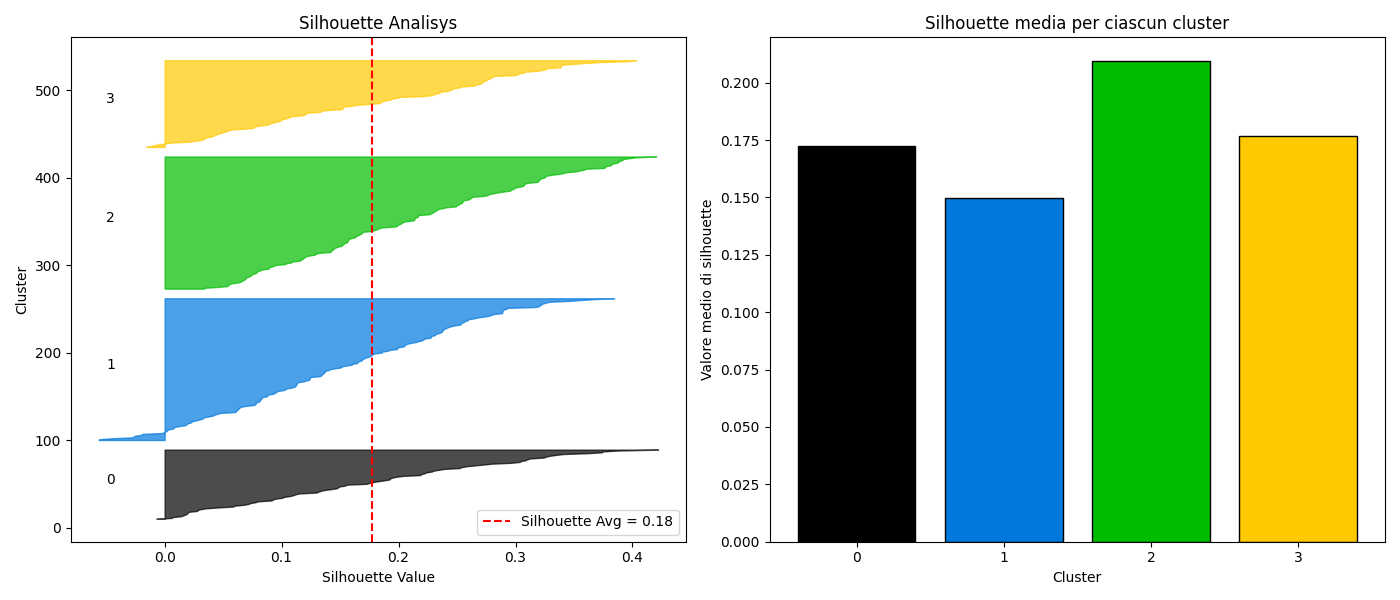

In [78]:
silhouette_analysis(Y_std, km_std.labels_)

In [53]:
silhouette_analysis(Y_mm, km_mm.labels_)

NameError: name 'km_mm' is not defined


 The **internal evaluation** reports low values of the silhouette score in all the clusters. This means that the
population inside the cluster have certain degree of difference. The low global silhouette value means that the clusters are not well separated, as we already noticed in section 3.4, where we could not distinguish the presence of clusters from simply plotting the points in the PCs space.
These scores are also coherent with the score graph represented in exercise 4.2, since the four clusters represented from the 4 centroids were not so easily discernible by eye, without the use of colors and 2D scoreplots. The Global Silhouette is insignificantly higher for the Standardized df.
